# UCR - Escuela de Ingeniería Eléctrica
# Byron Josue Arguedas López - C10606
# Curso de señales y sistemas

Comenzamos el codigo importando las librerias necesarias y configuramos el backend para crear las imagenes de alta resolución con la libreria matplotlib.

In [11]:
# Importación de las librerias necesarias para elaborar el código
import numpy as np
import os
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import butter, lfilter, filtfilt #for filtering data
from statistics import stdev
sys.path.insert(1, r'./../functions') # add to pythonpath

# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

Se define la función ecg que recibe un archivo, en este caso un archivo .wav correspondiente a registros del latido del corazón. La función se encarga de devolver 2 parámetros, timeECG y waveData que luego se utilizaran con la librería matplotlib para generar las gráficas de cada archivo contenido en archivos.

In [12]:
def ecg(variable):
    record = wave.open(variable, 'r') # load the data

    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() #number of channels
    numFrames = record.getnframes() #number of frames
    sampleRate = record.getframerate() #sampling rate
    sampleWidth = record.getsampwidth()
    
    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Get time window
    timeECG = (np.linspace(0, len(waveData)/sampleRate, num=len(waveData)))

    return timeECG, waveData

luego de importar la libreria os podemos agregar a la variable ruta la dirección concreta donde se ubican nuestros archivos .wav mediante el uso del comando (os.chdir(ruta)). Al mismo tiempo definimos una lista archivos[] donde incluimos el nombre de nuestros archivos .wav.

In [13]:
ruta = "/home/byron/Documents/Señales y sistemas/Proyecto_etapa_1_señales/"
os.chdir(ruta)
archivos = ["1.wav","2.wav","3.wav","4.wav","5.wav","6.wav","7.wav","8.wav","9.wav","10.wav","11.wav","12.wav","13.wav","14.wav","15.wav"]

Utilizamos la libreria matplotlib para generar las gráficas de nuestros archivos, importante, para pasarle a la función ecg() la dirección concreta de nuestros archivos sumamos la variable ruta en donde anteriormente guardamos la dirección de los archivos y la pocisión[i] donde se encontrara por cada recorrido del ciclo todos los nombres de nuestros archivos.

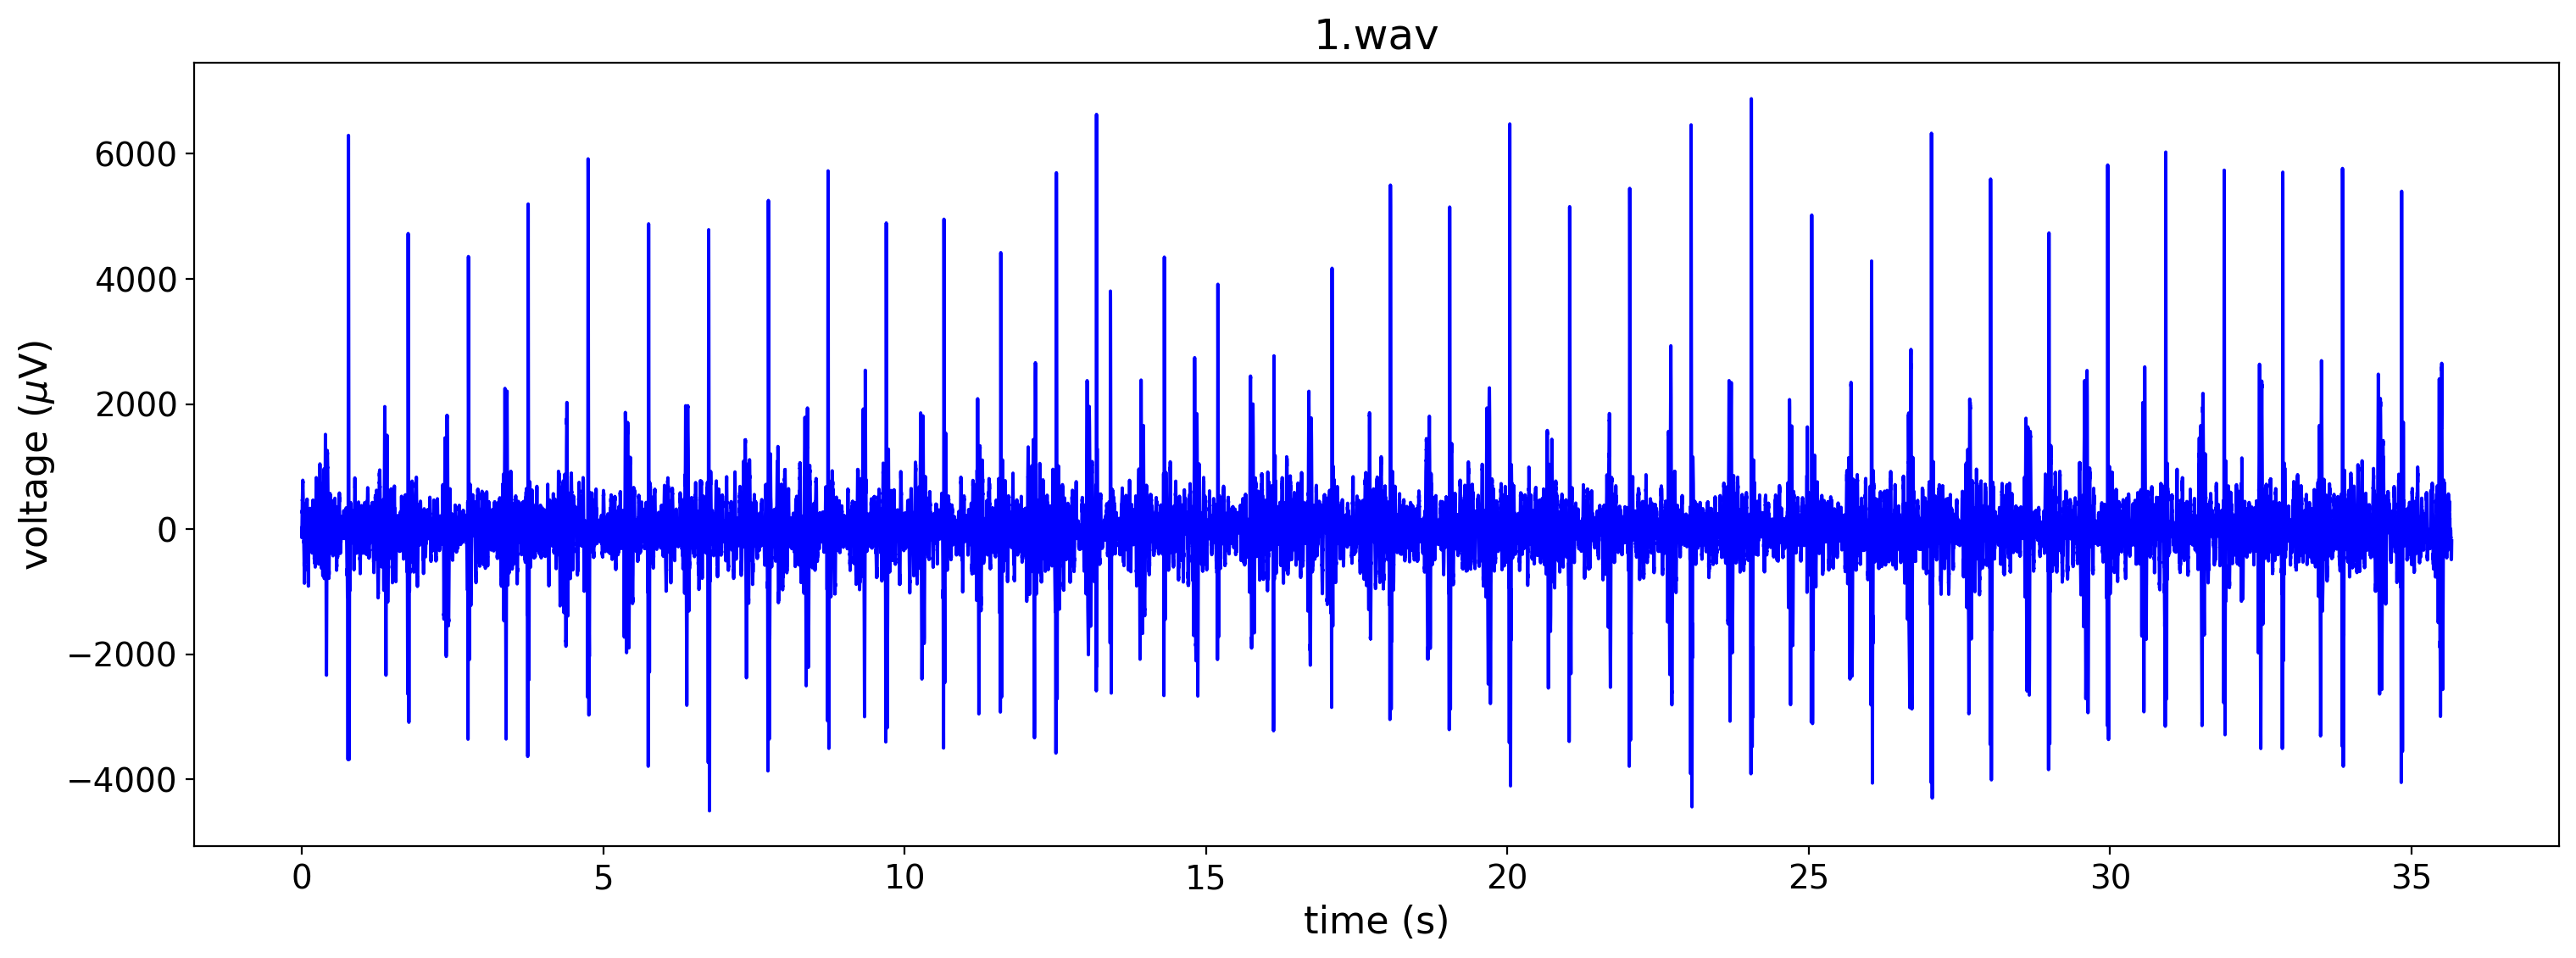

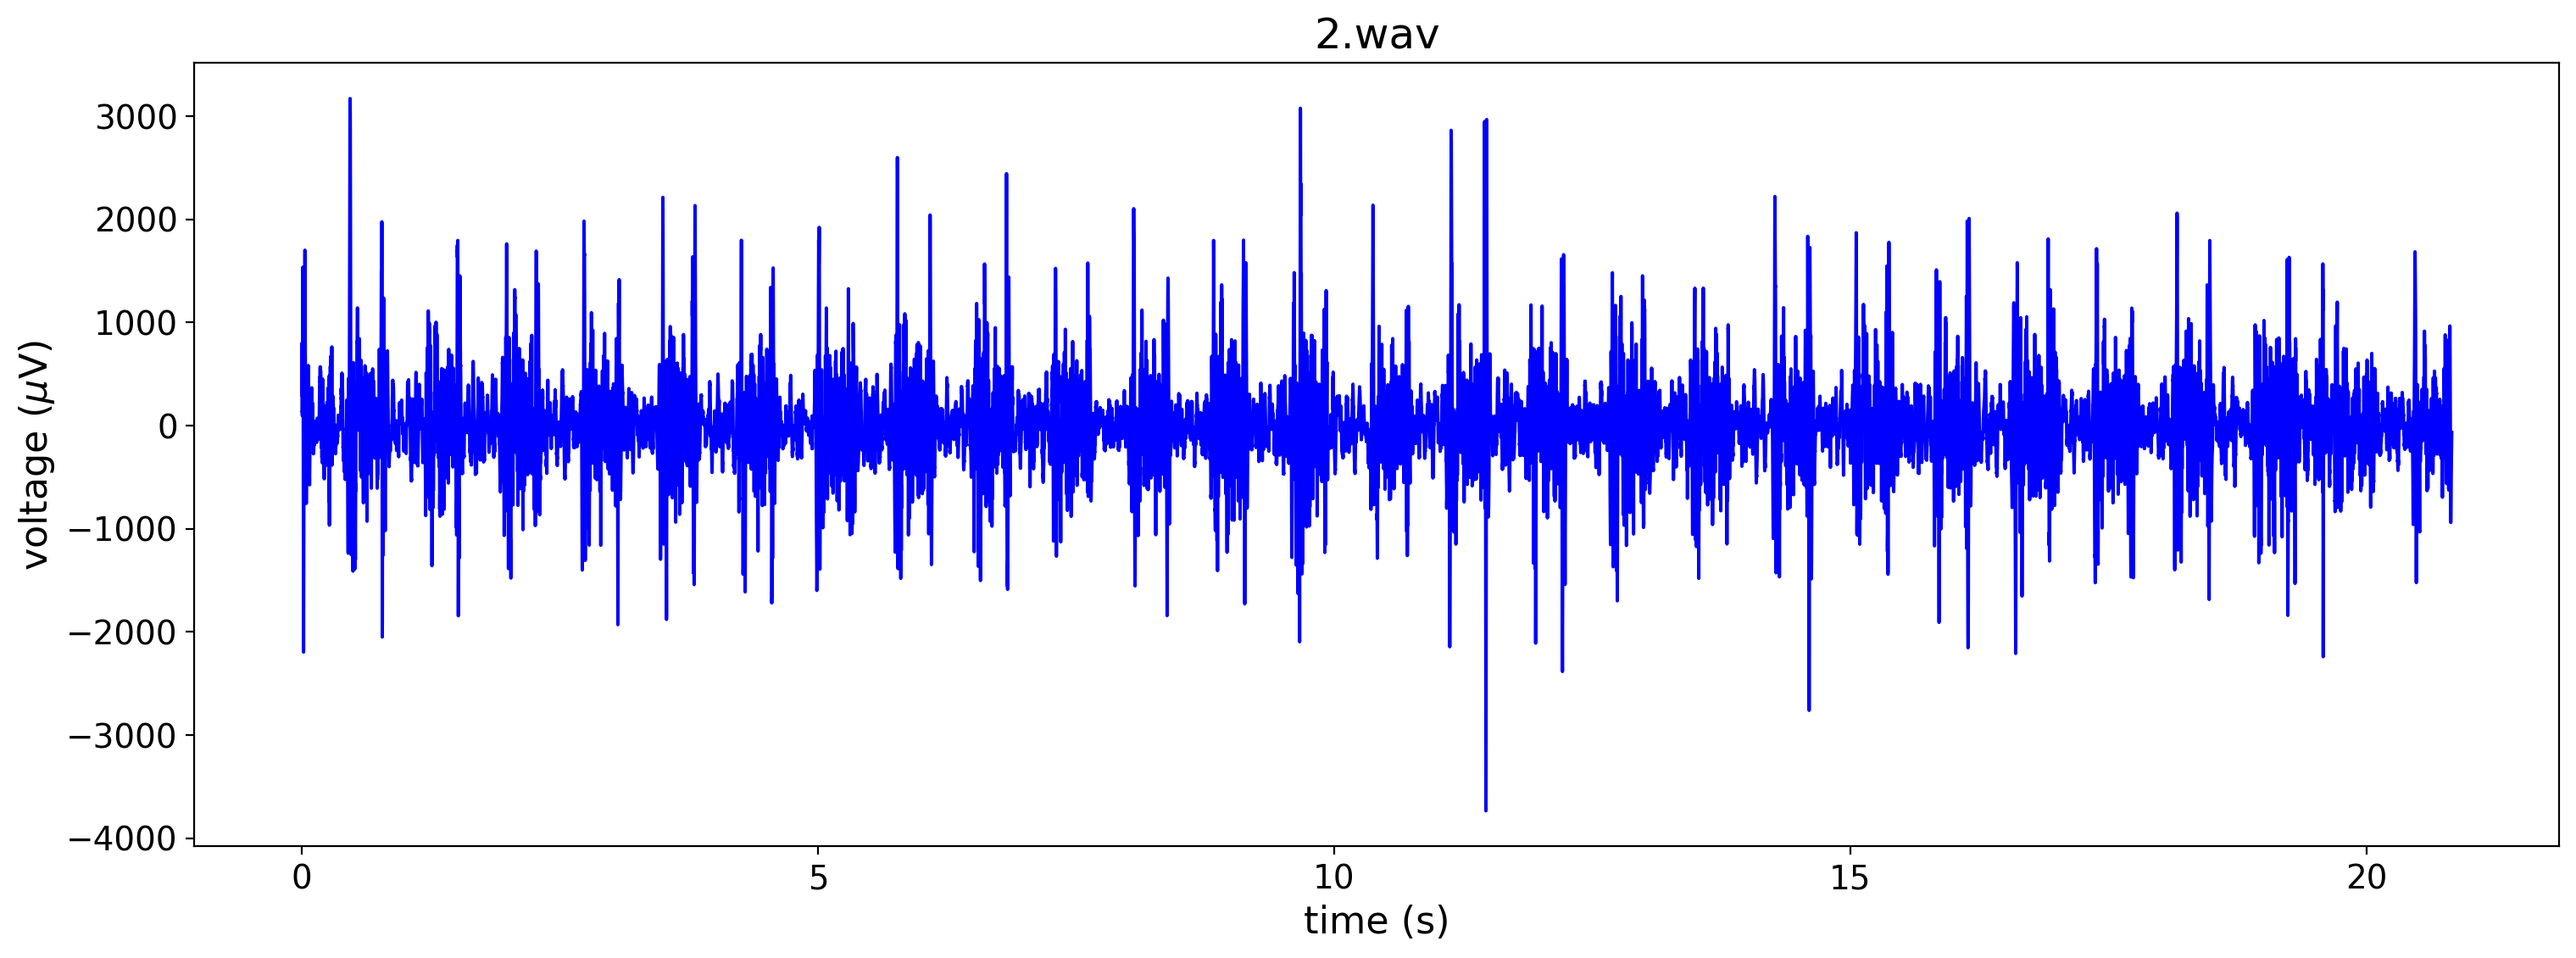

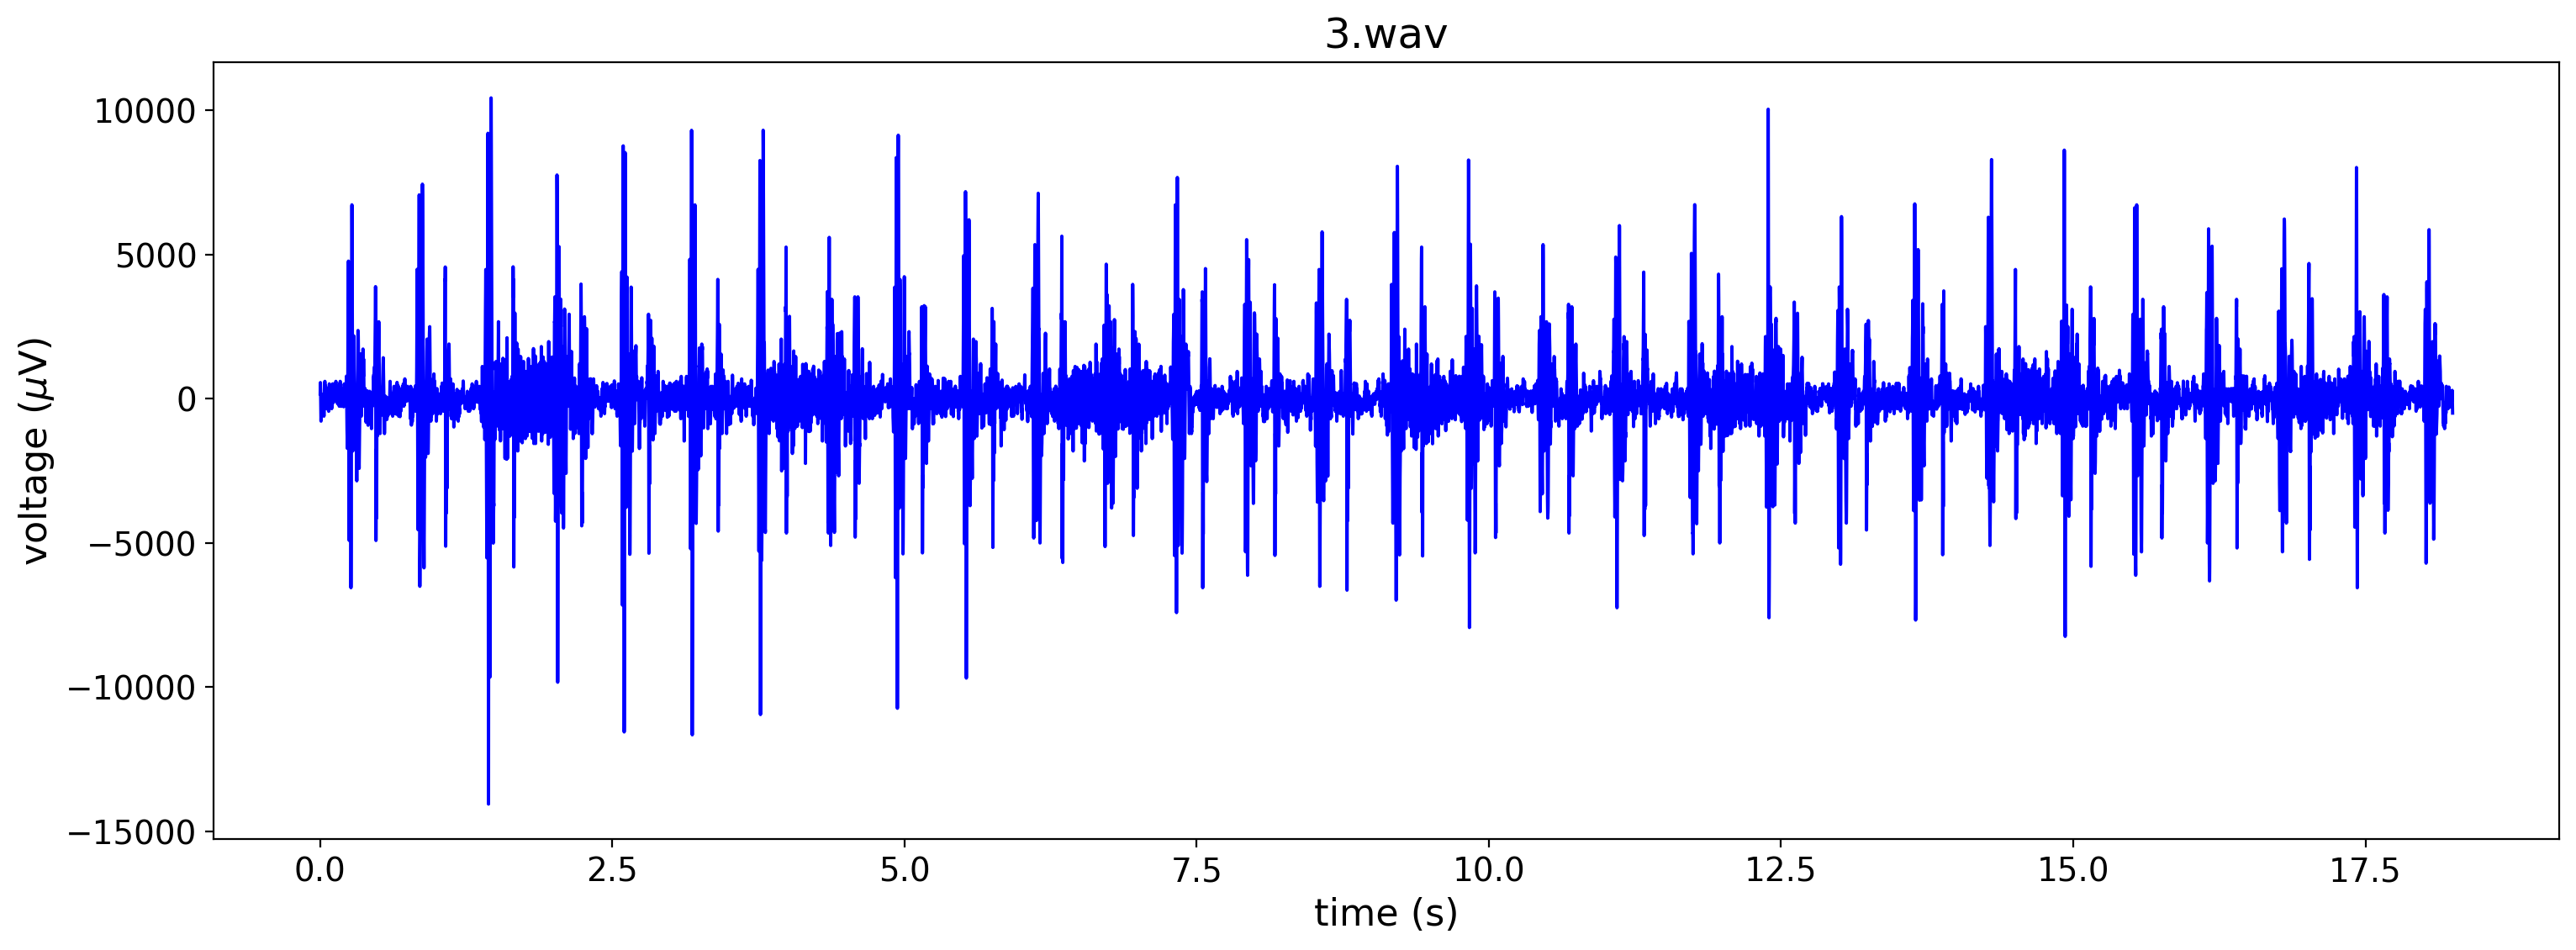

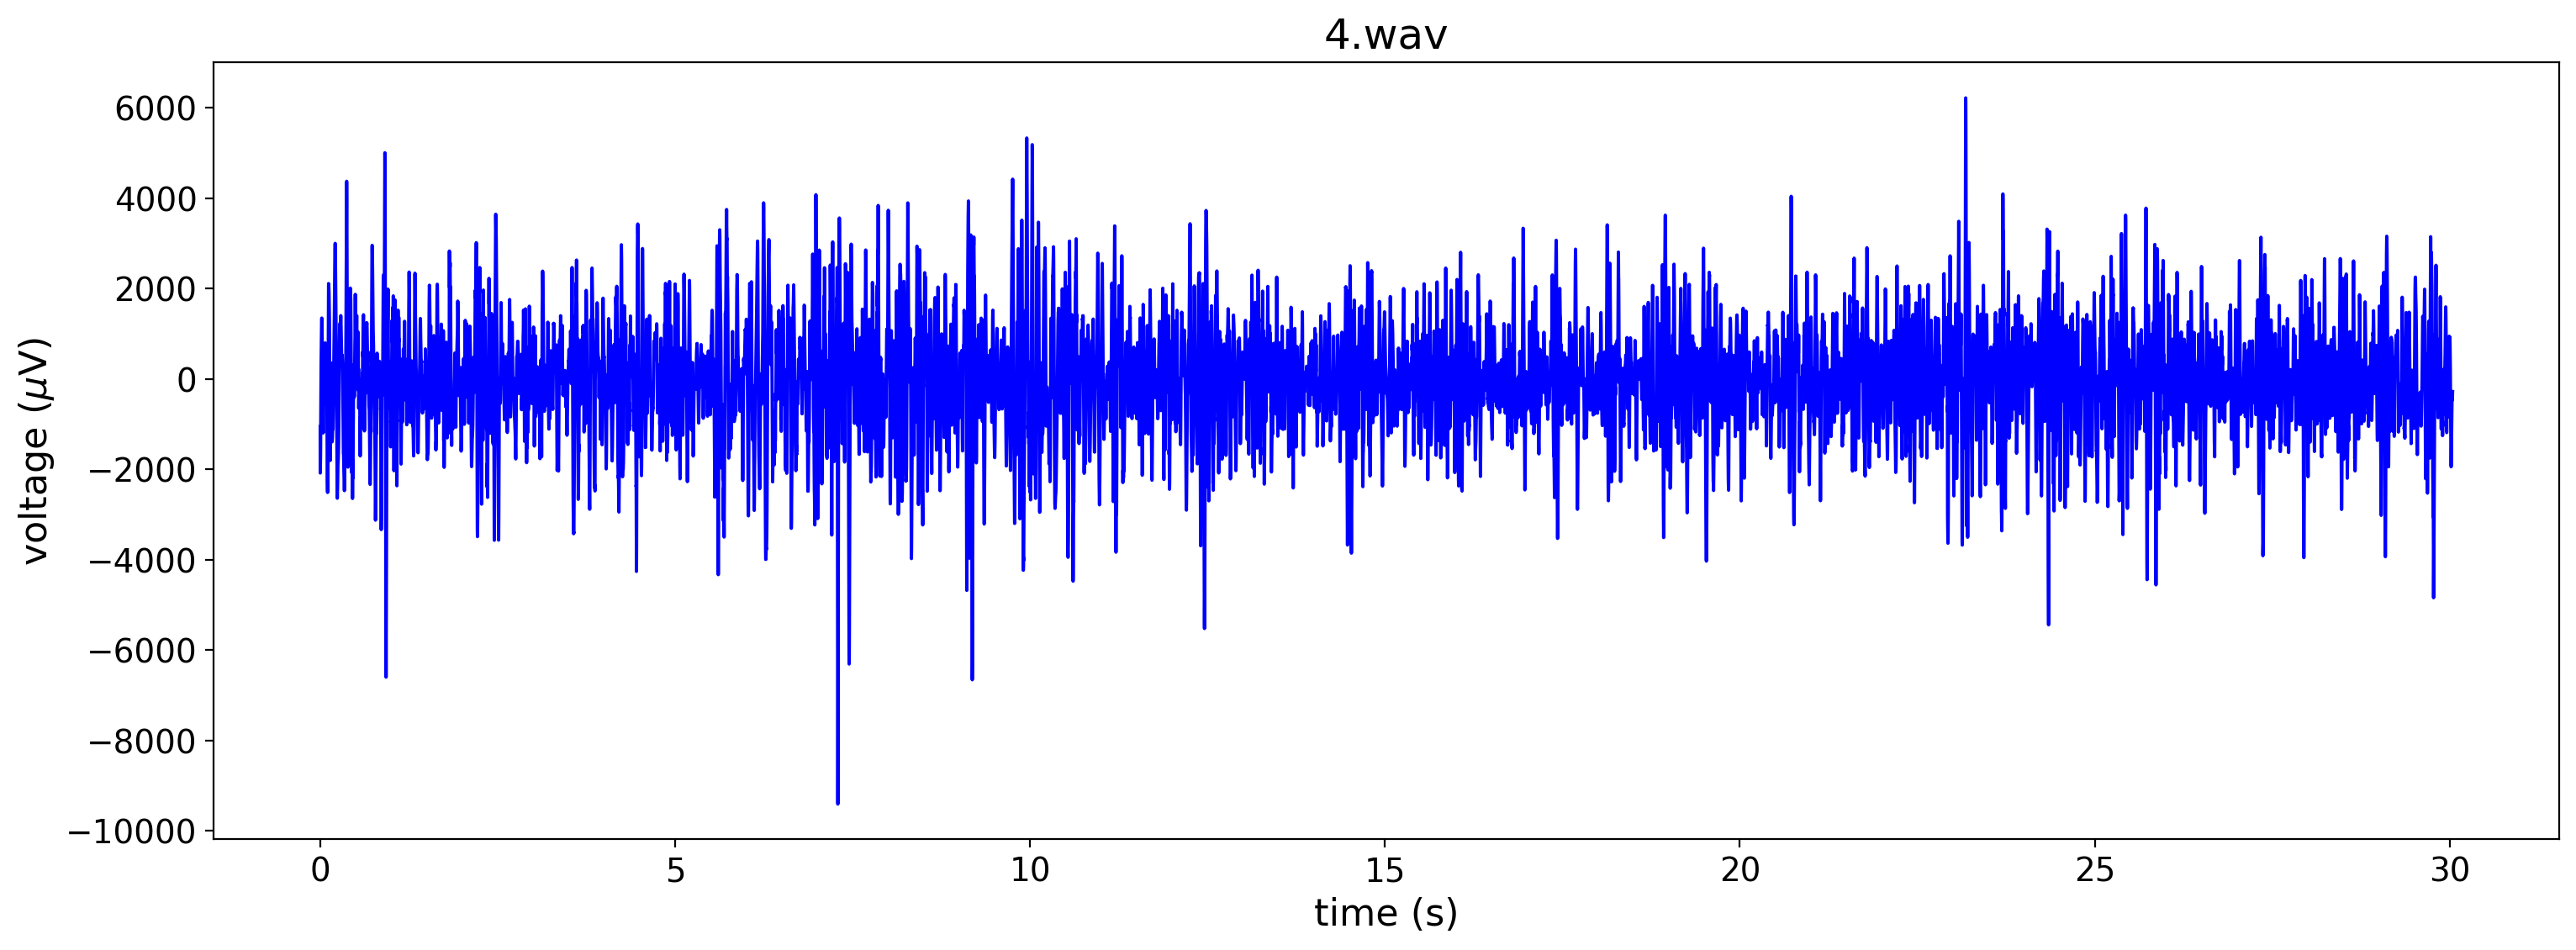

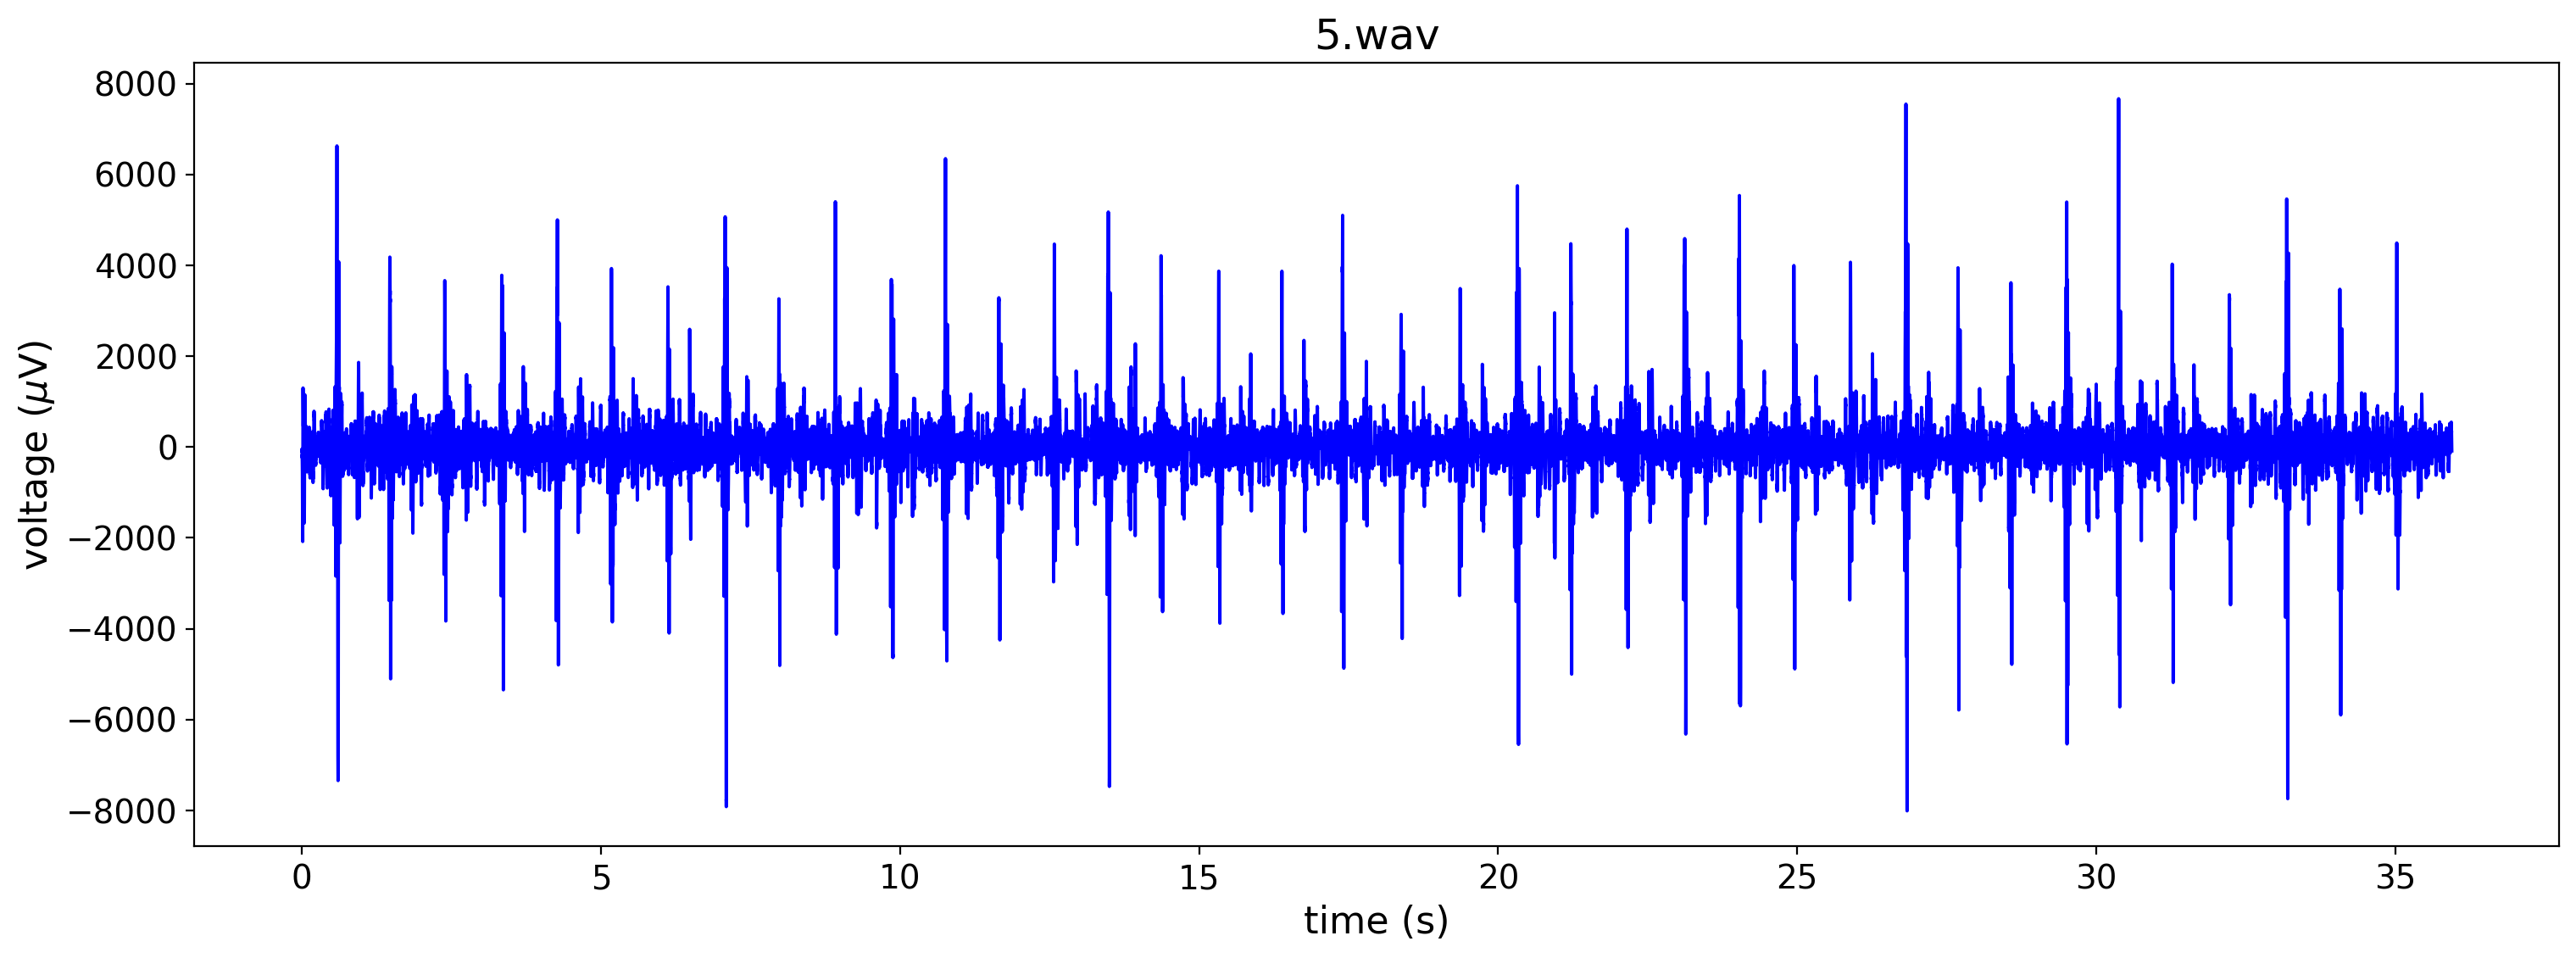

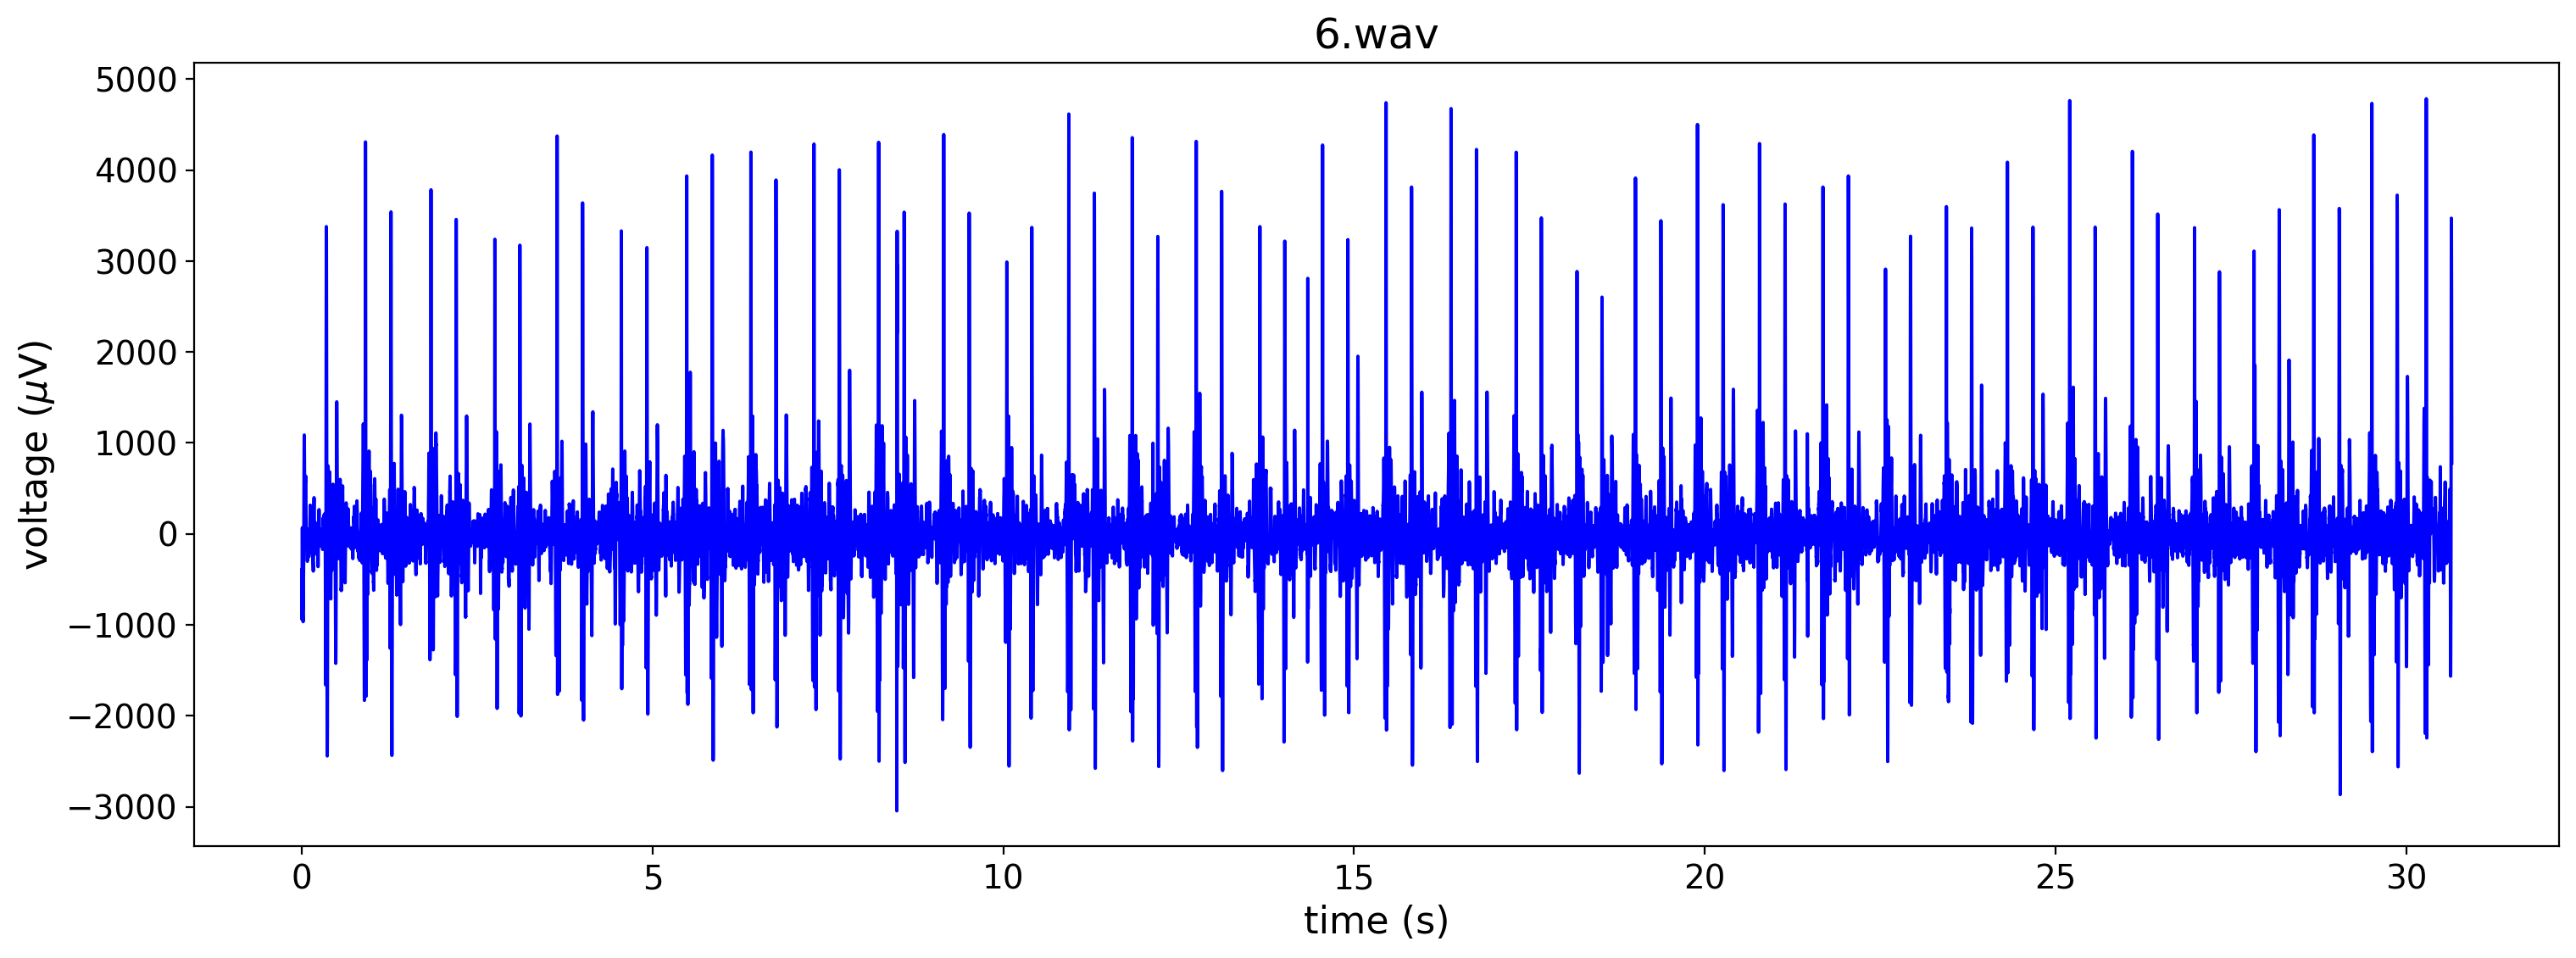

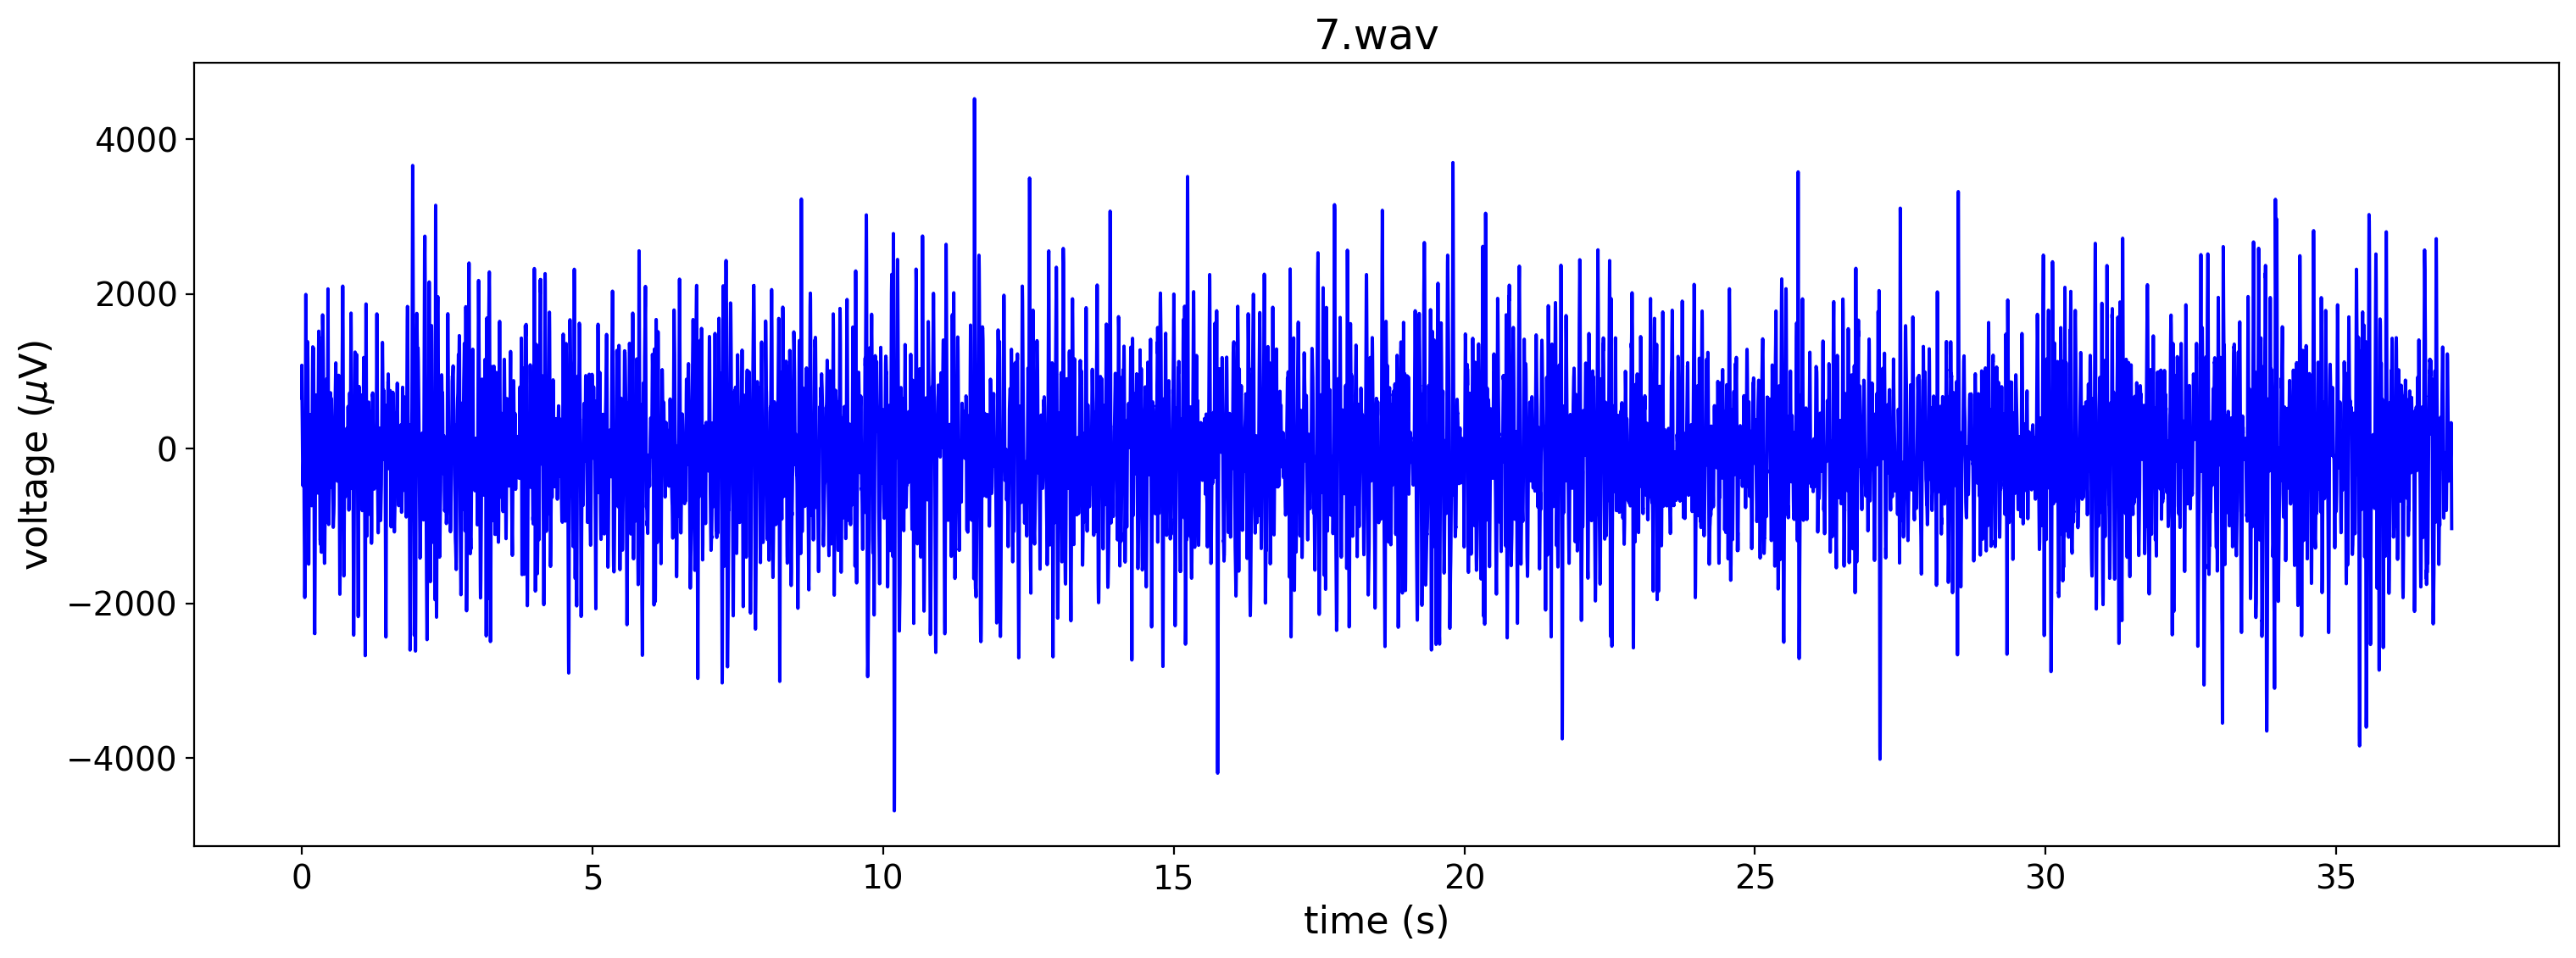

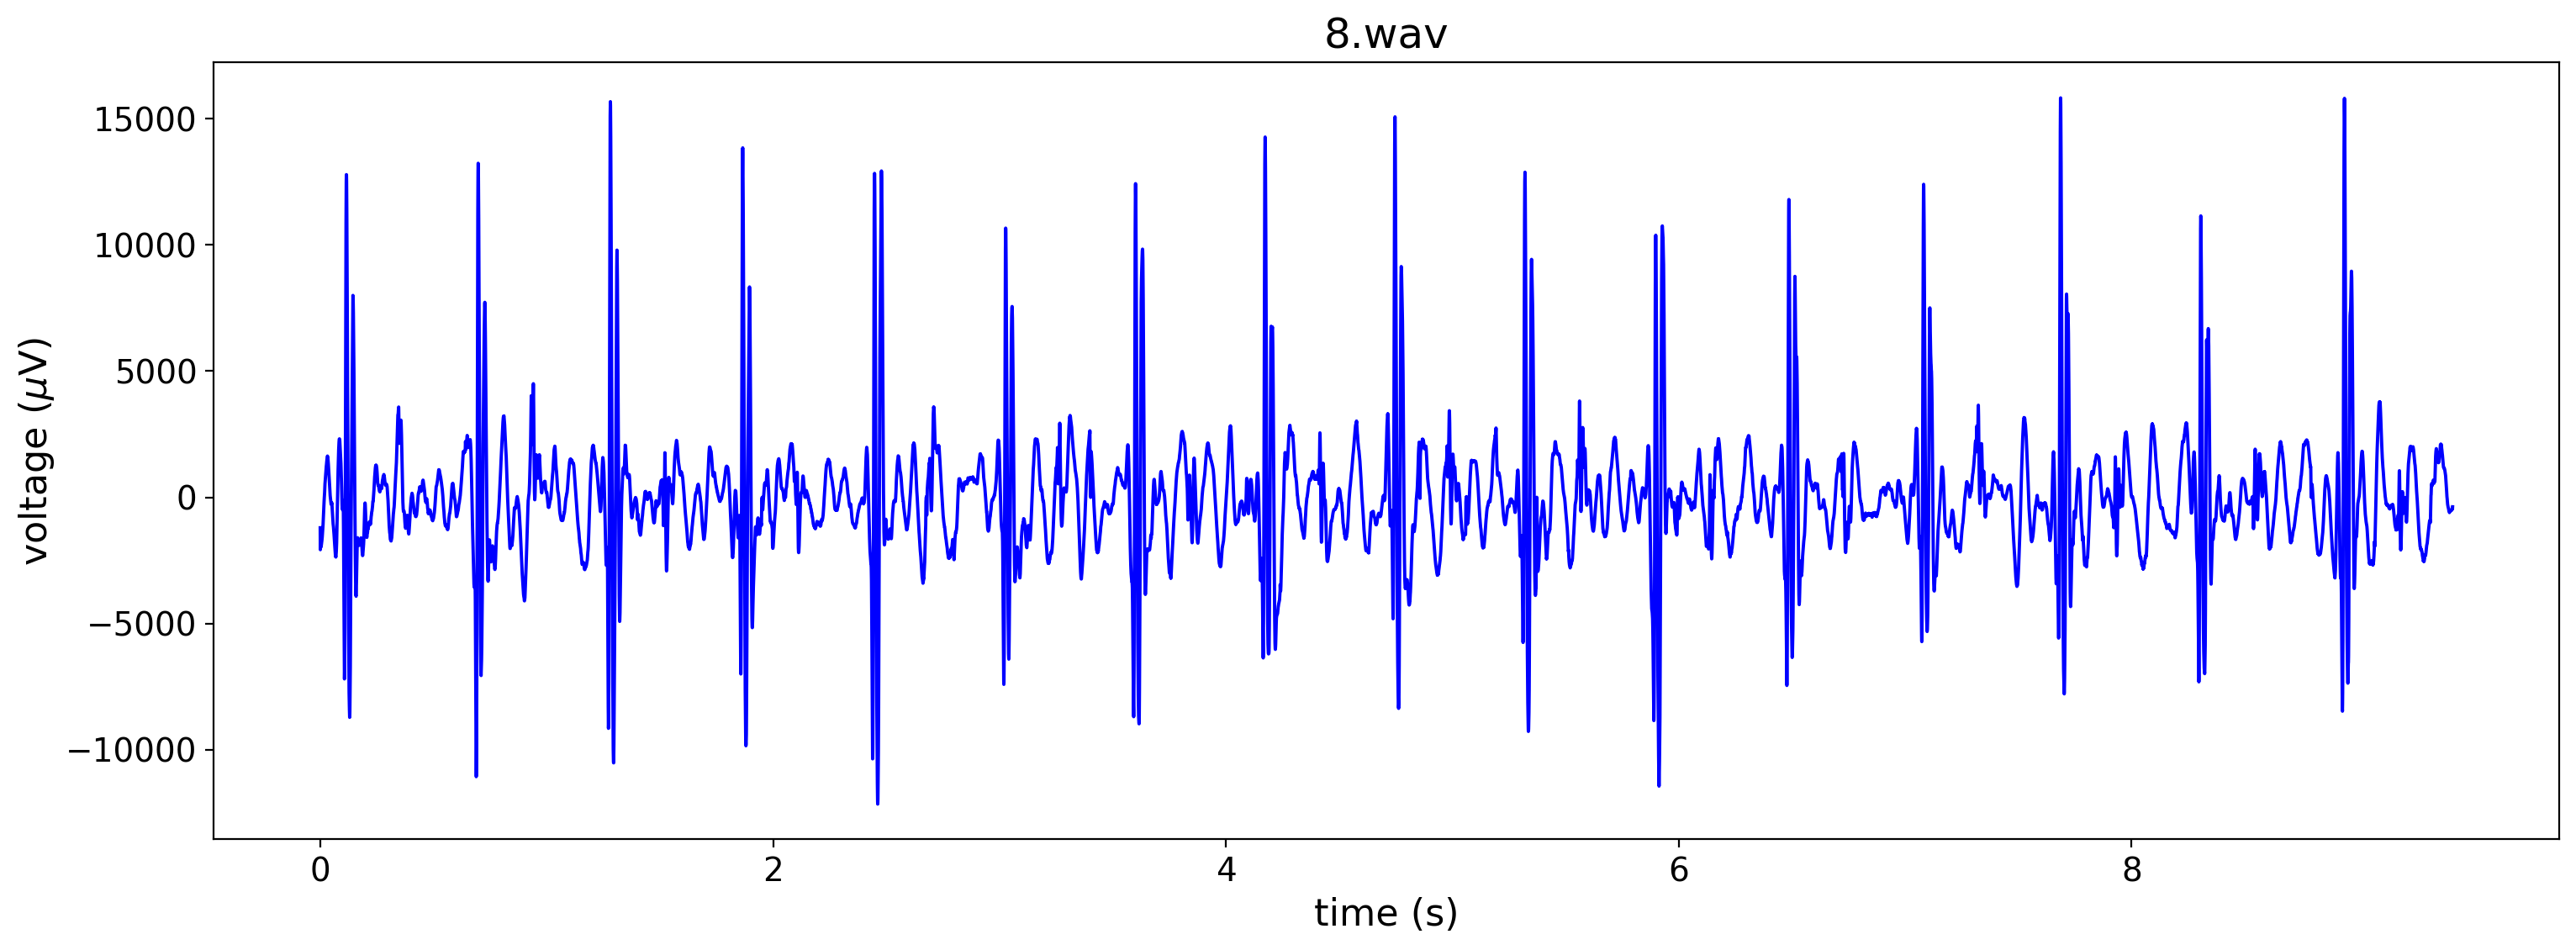

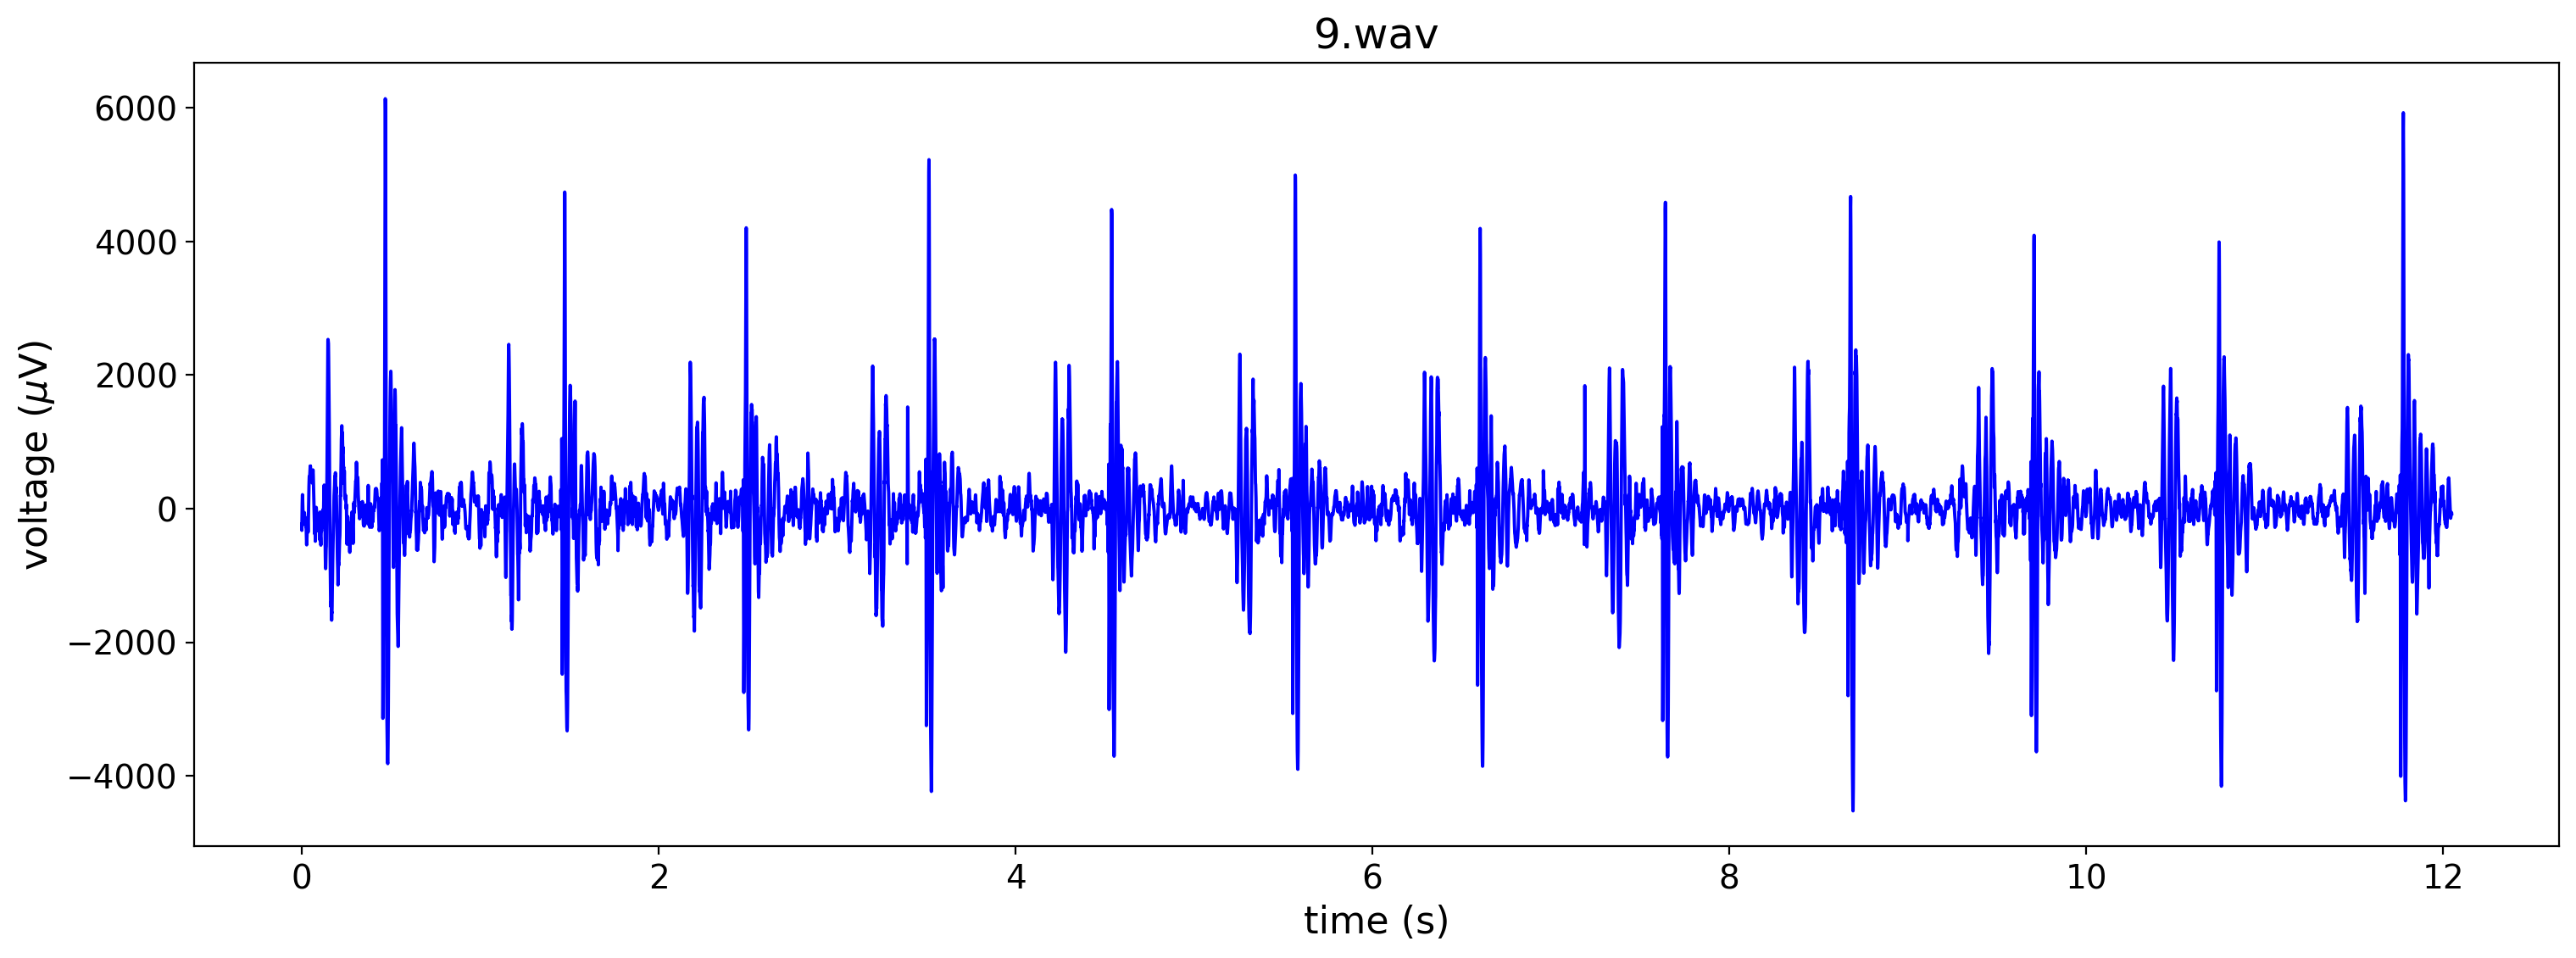

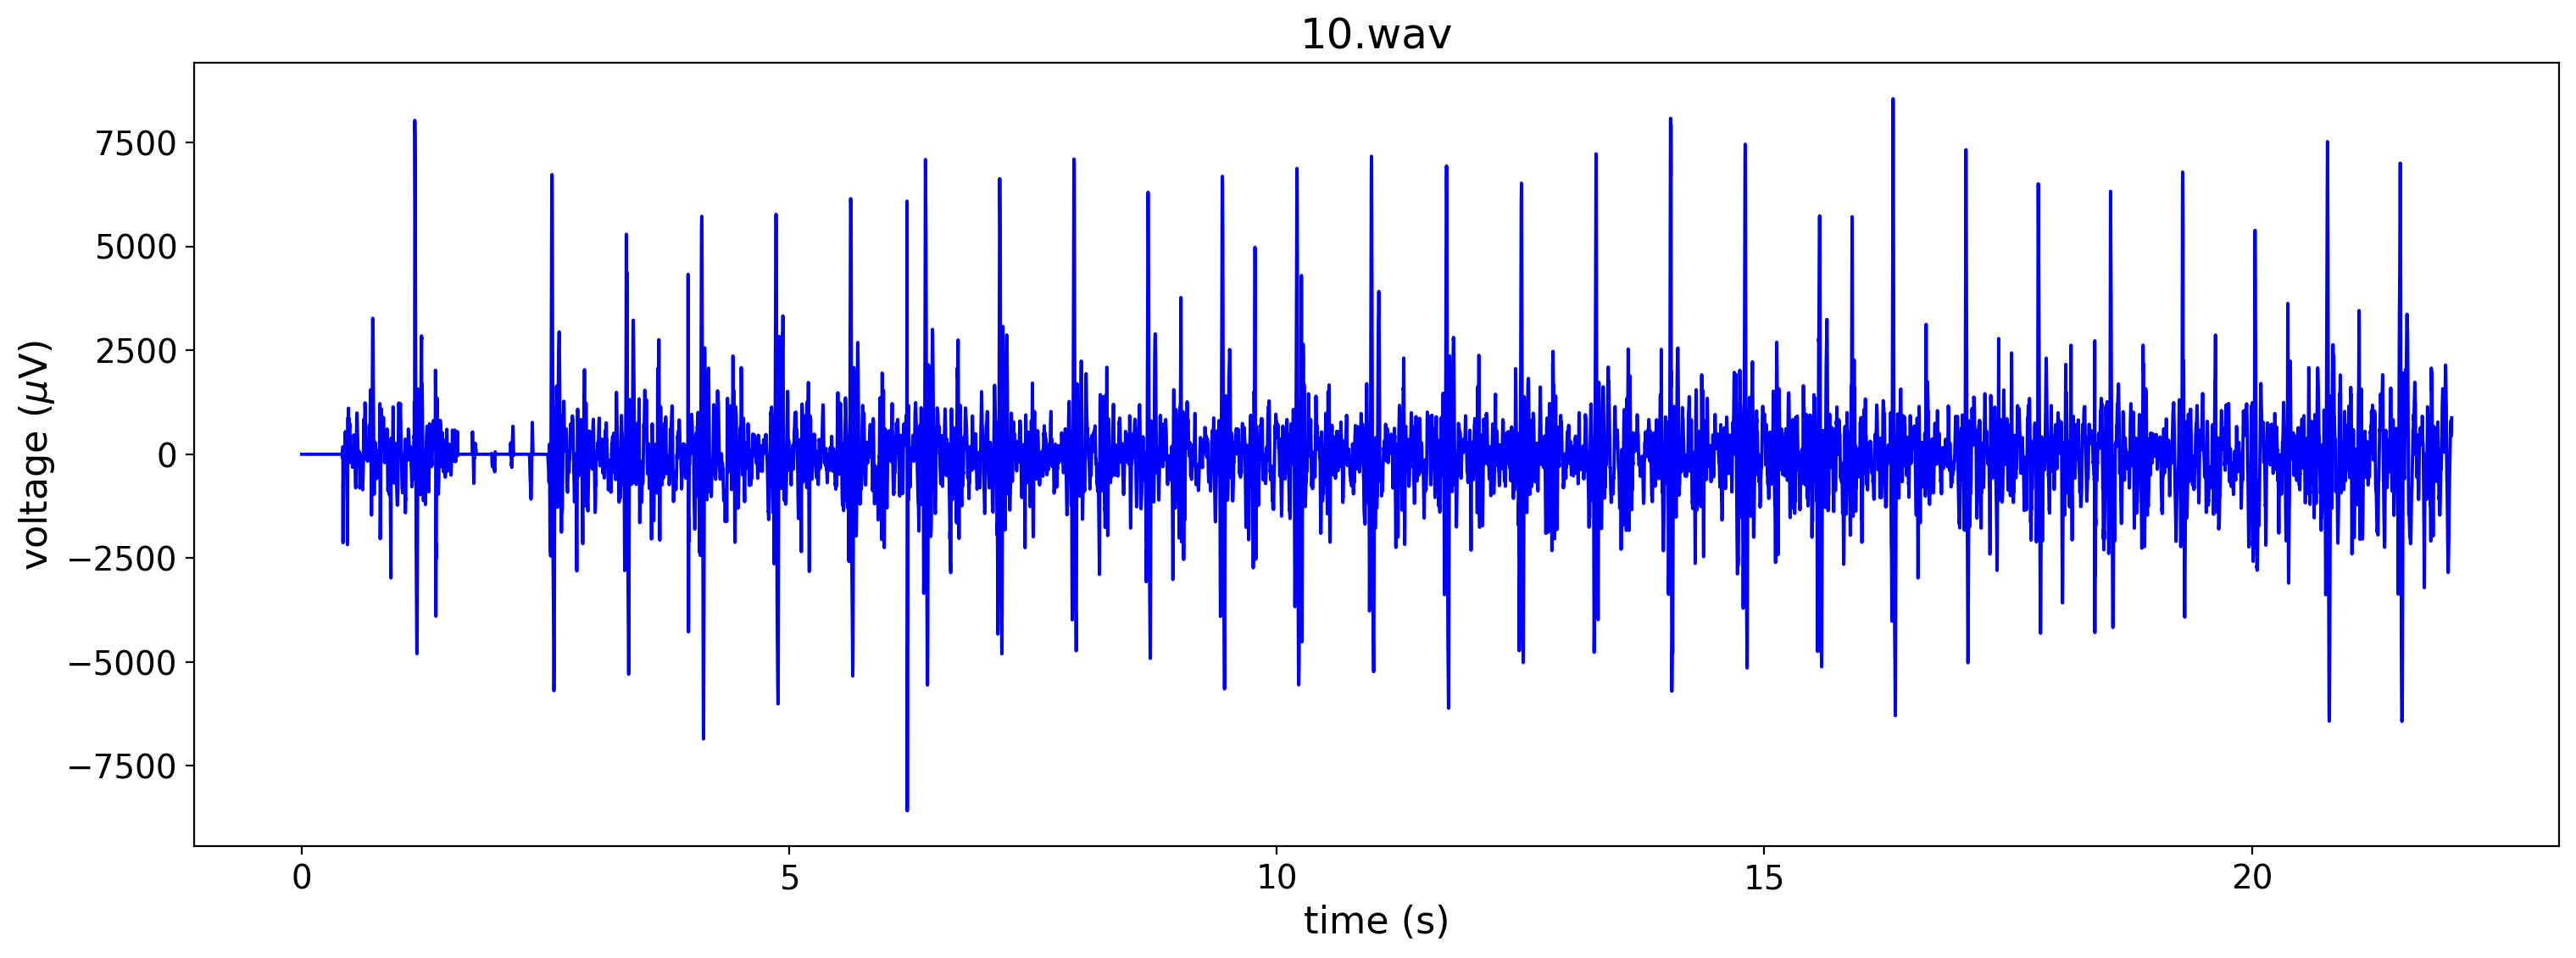

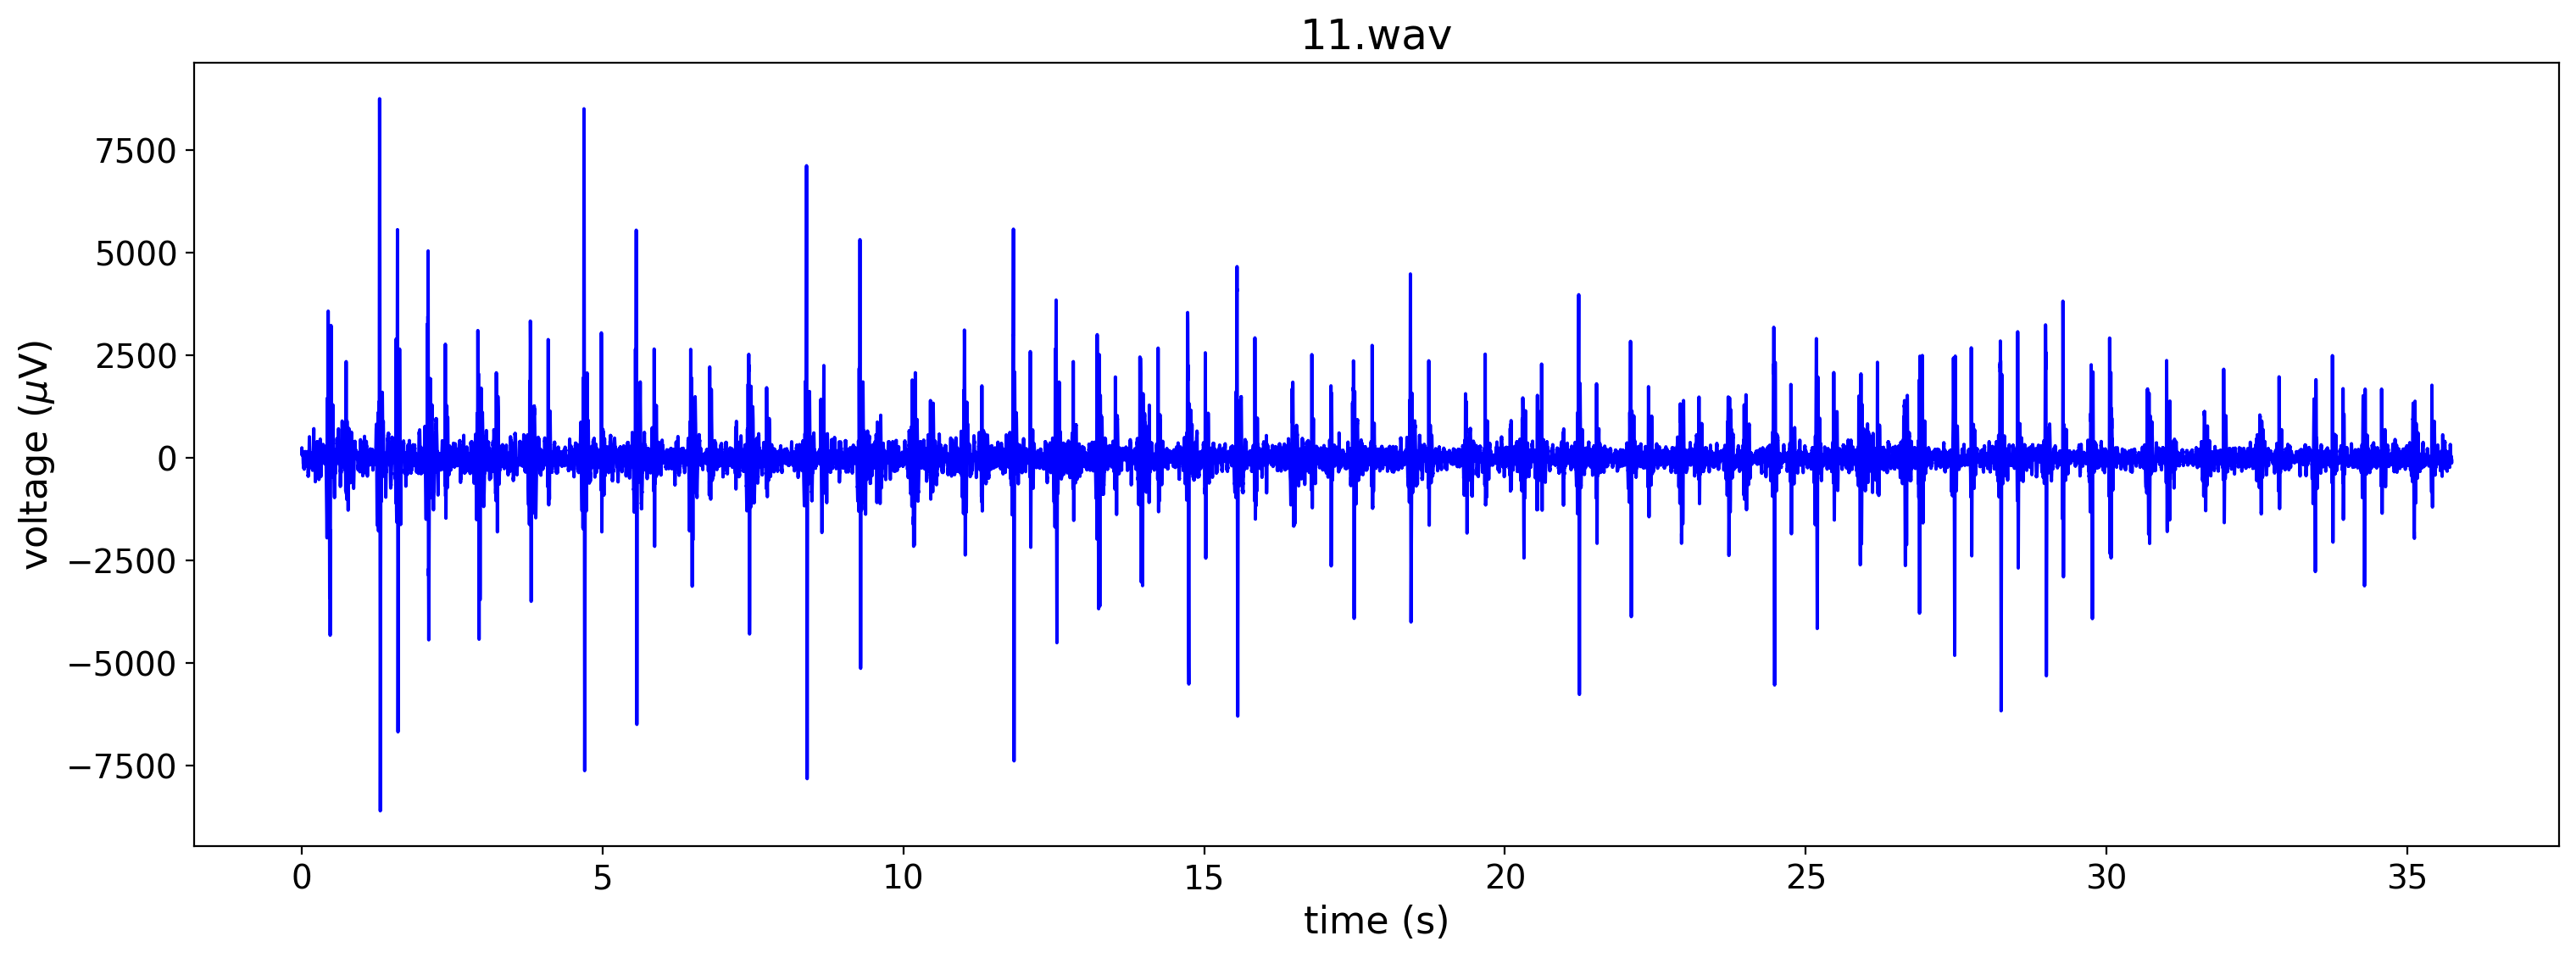

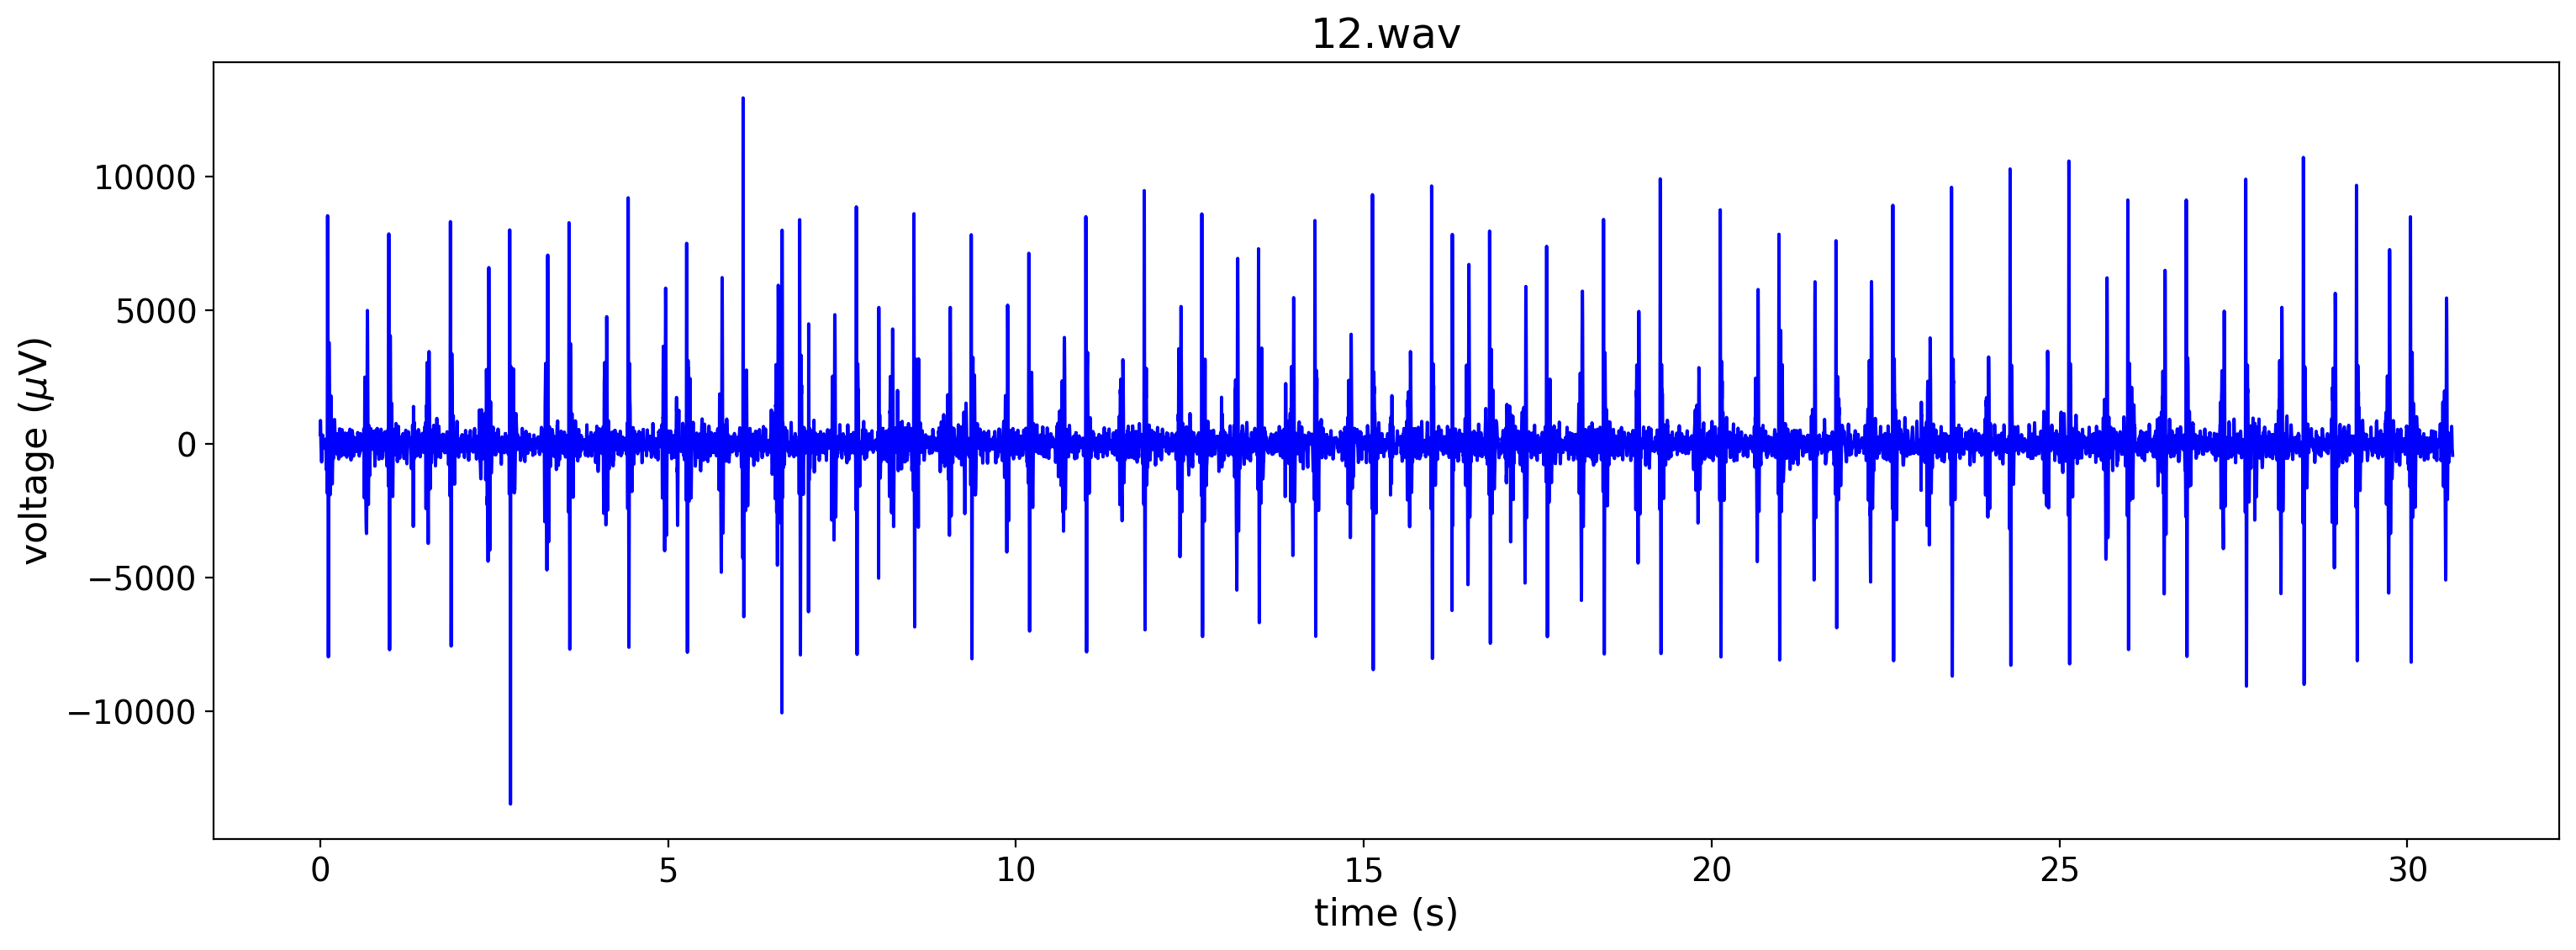

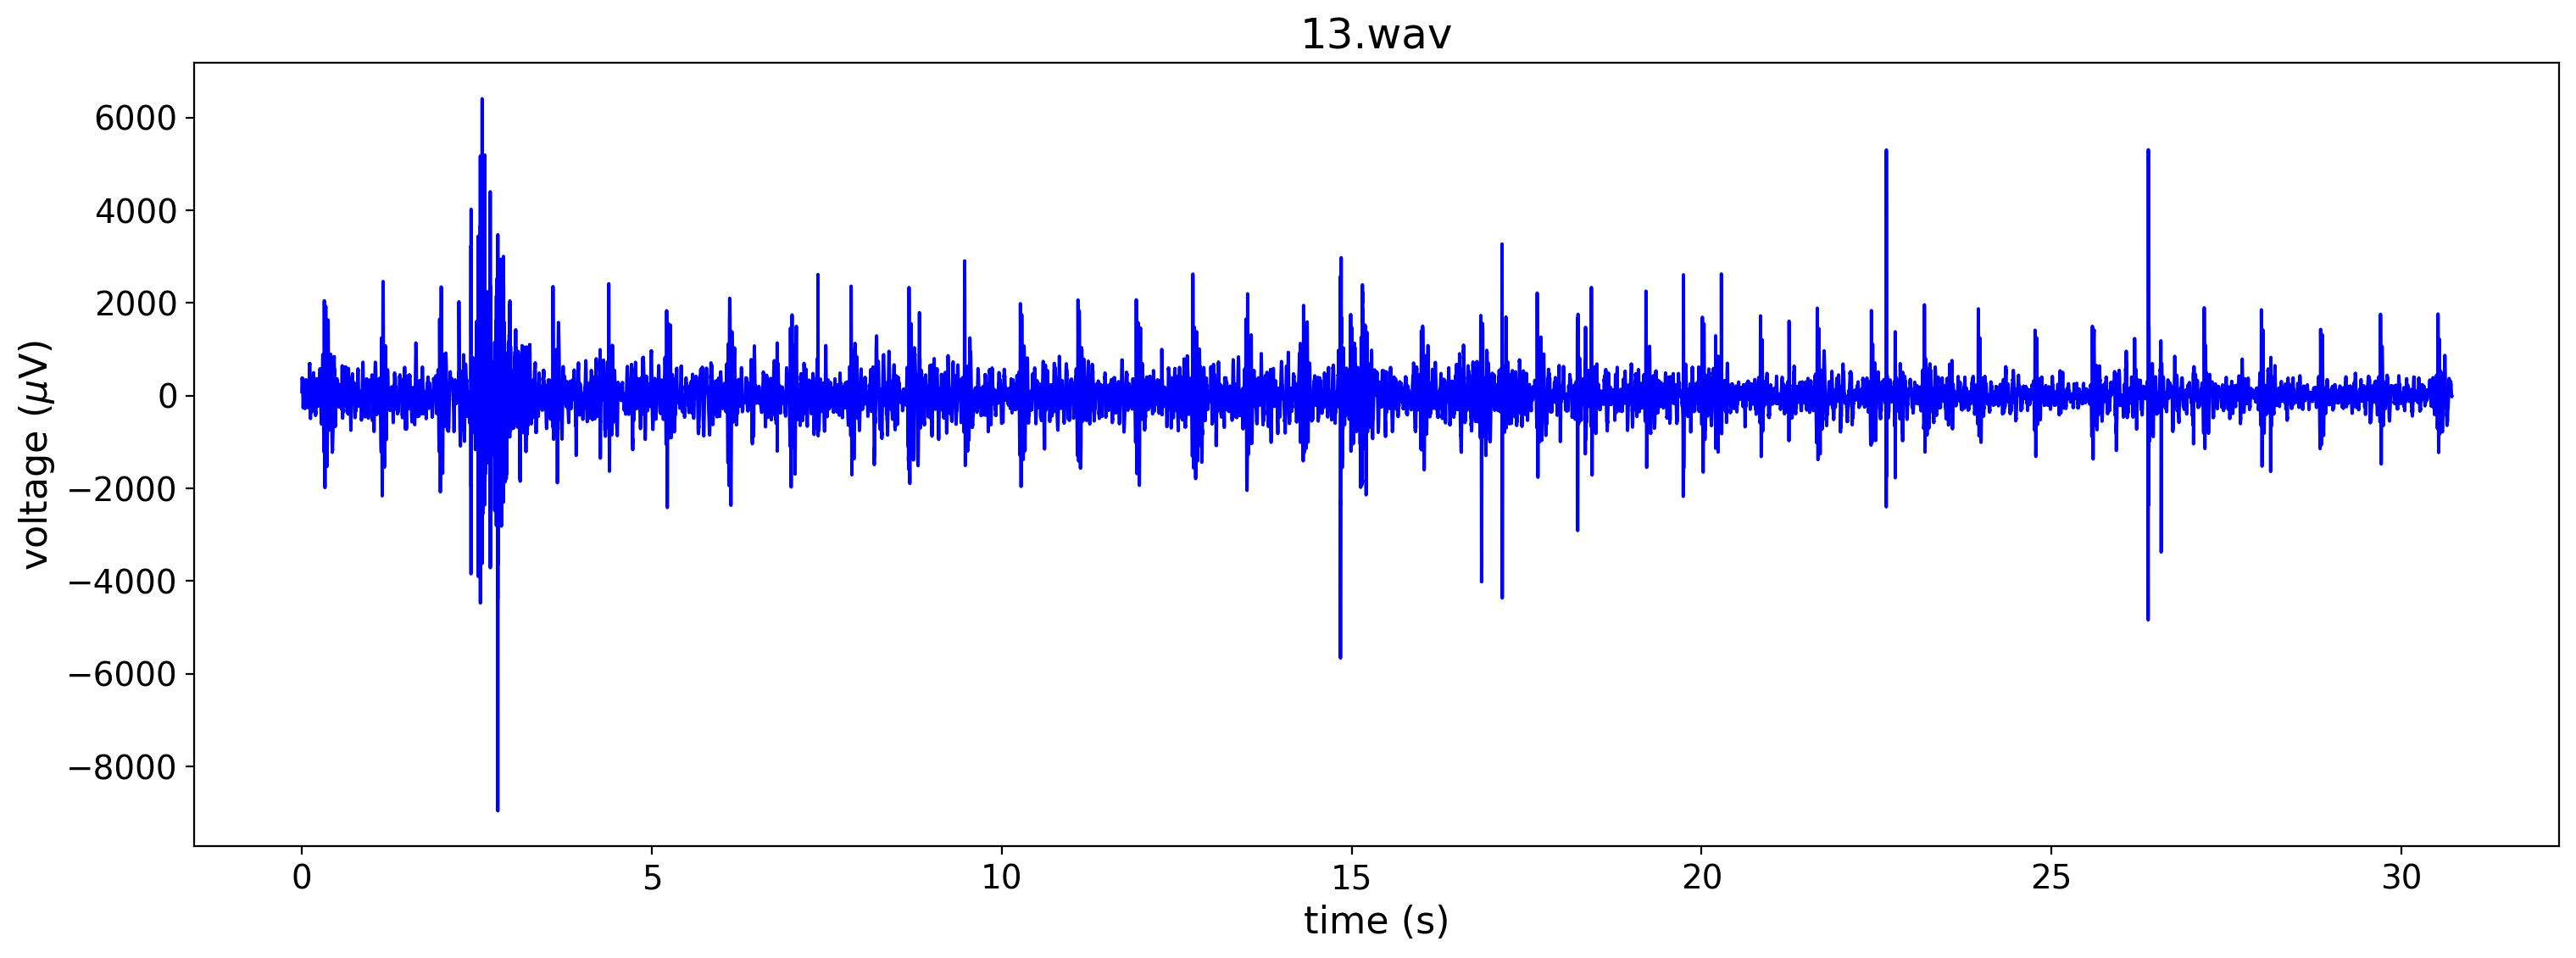

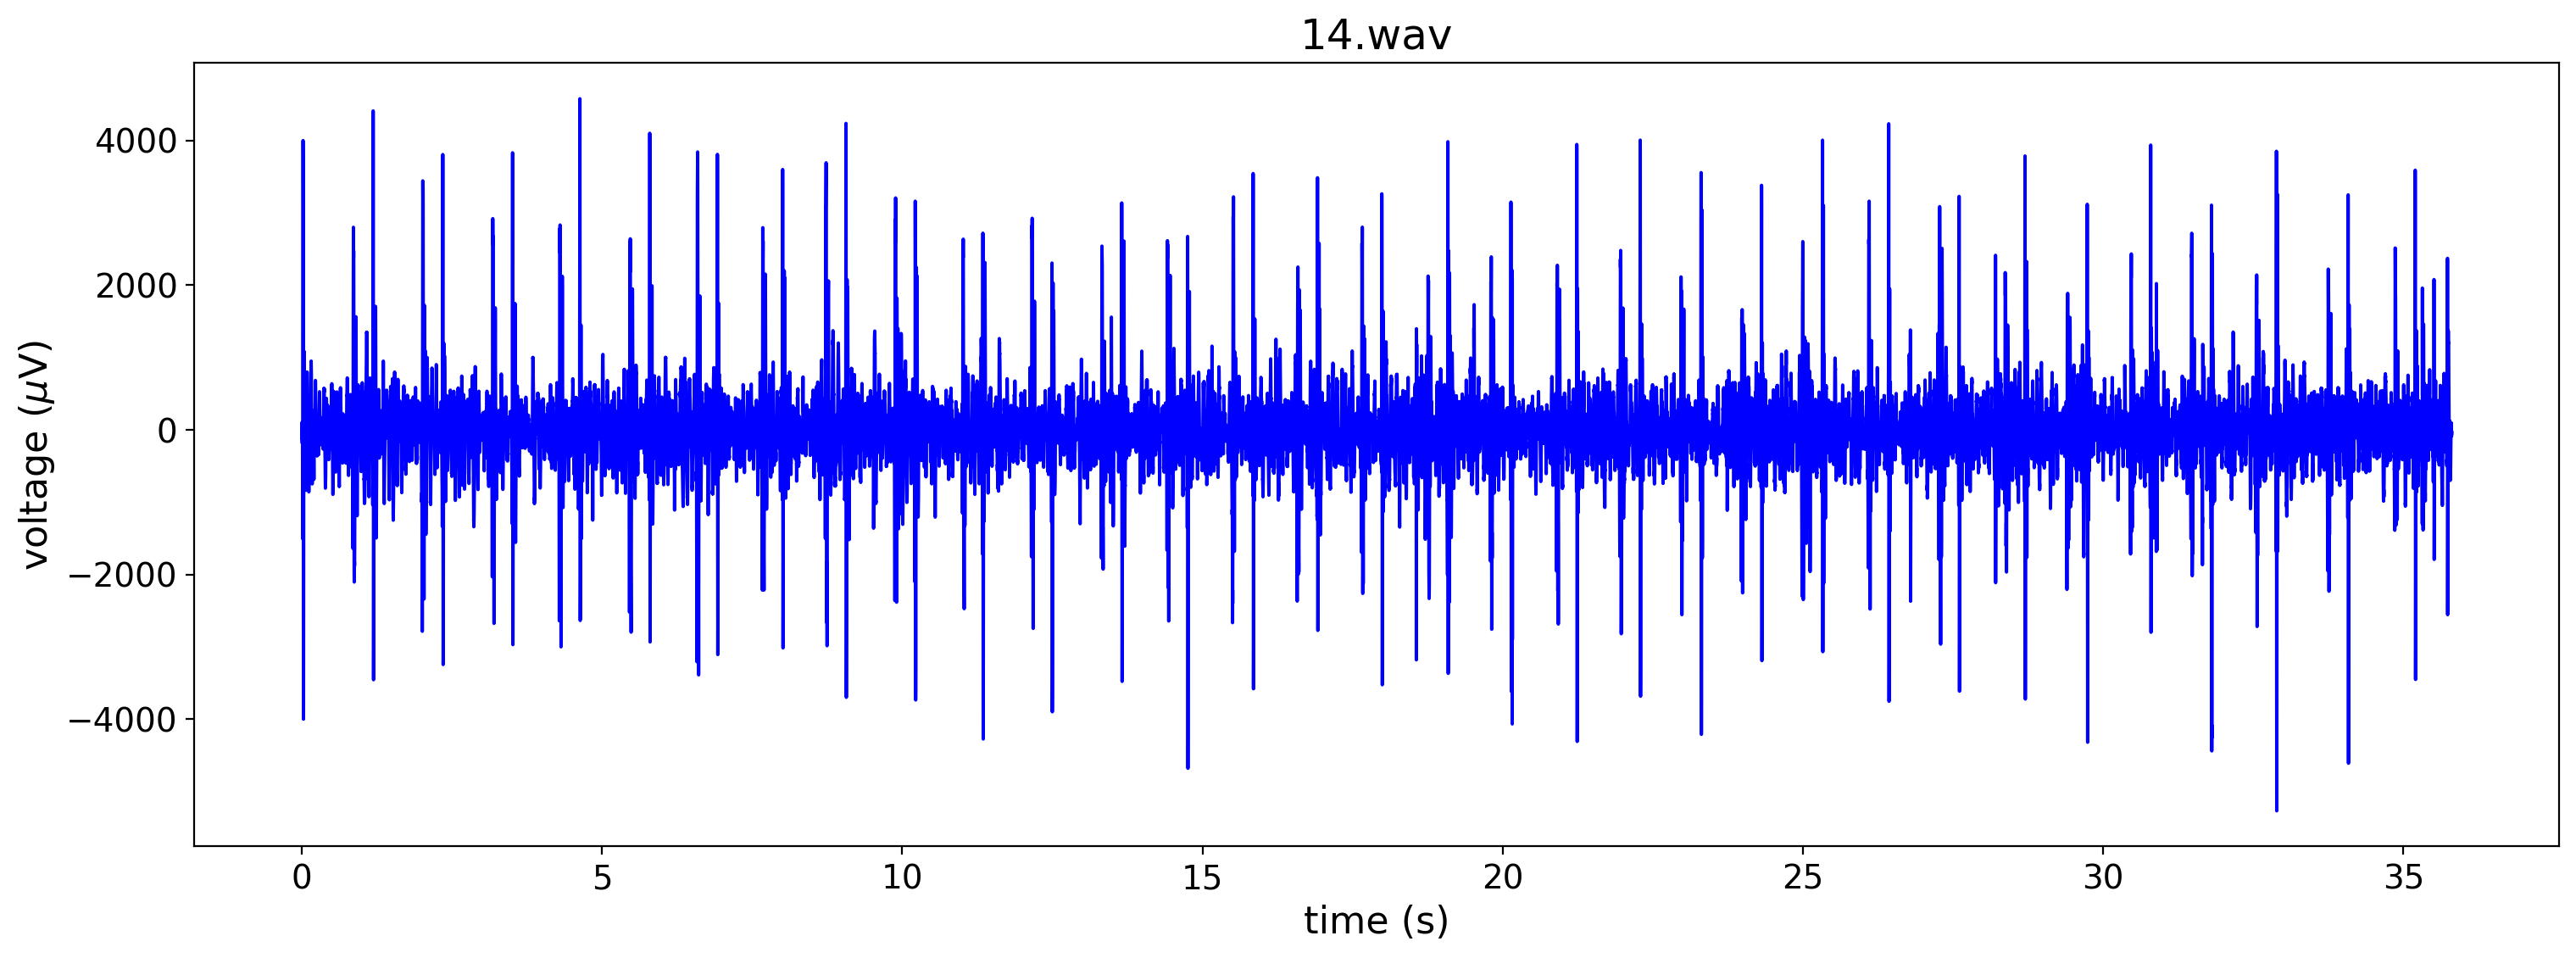

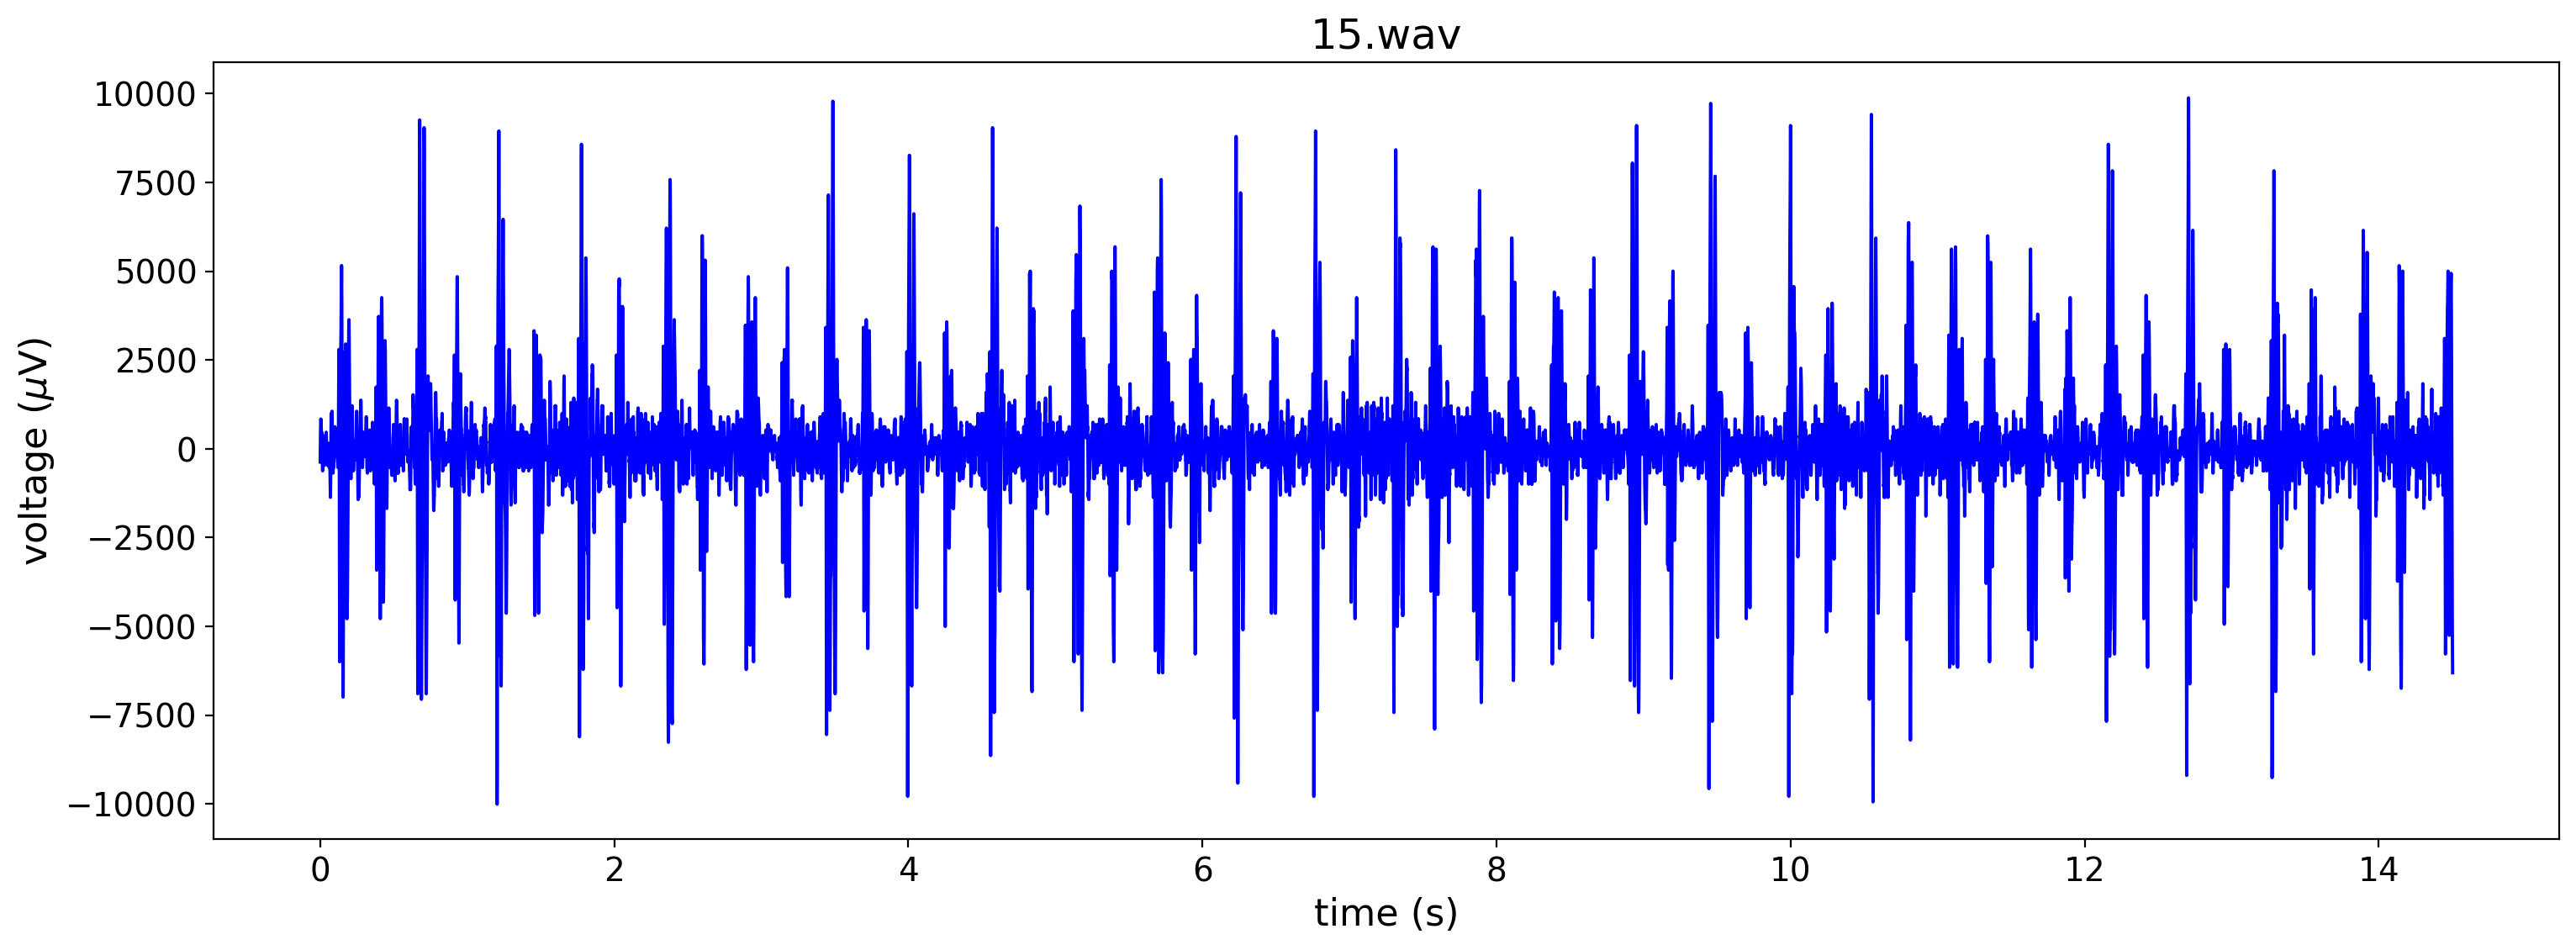

In [14]:
for i in range(0, len(archivos)):
    timeECG, waveData = ecg(ruta + archivos[i])
    # Plotting EMG signal
    plt.figure(figsize=(18,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.title(archivos[i])
    plt.show()

En cuanto a los resultados de las gráficas anteriores, estas son sumamente variadas, en algunas se logra visulizar de manera clara las pulsaciones del corazón en otras parece existir bastante distorsión lo que dificulta bastante la visualización.
En cuanto a la similitud con la materia vista en el curso no hay mucho que decir fuera de que nos encontramos ante señales continuas causales.

En la siguiente parte obtenemos primeramente los datos del archivo 9.wav en este caso para luego realizarle un recorte en el eje x, y lograr de esta manera un acercamiento de la señal donde dejamos visibles tres pulsos del archivo.

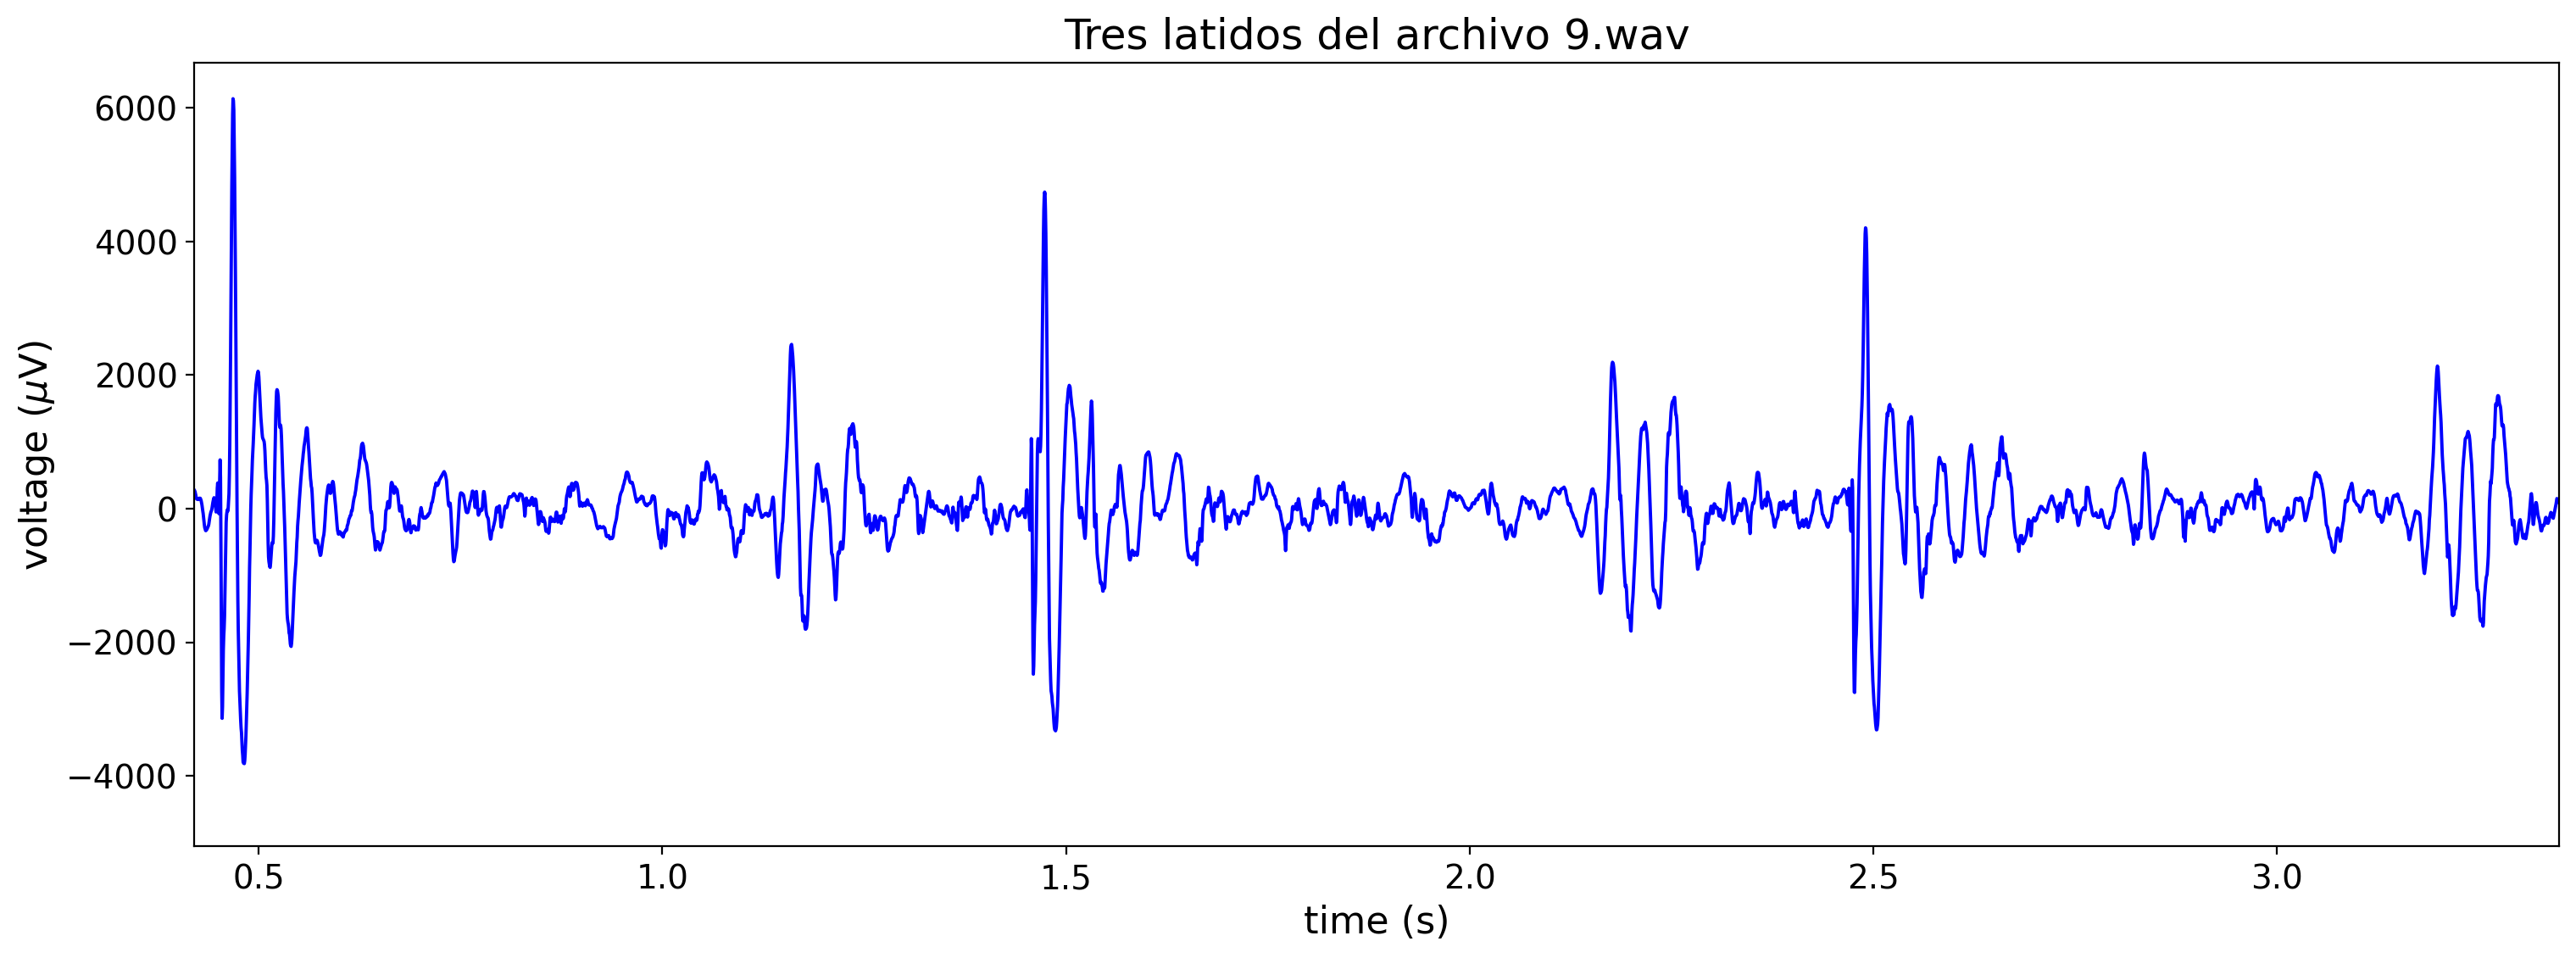

In [15]:
# Acercamiento del archivo 9.wav
timeECG, waveData = ecg(ruta + "9.wav")
# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(.42,3.35)
plt.title("Tres latidos del archivo 9.wav")
plt.show()


En la siguiente parte volvemos a obtener primeramente los datos del archivo 9.wav en este caso, para luego realizarle un recorte en el eje x, y lograr de esta manera un acercamiento de la señal para dejar de manera visible un solo pulso del archivo.

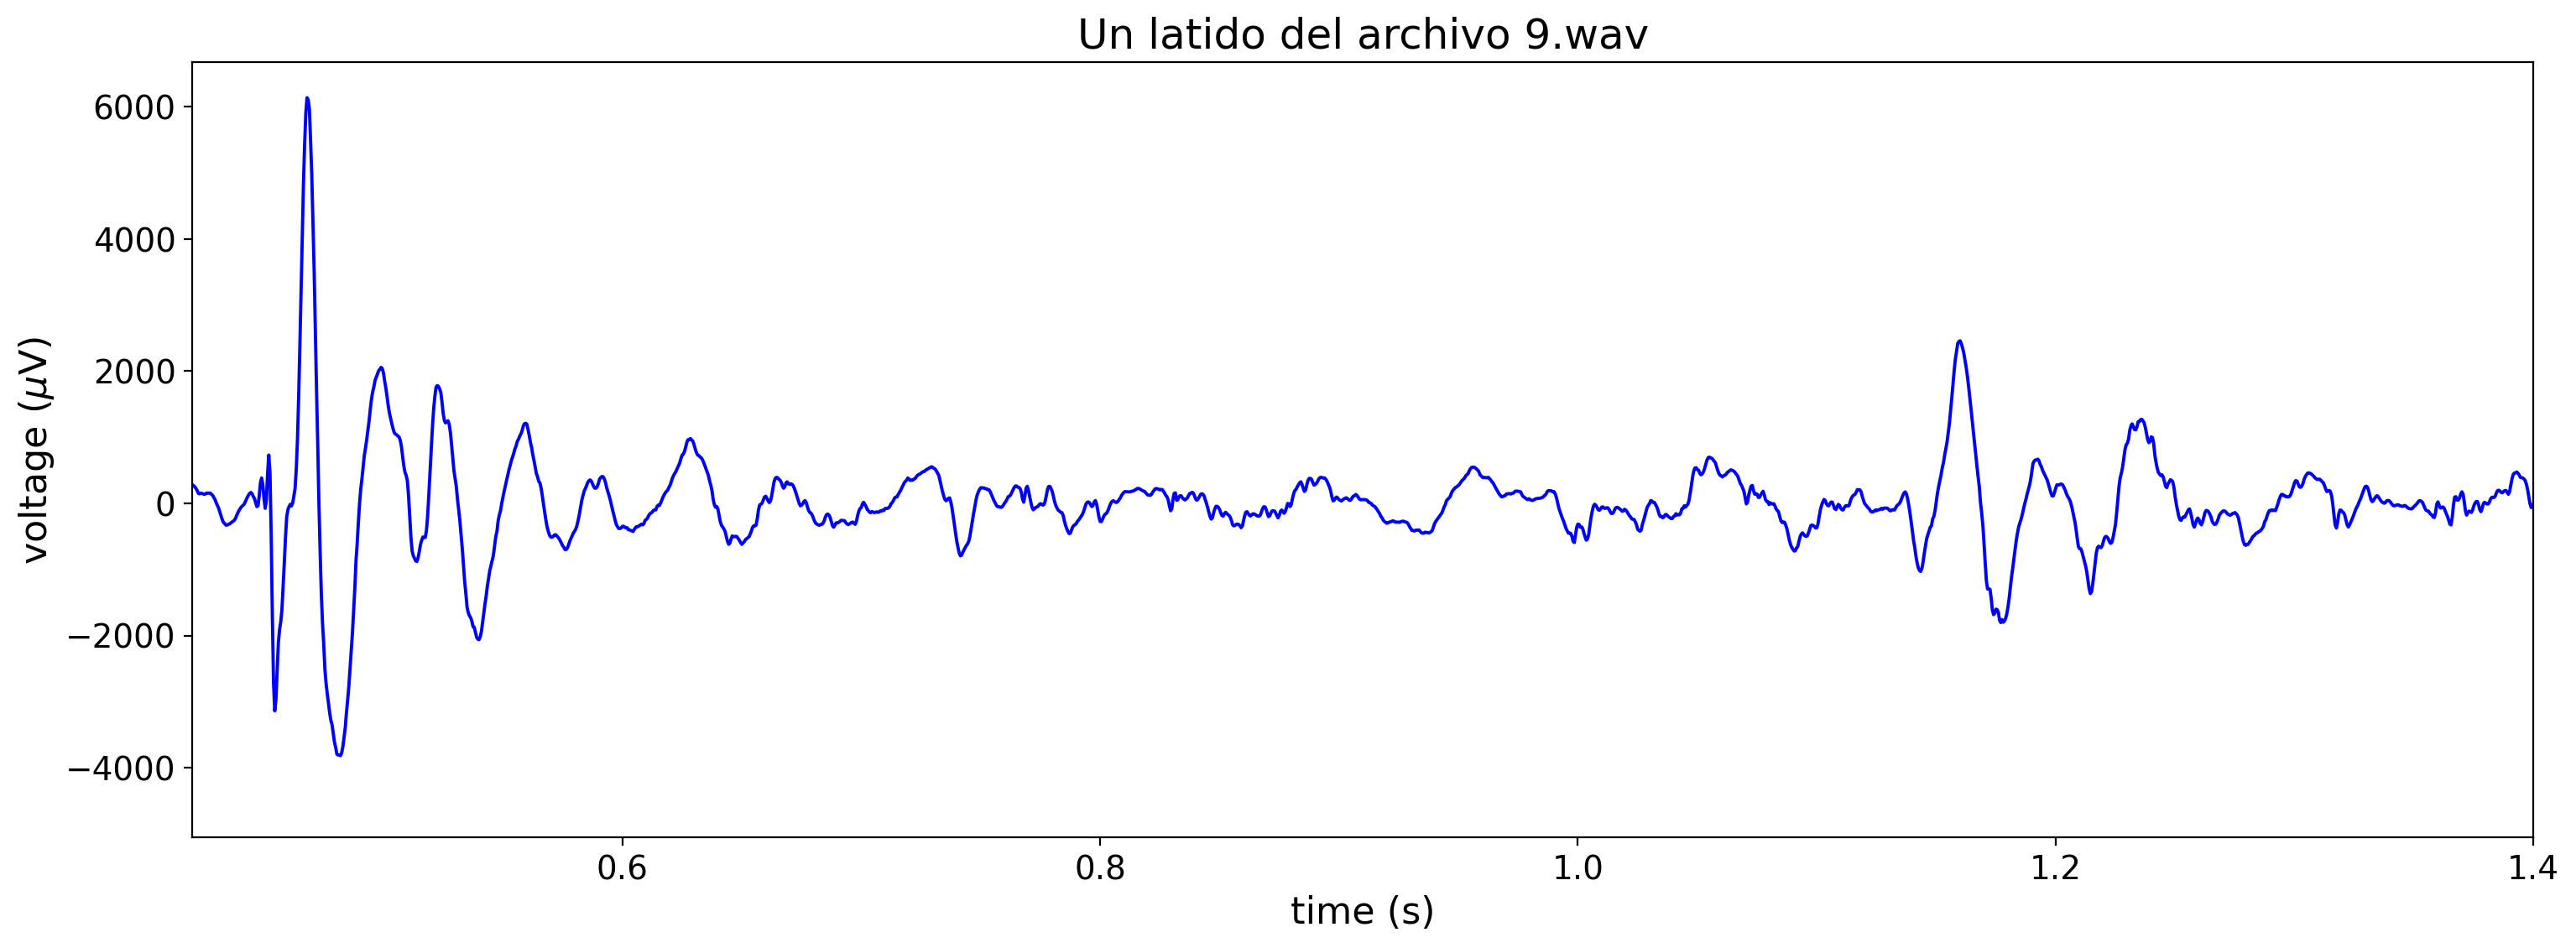

In [16]:
# un latido del archivo 9.wav
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(.42,1.4)
plt.title("Un latido del archivo 9.wav")
plt.show()

La siguiente función se encarga de encontrar los máximos locales en cada gráfica para luego devolver cada valor. En su funcionamiento en caso de que algun valor se sobresalga de la gráfica corrige el threshold ratio para ajustar la gráfica al punto en que todos los puntos sean visibles.

In [17]:
# Funcion para detectar los maximos locales de las graficas
def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")
    
    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False
    
    for i in range(0, len(waveData)):
            
        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved 
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])
            
        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False     

    return mxs_indices


Ciclo for encargado de volver a cargar cada archivo .wav y calcular la frecuencia cardíaca media en latidos por minuto (BPM). Esto se visualiza en el (mean_bpm).

Beats per minute: 60.56187966130209


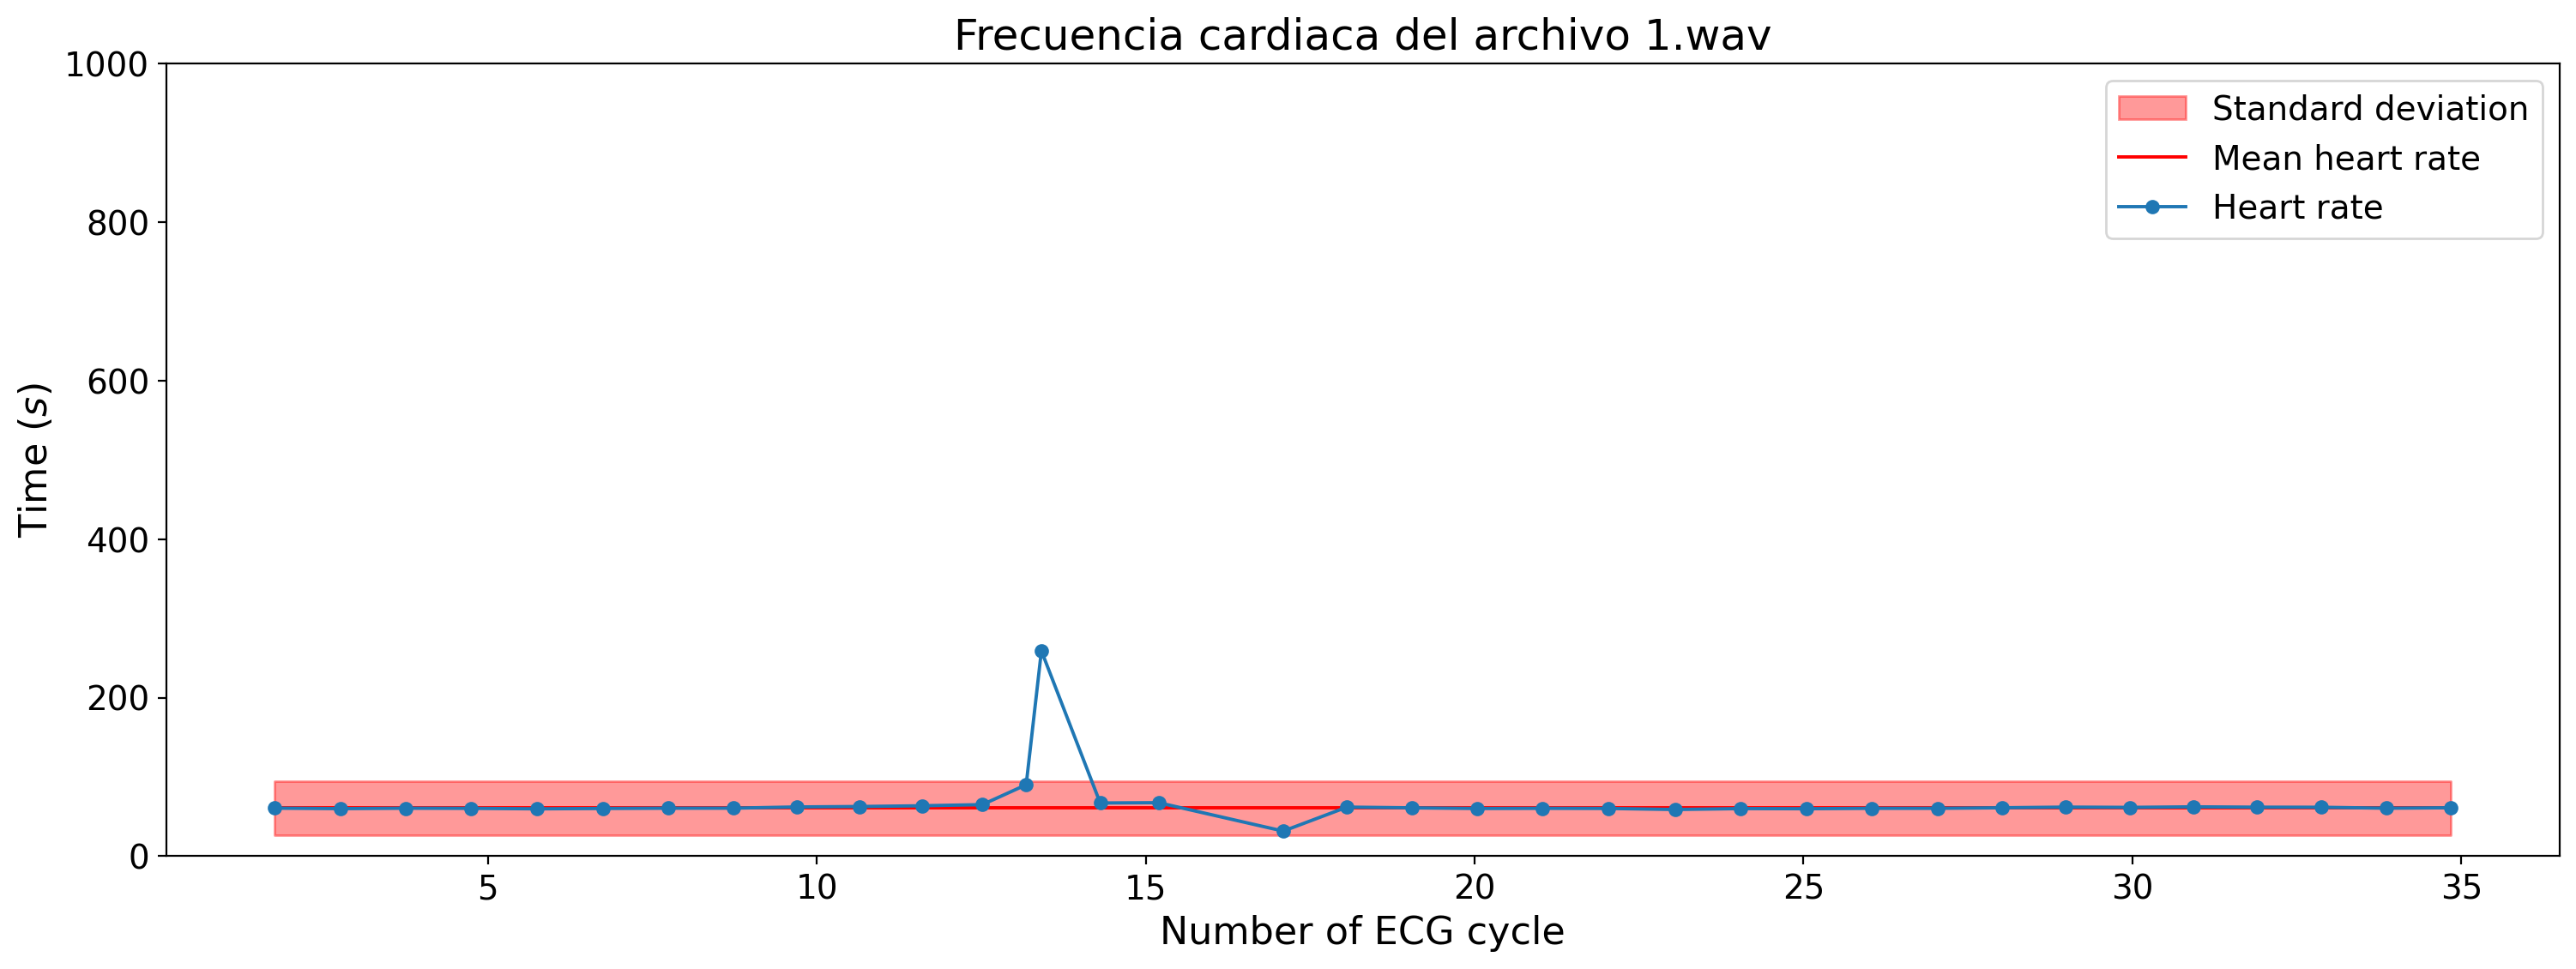

Beats per minute: 296.7088364500564


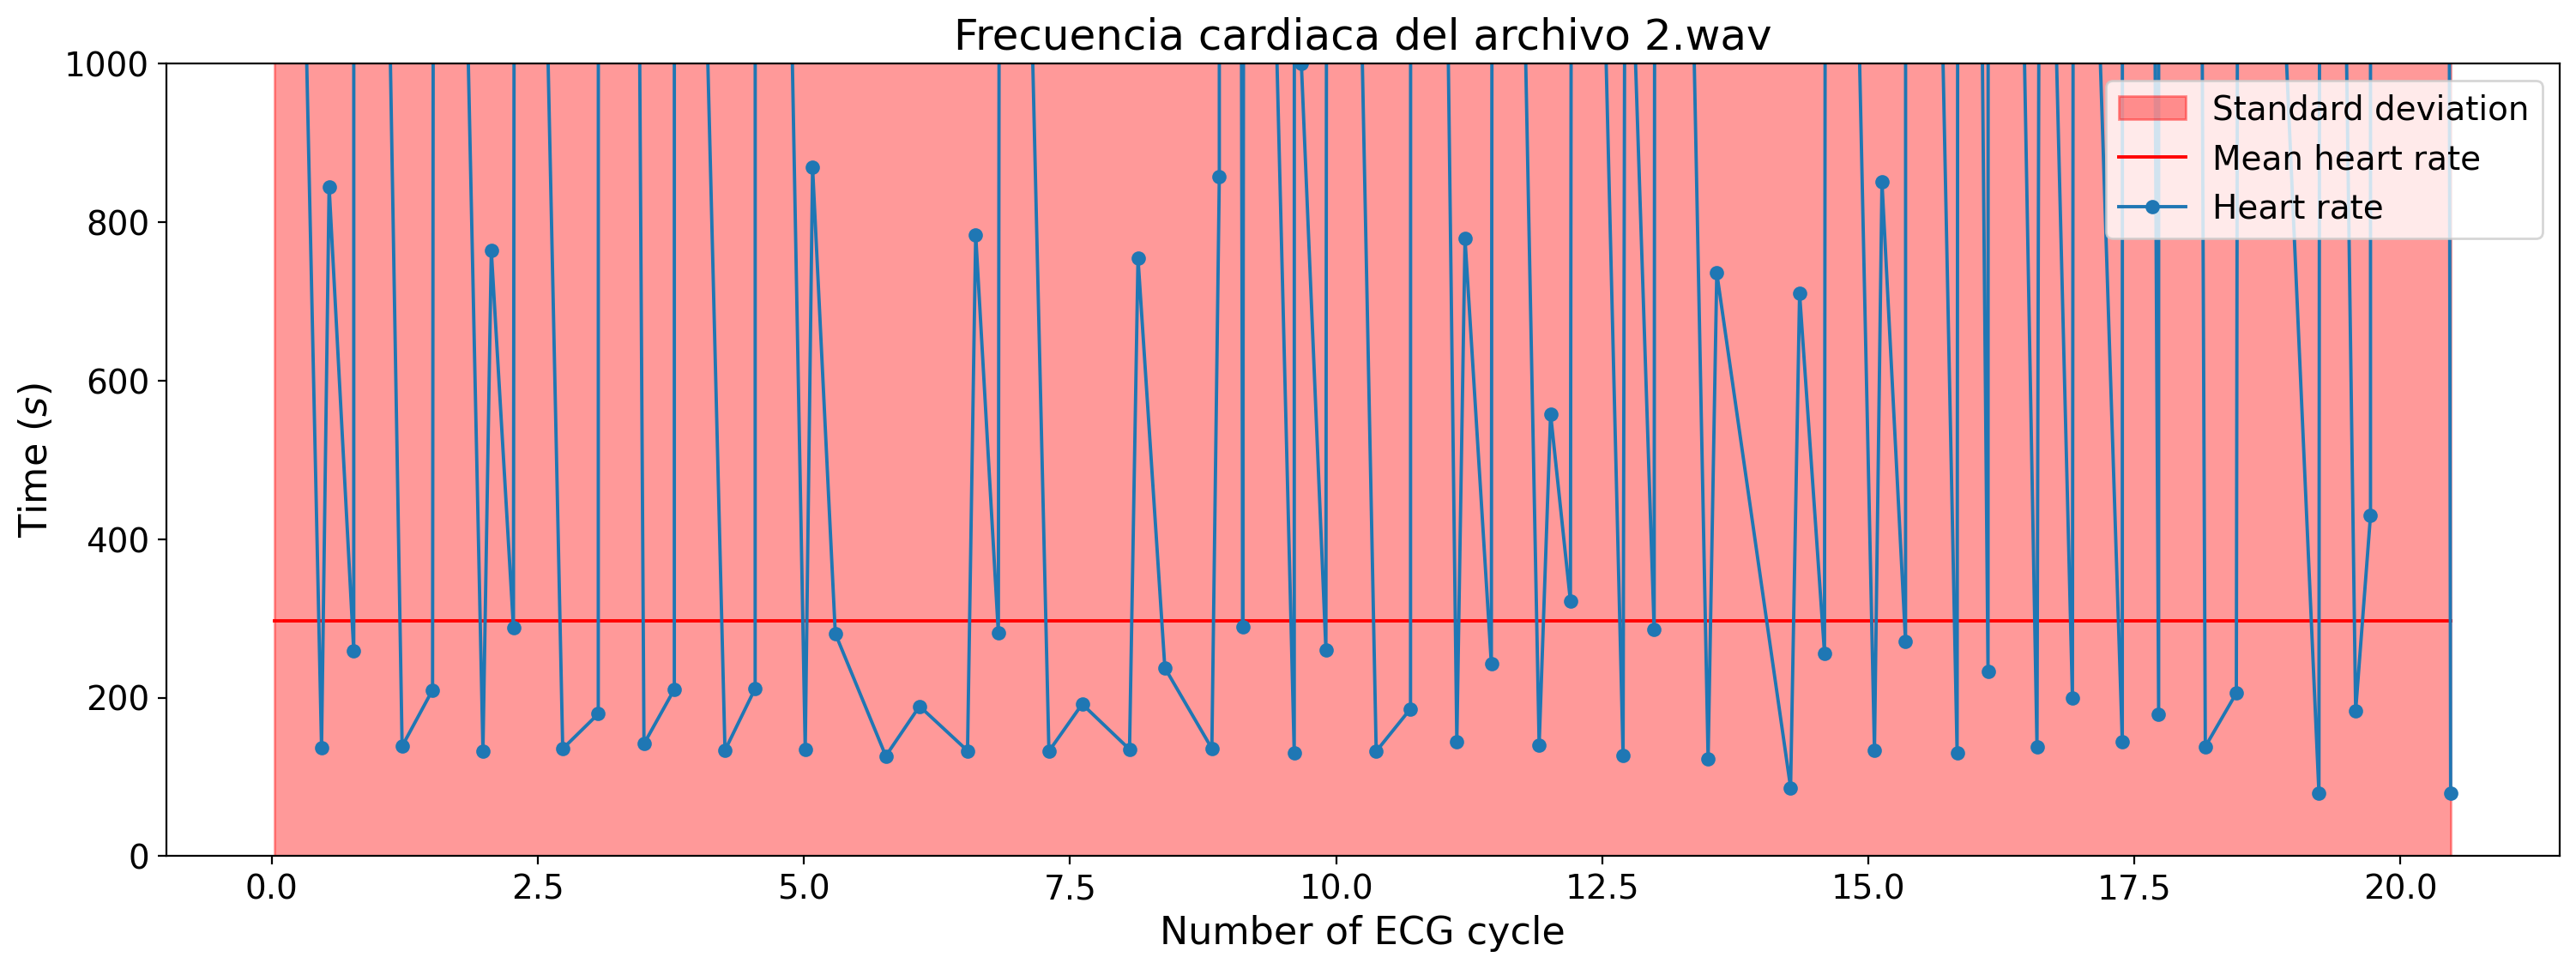

Beats per minute: 457.0864847089773


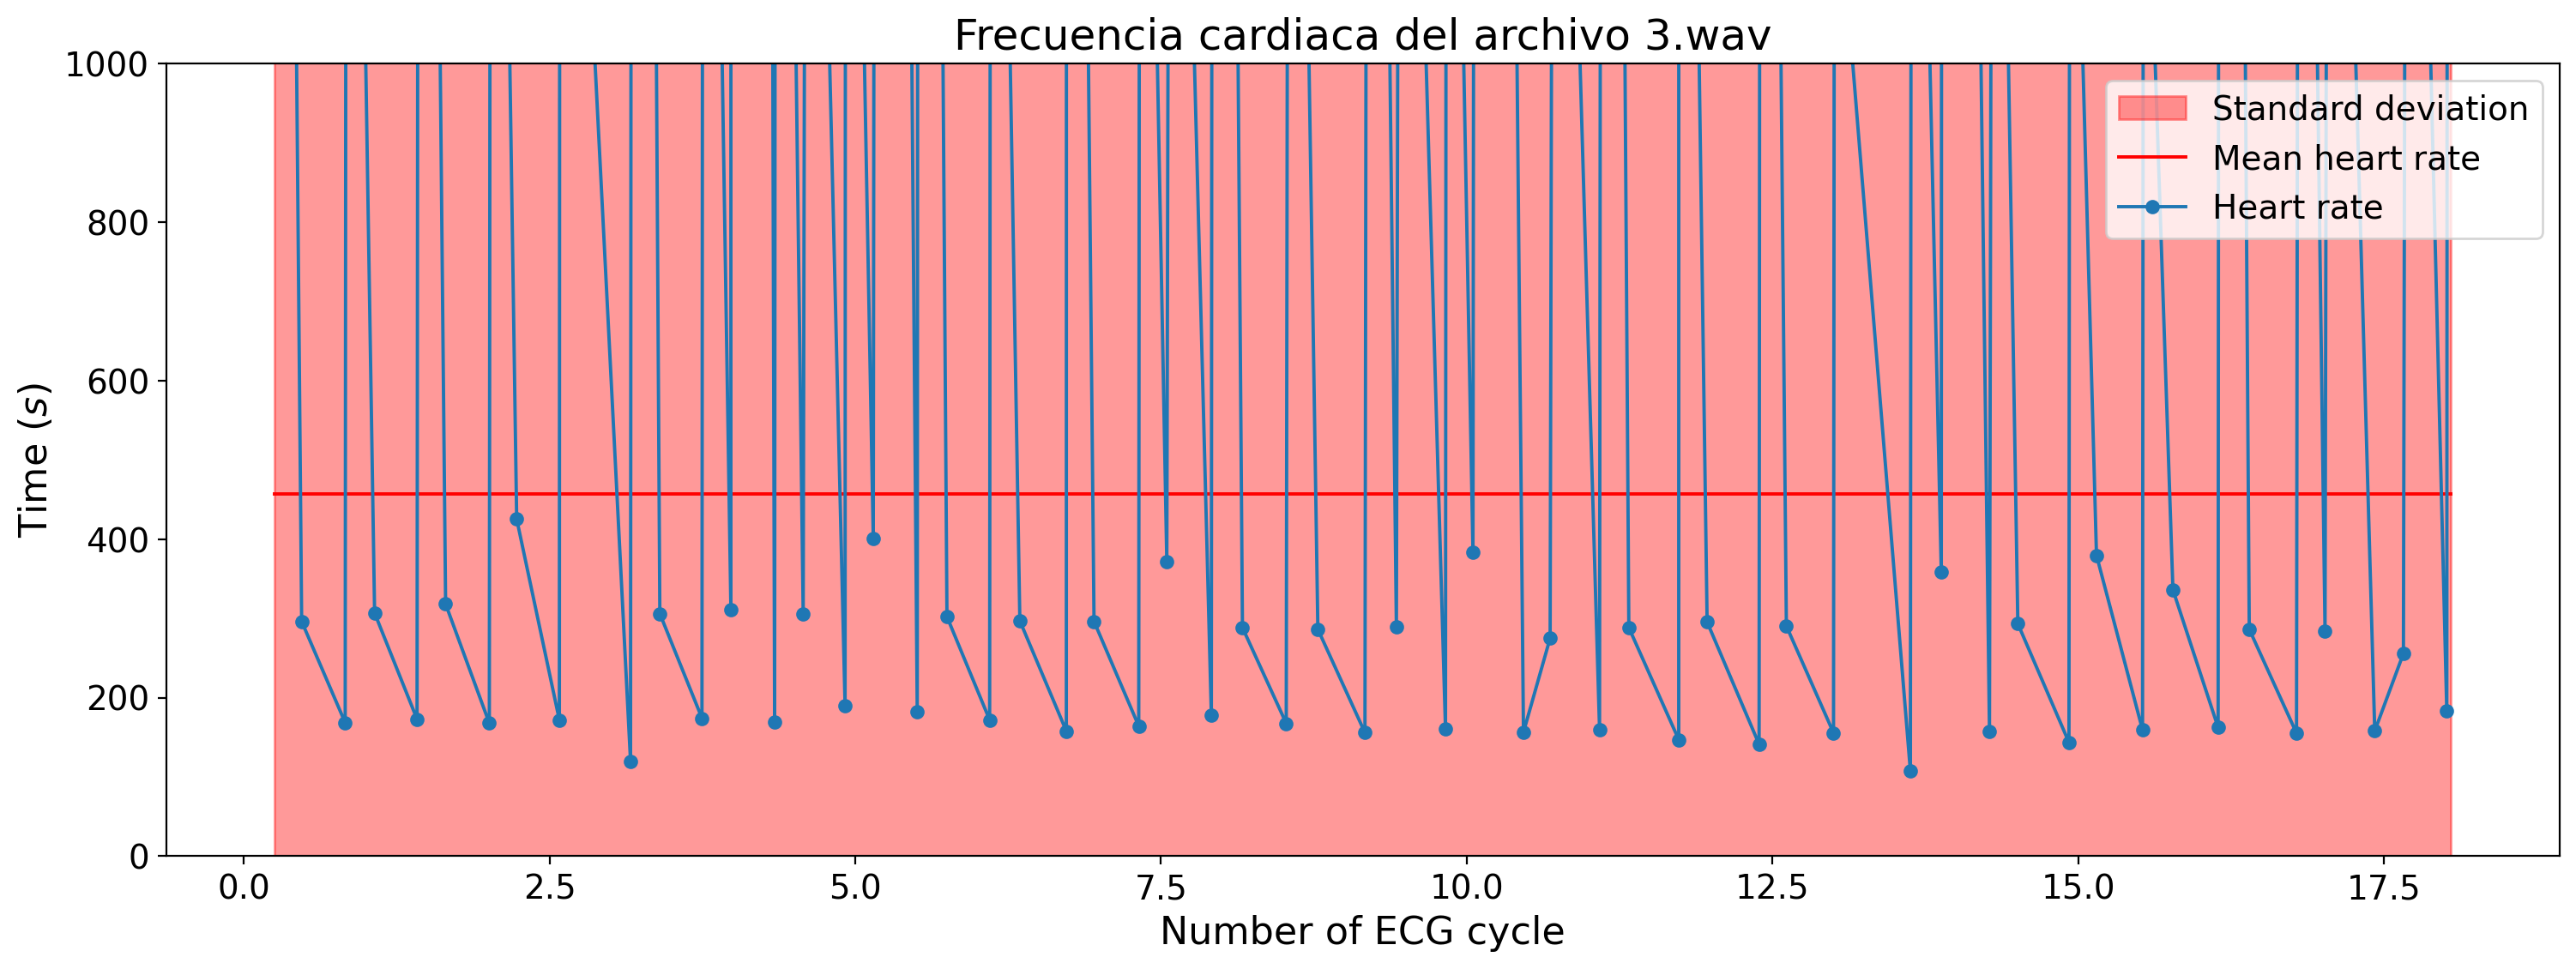

Beats per minute: 577.1919312961853


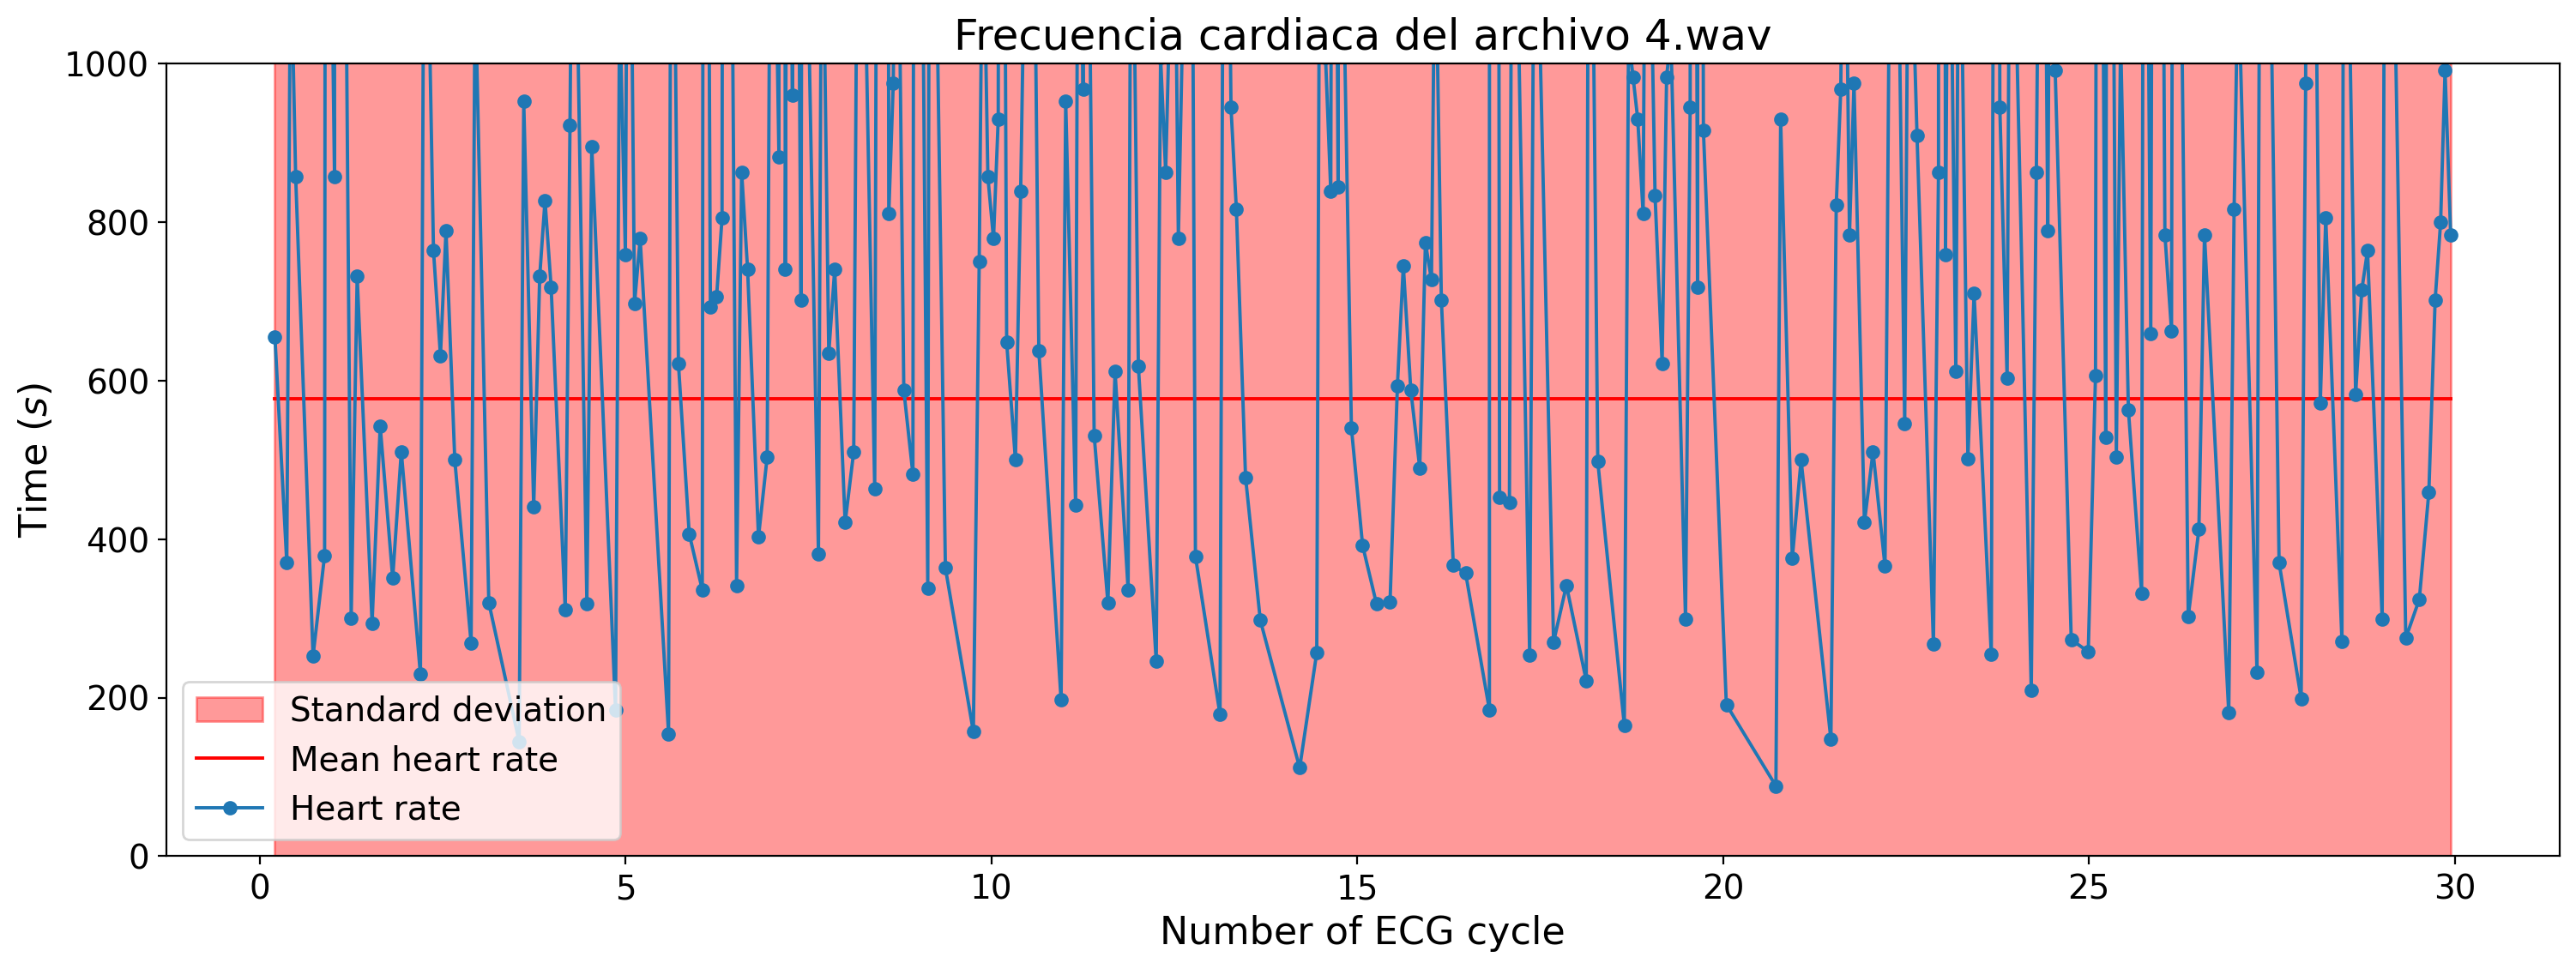

Beats per minute: 95.14668447189418


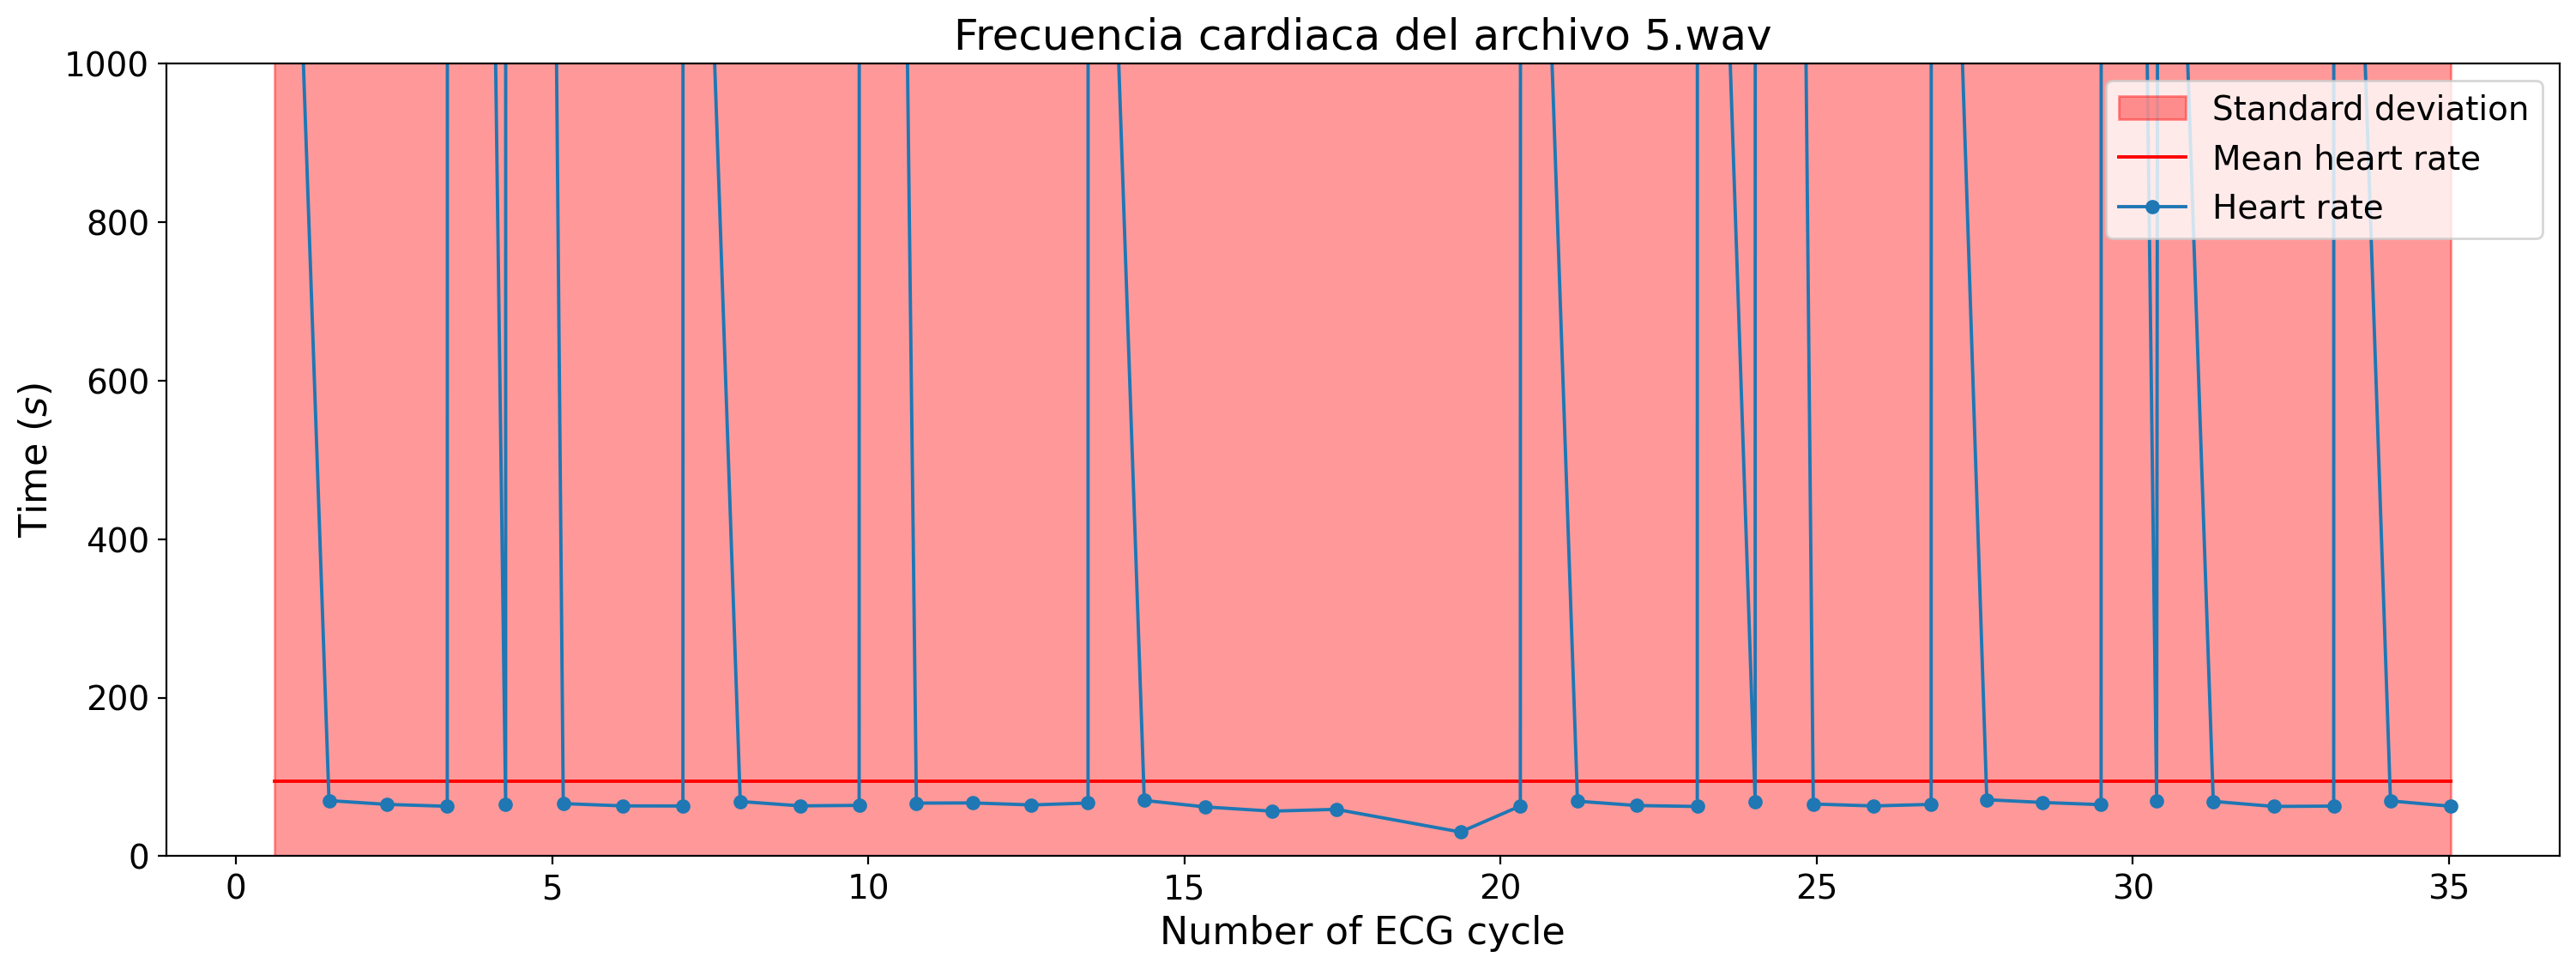

Beats per minute: 140.94386714735487


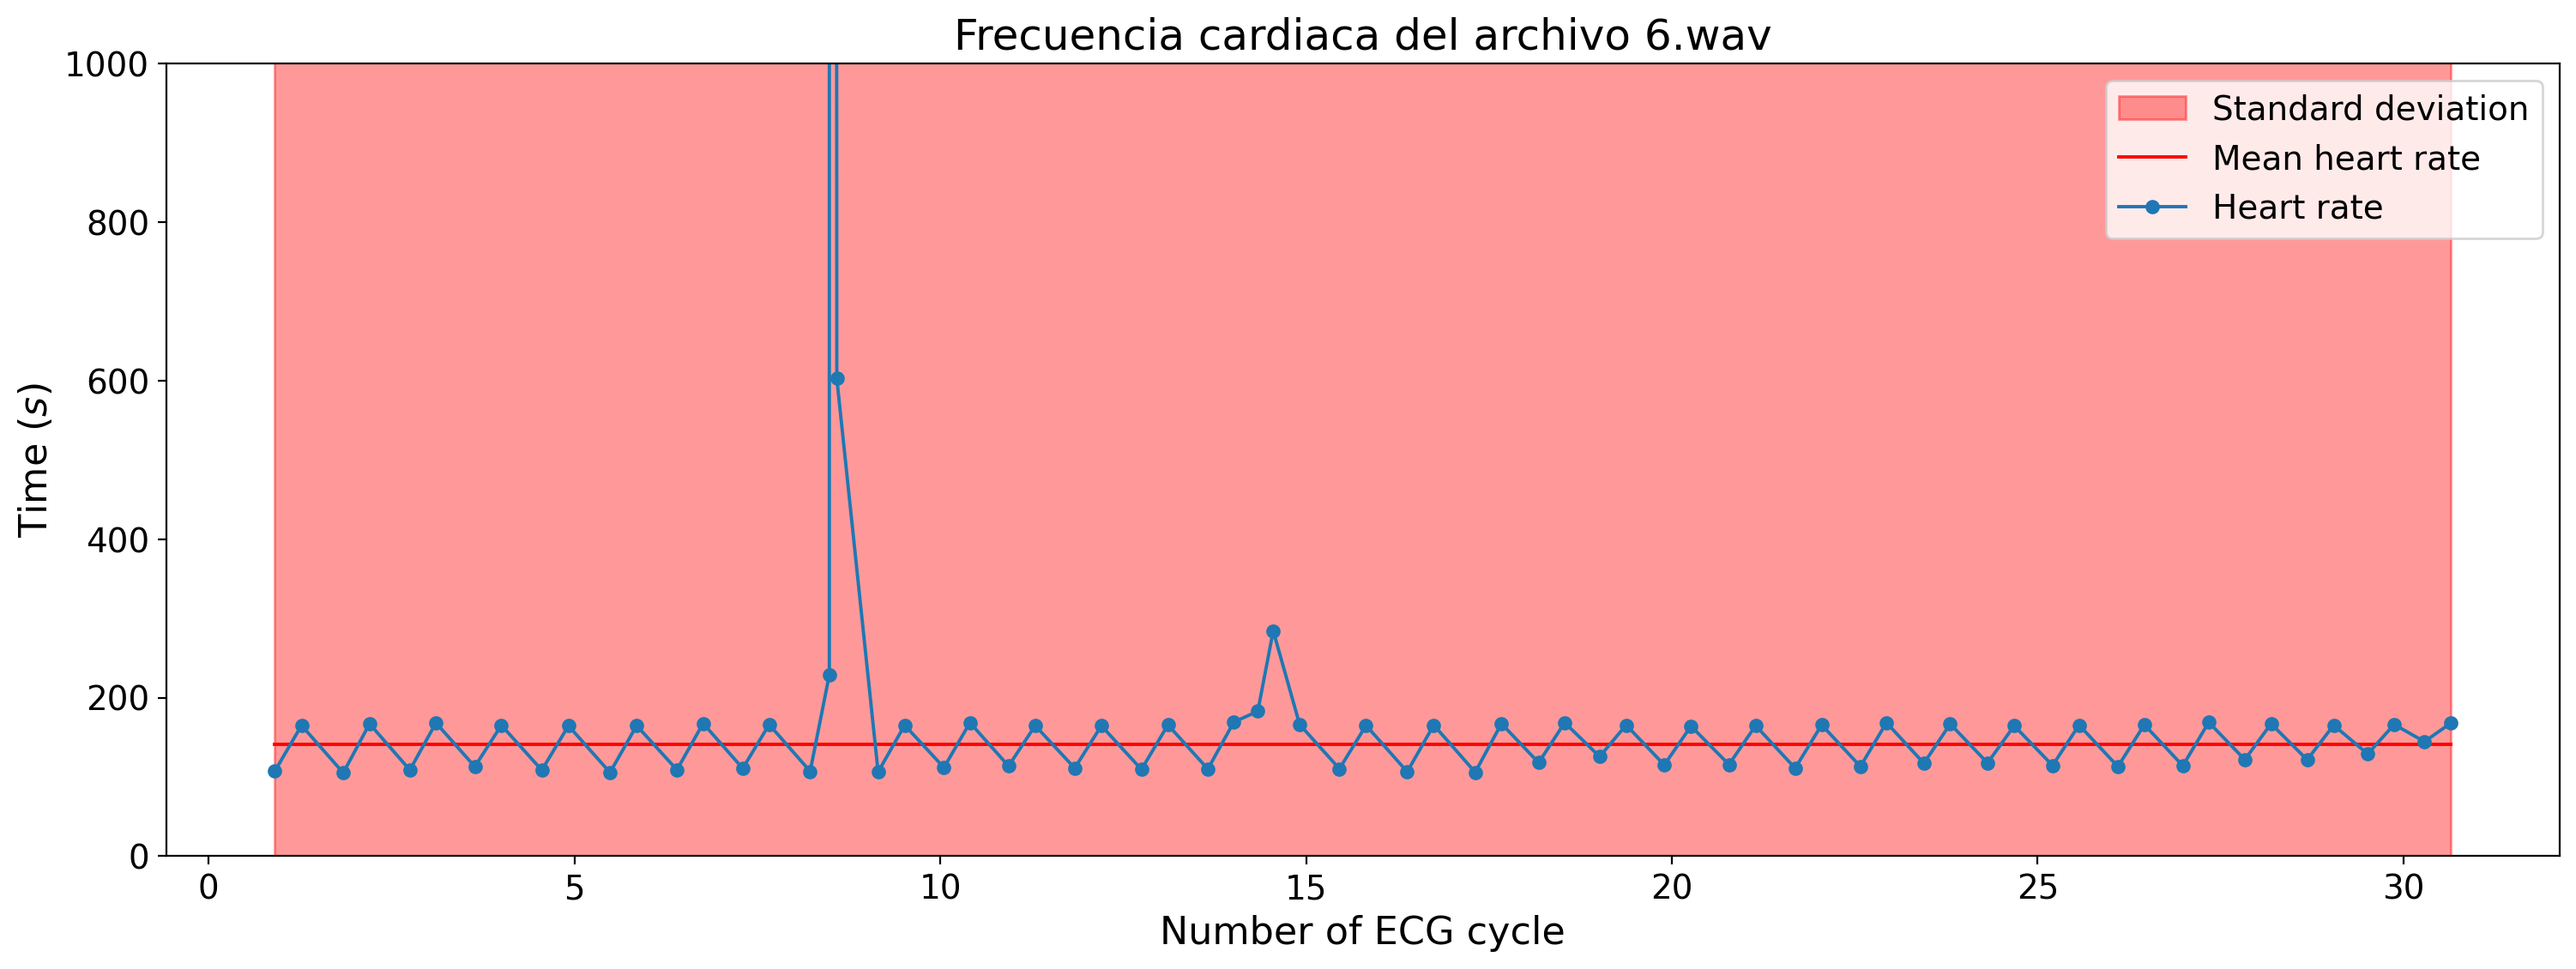

Beats per minute: 249.824257827286


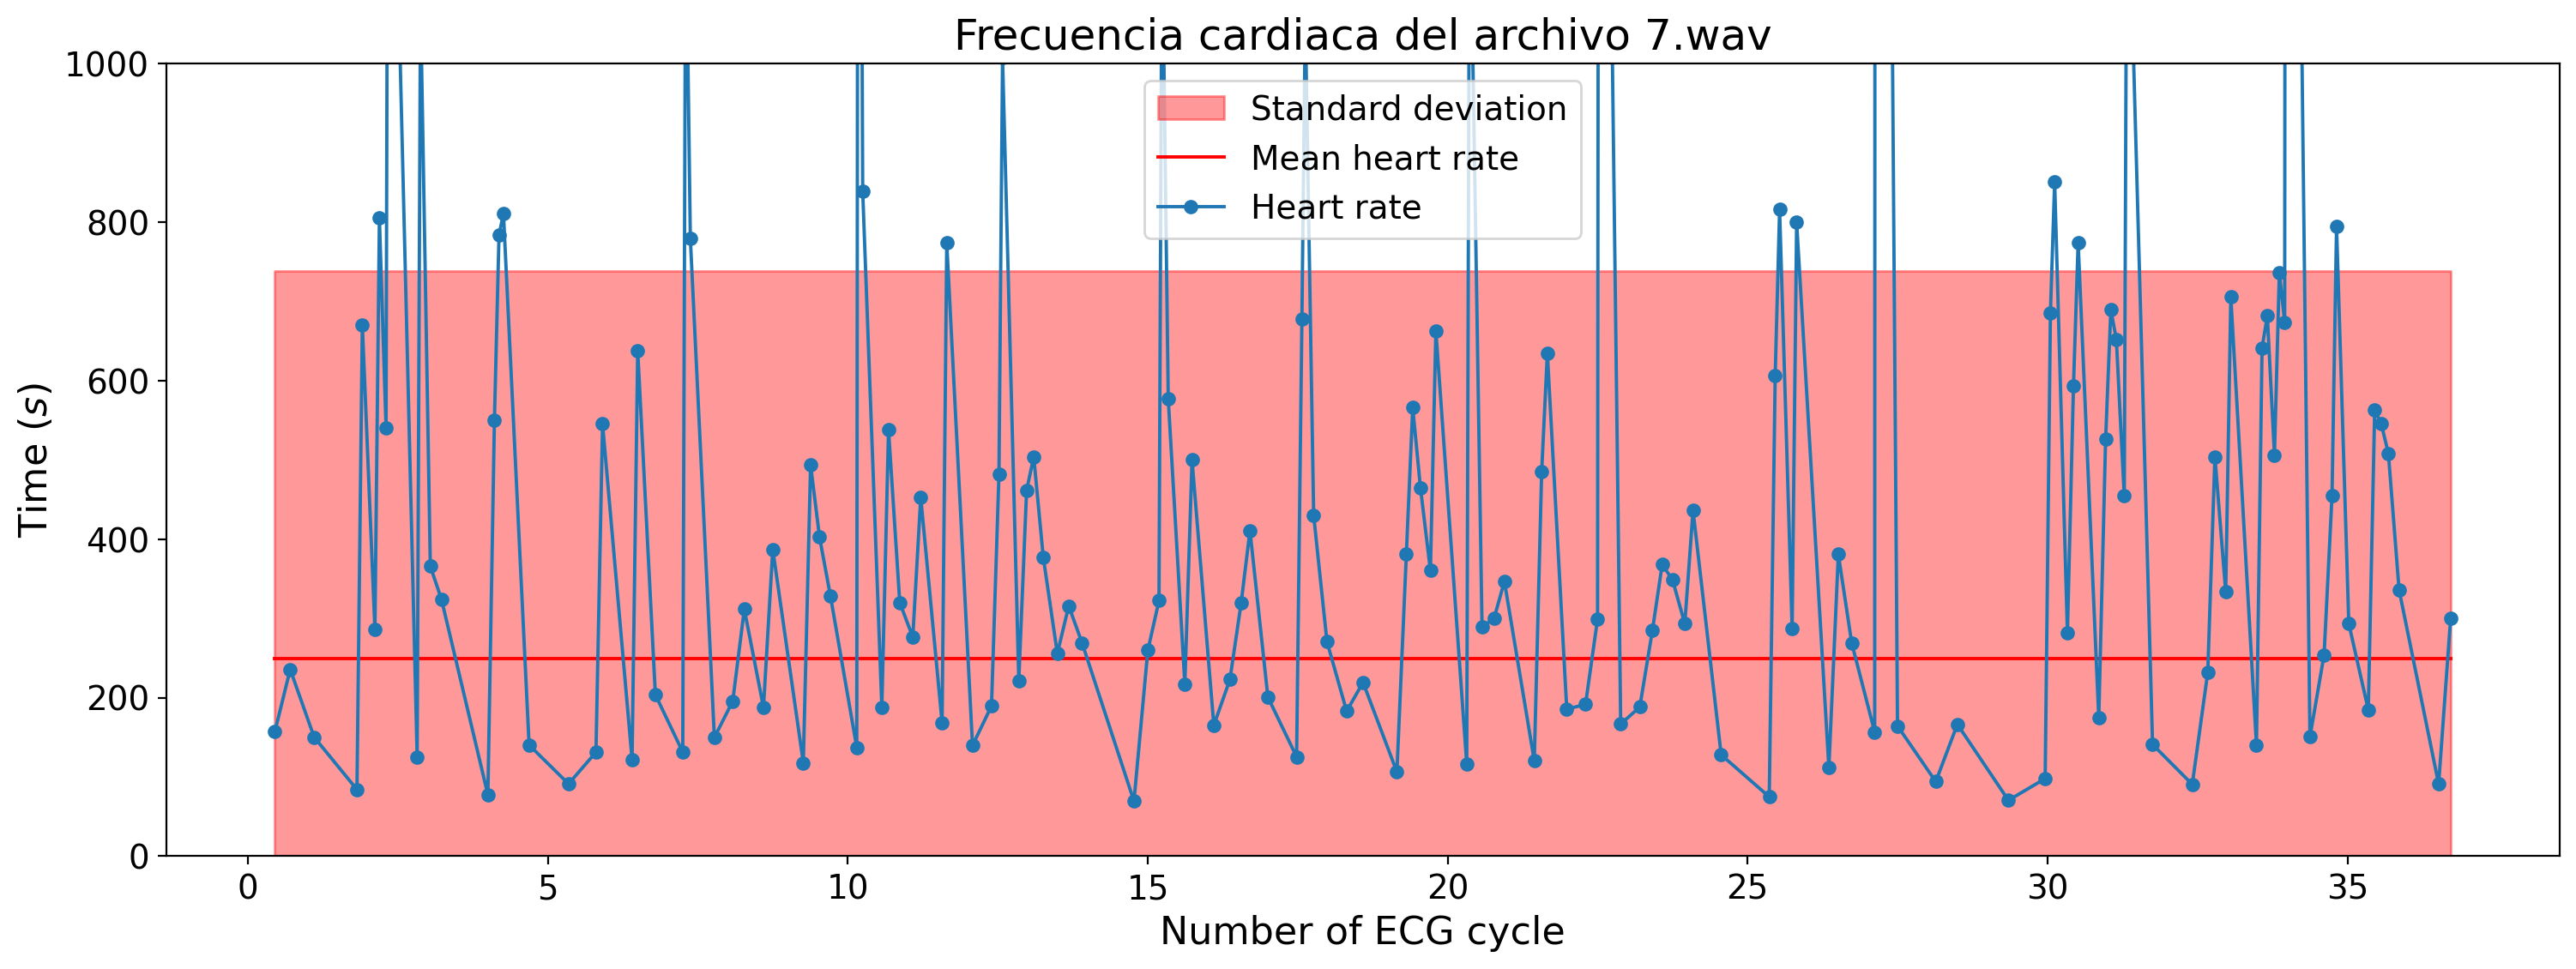

Beats per minute: 191.1335280063711


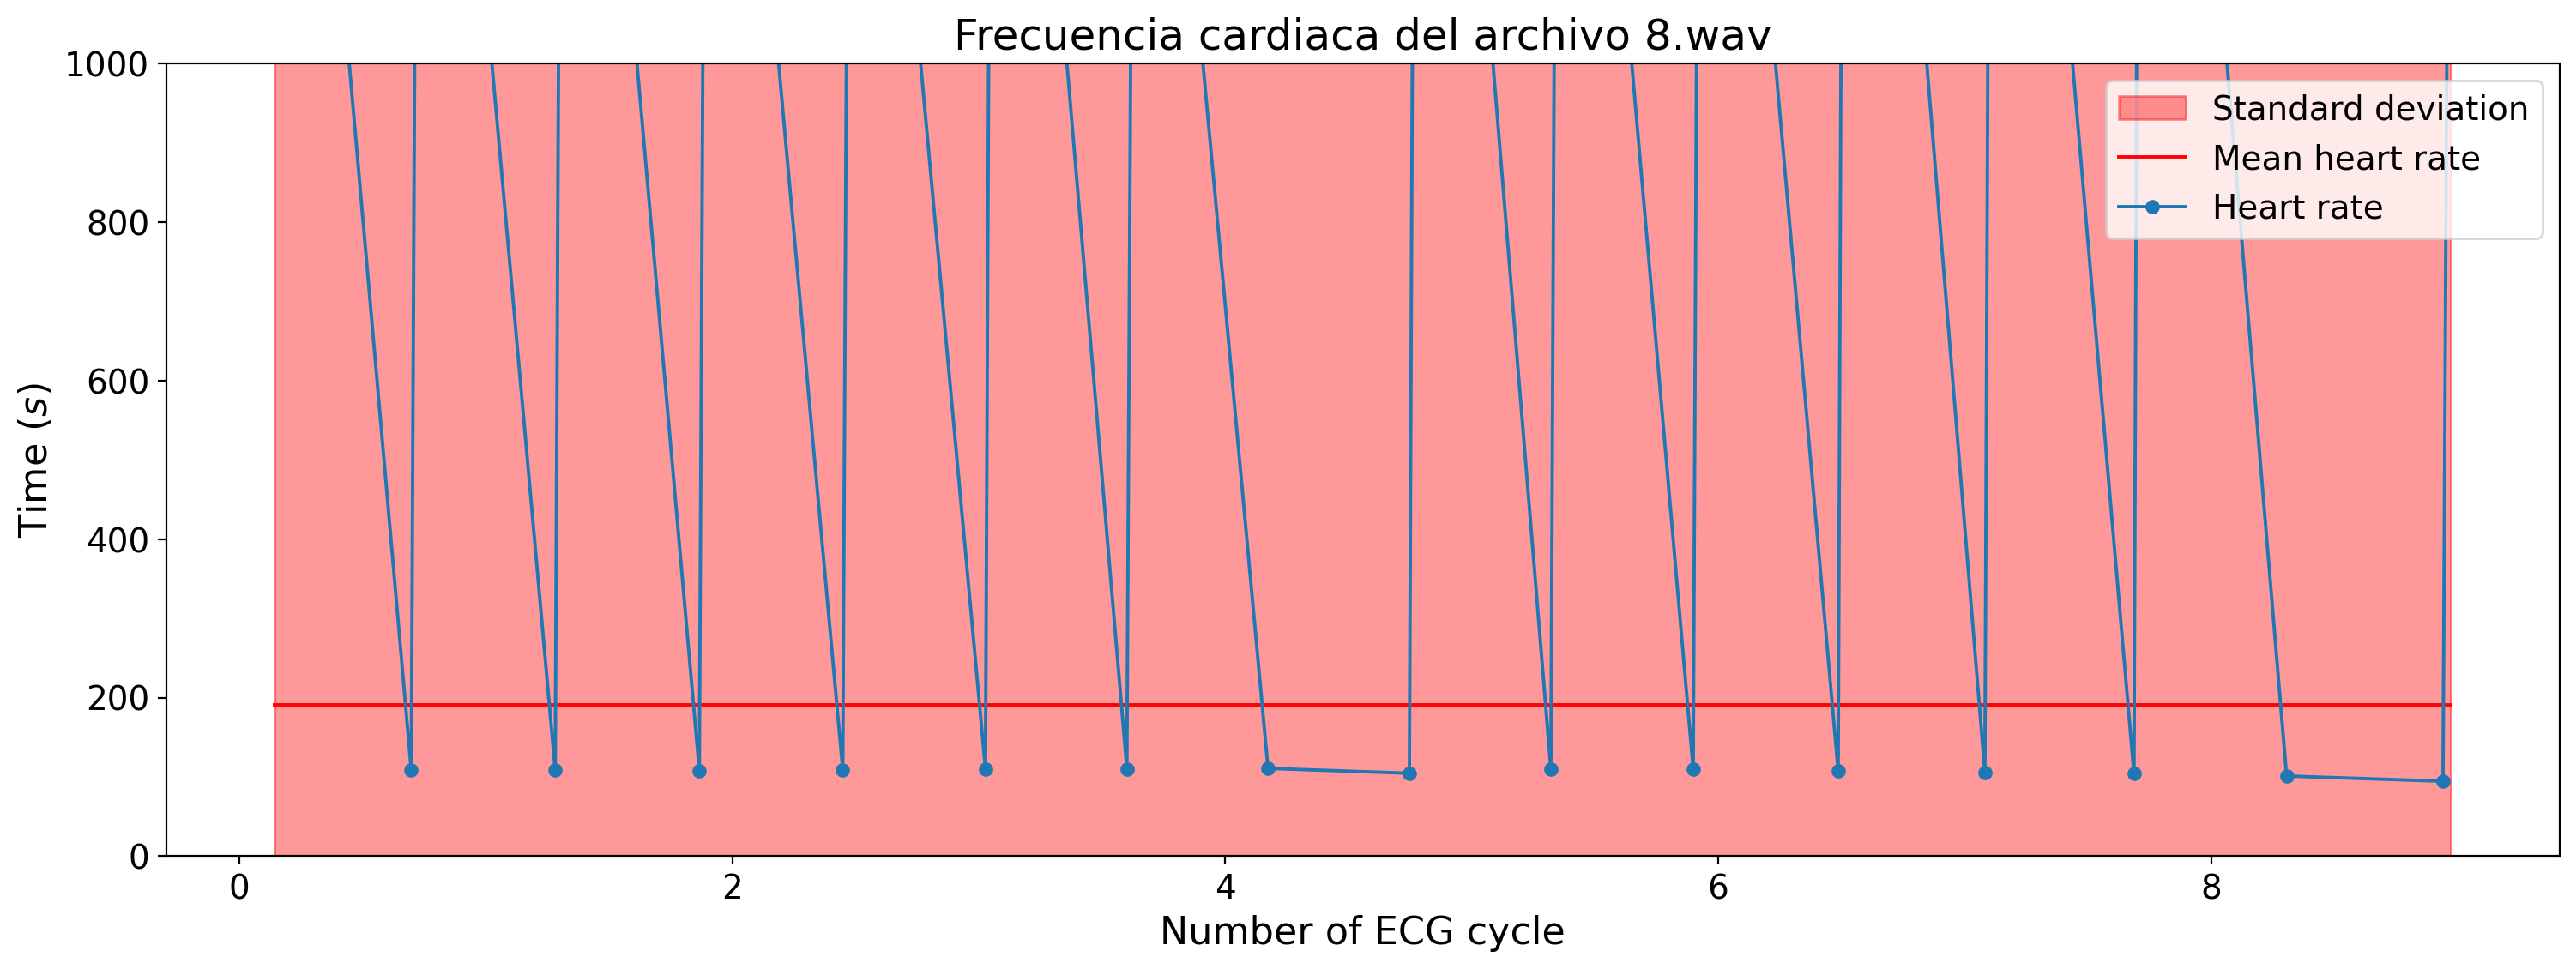

Beats per minute: 59.76343639759286


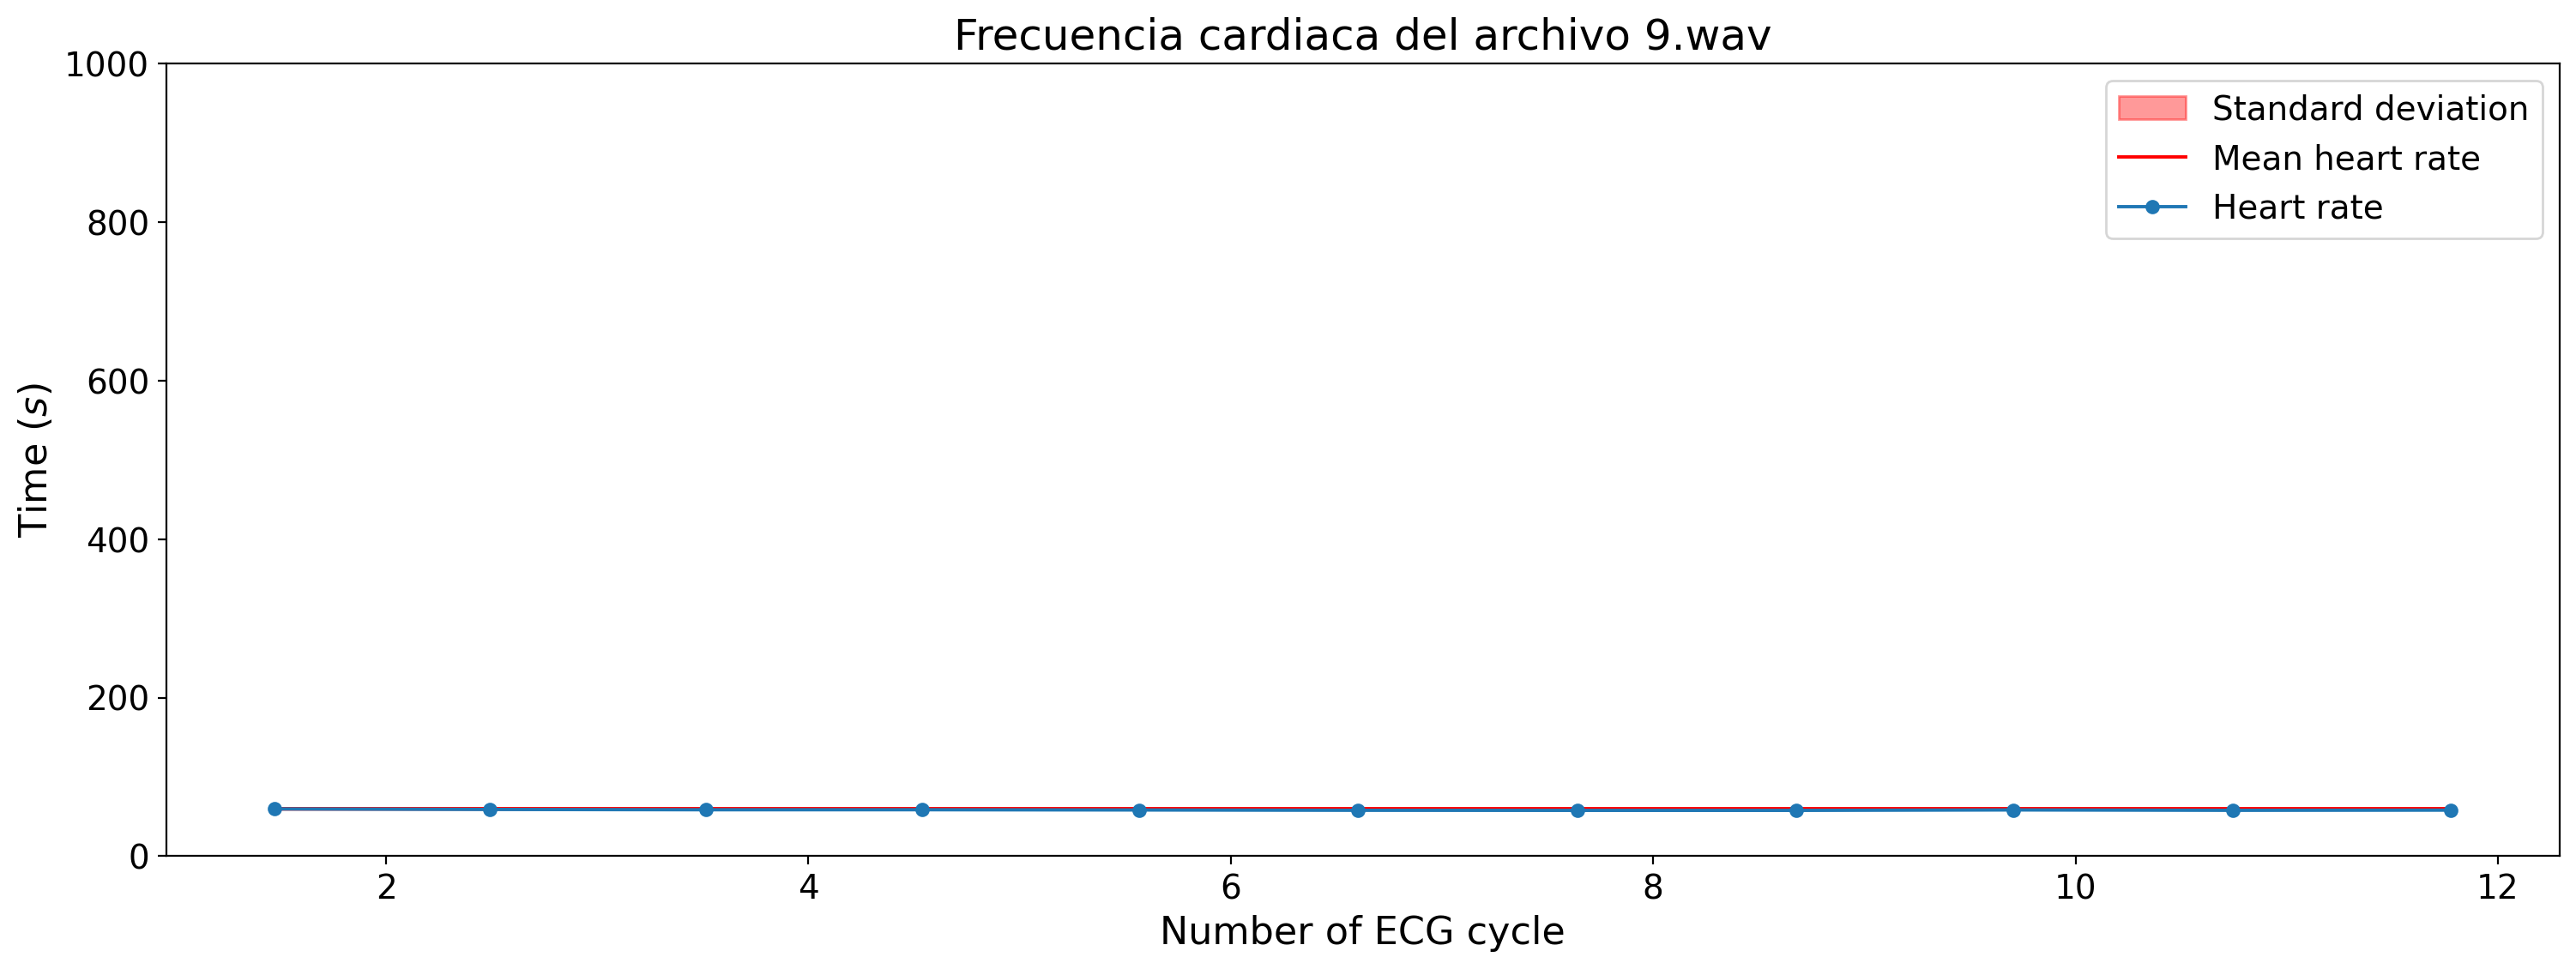

Beats per minute: 100.68027210884354


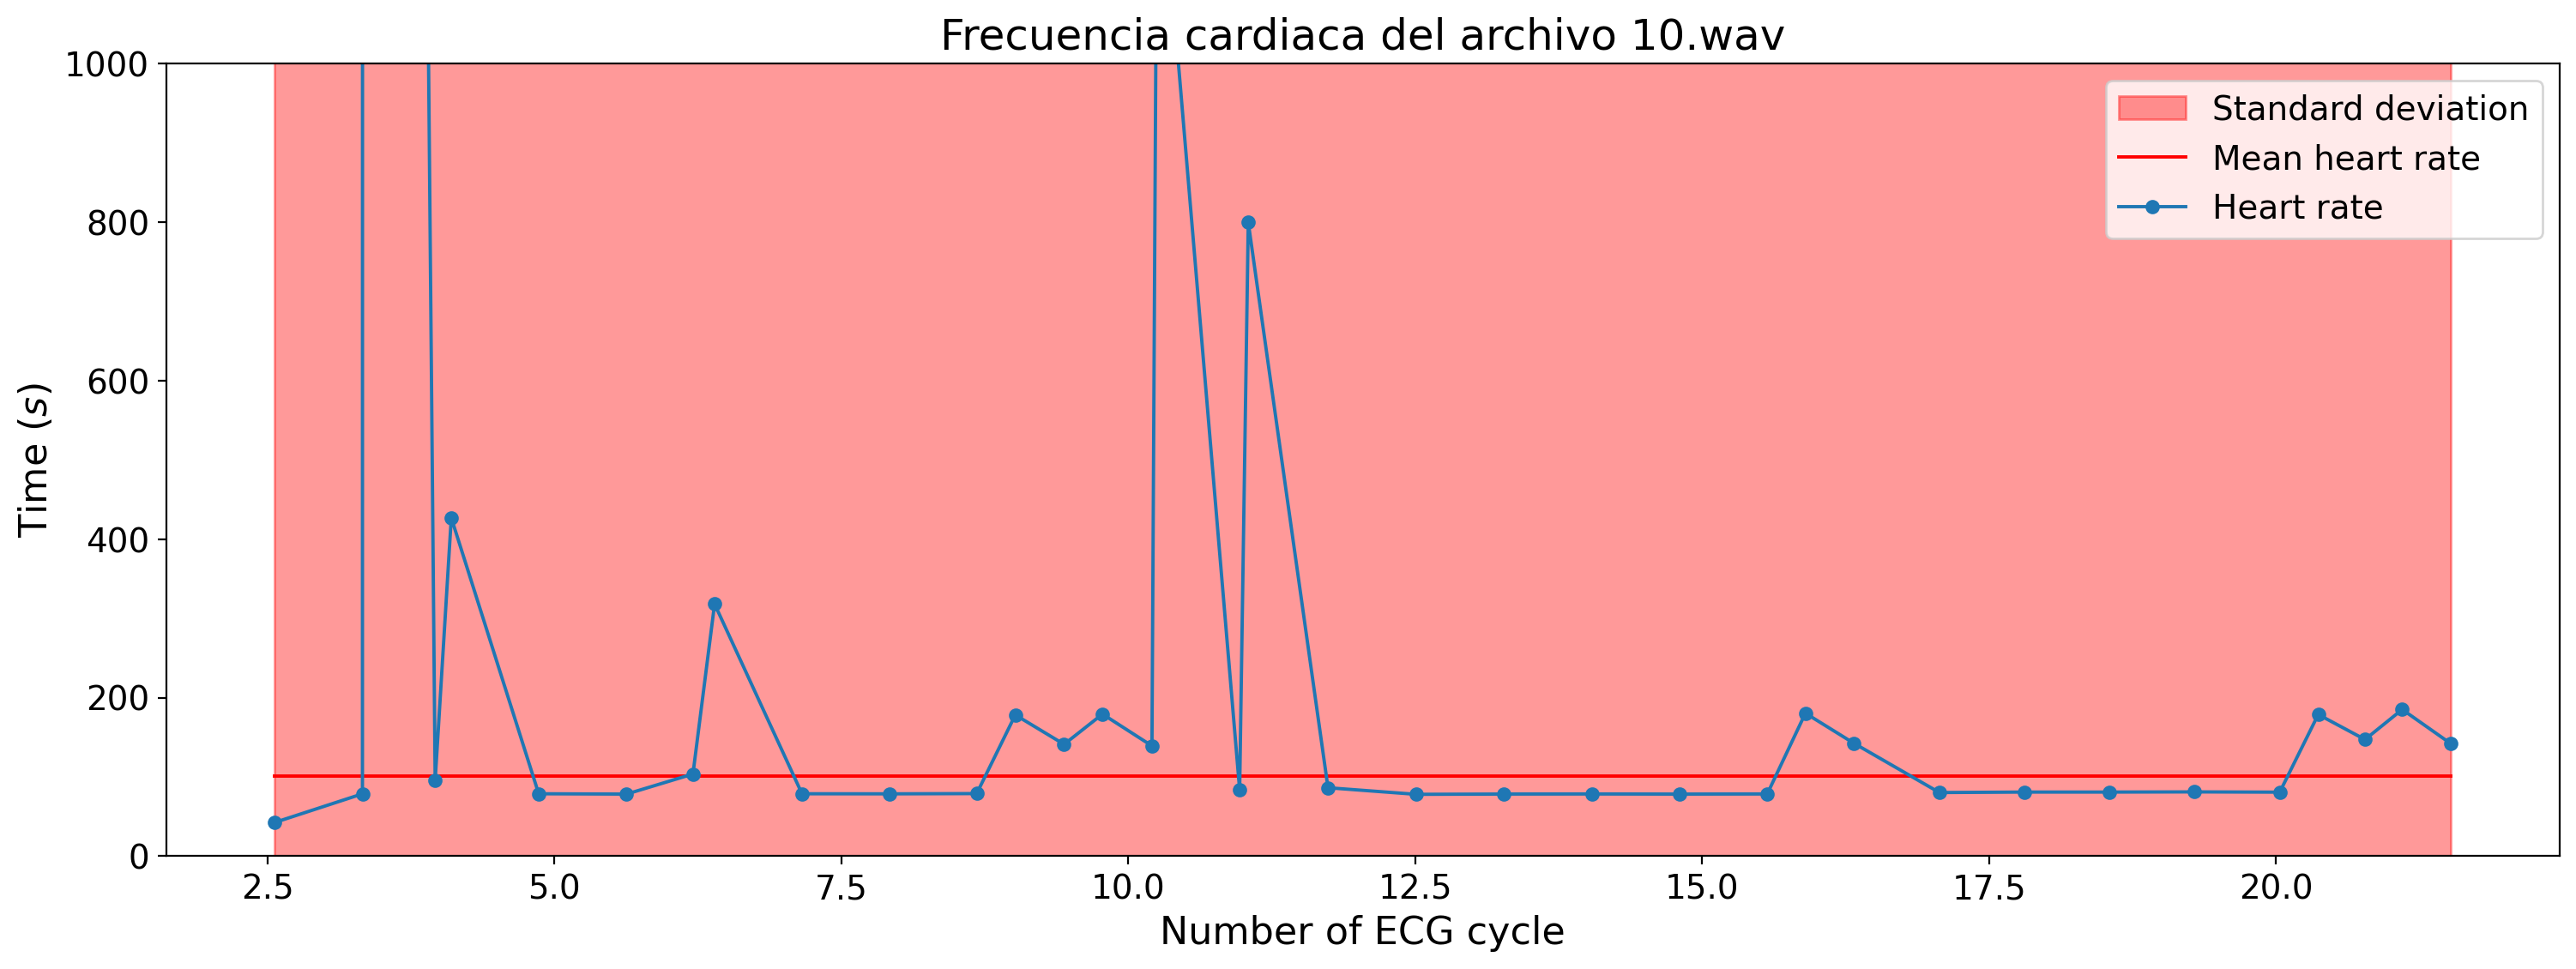

Beats per minute: 23.50570852921424


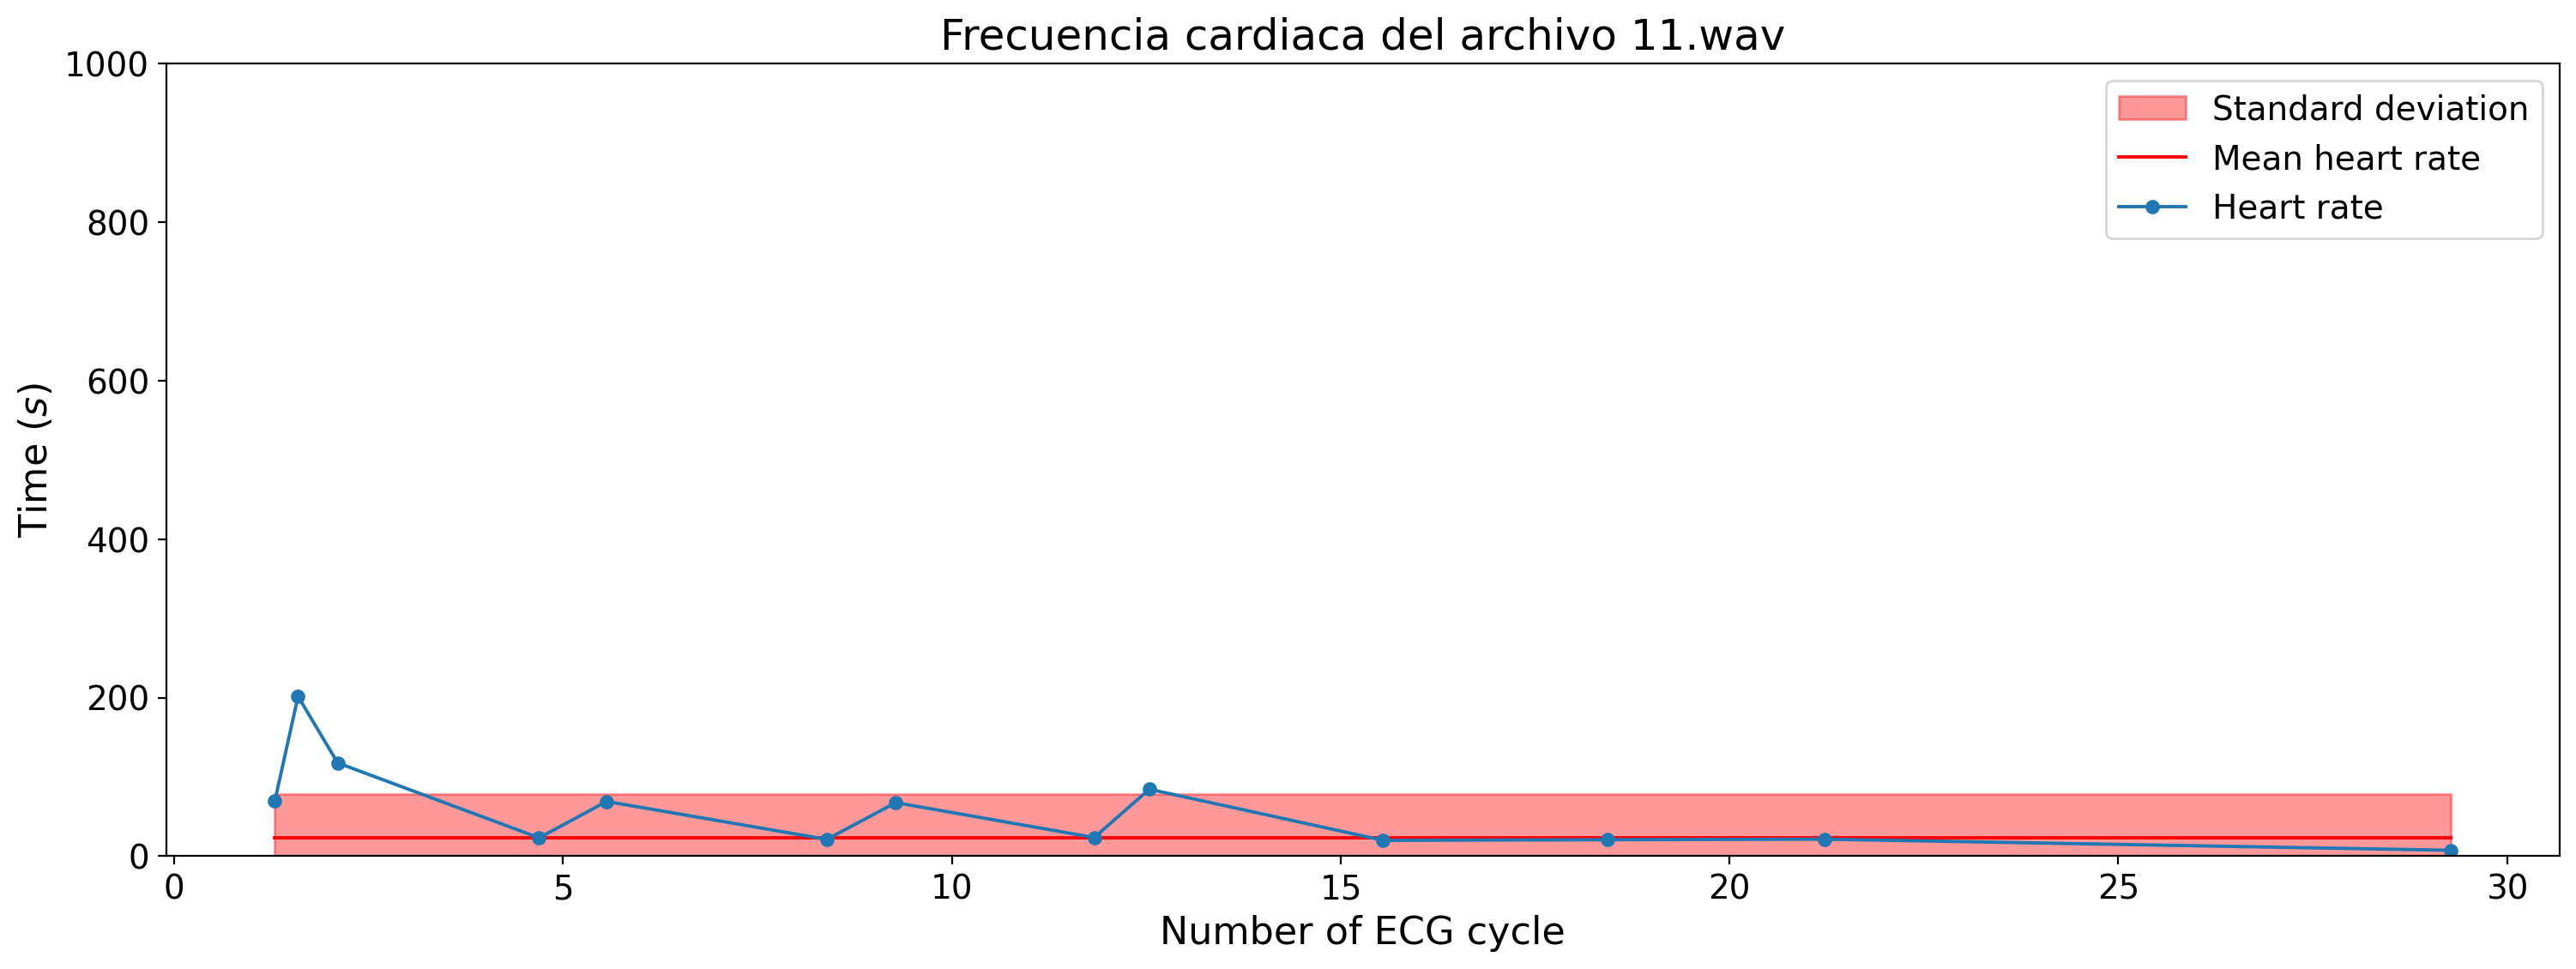

Beats per minute: 121.36833004355556


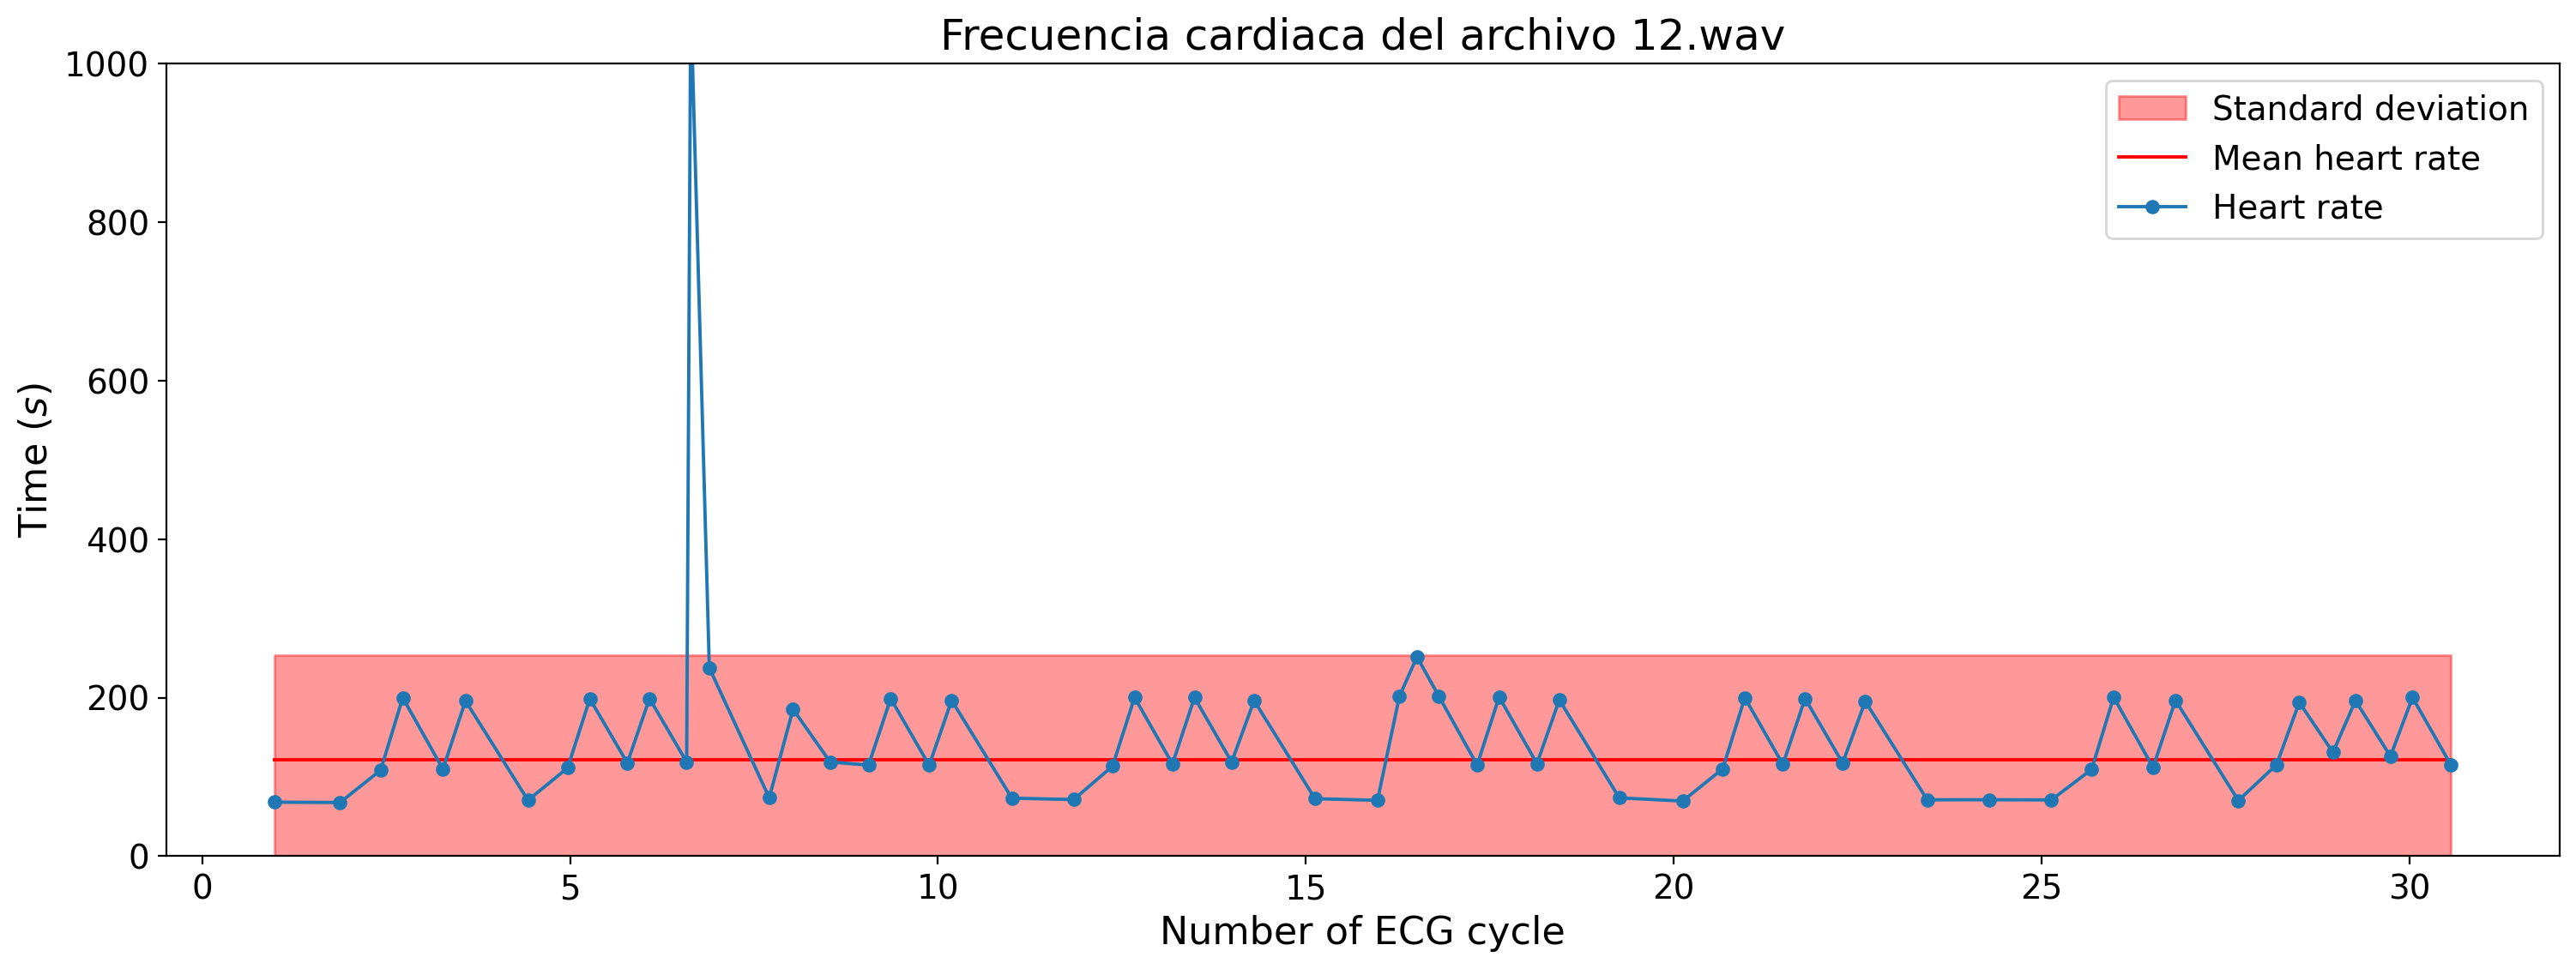

Beats per minute: 146.484375


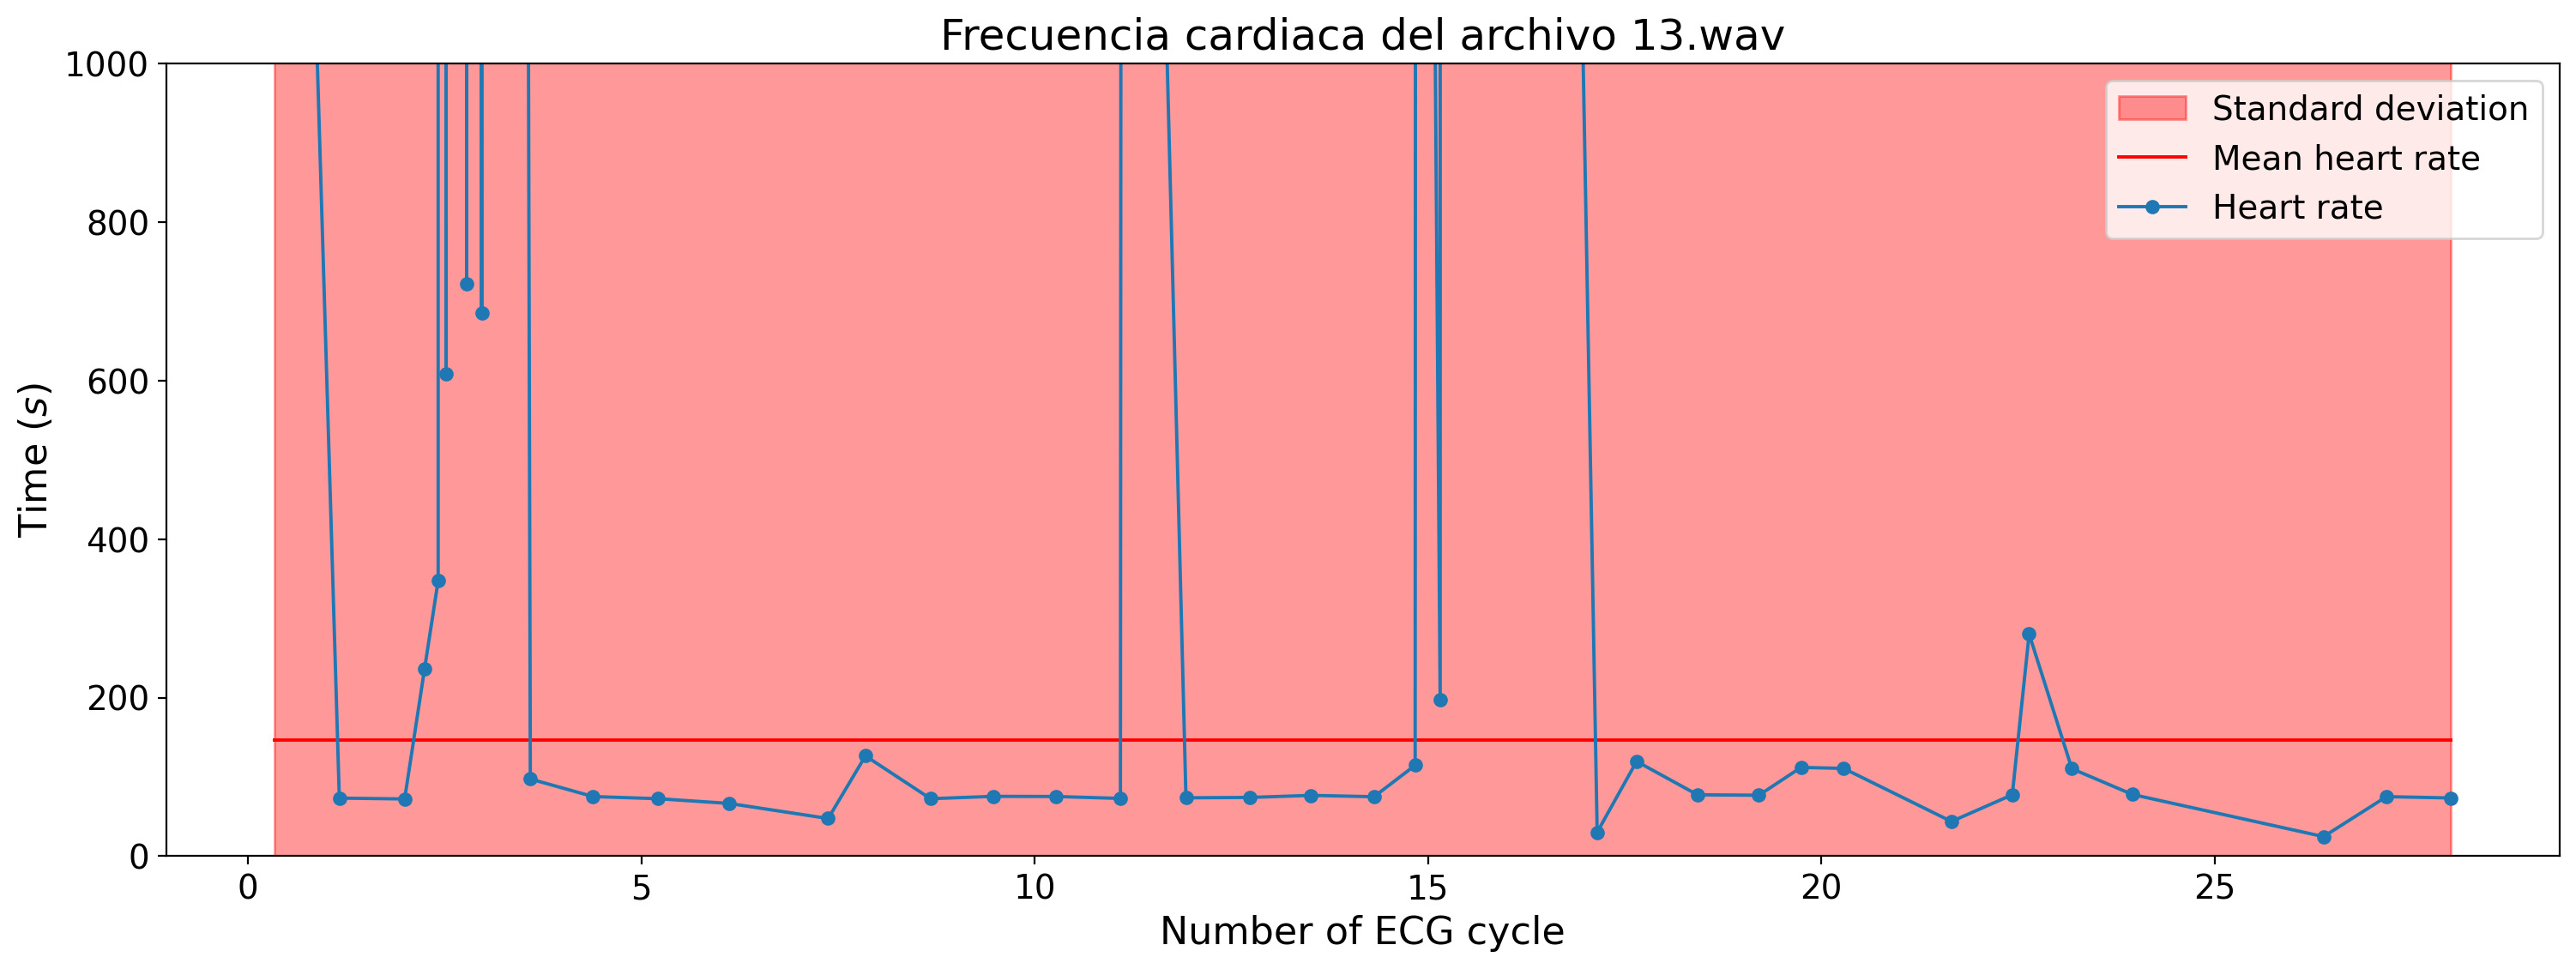

Beats per minute: 204.4378656910251


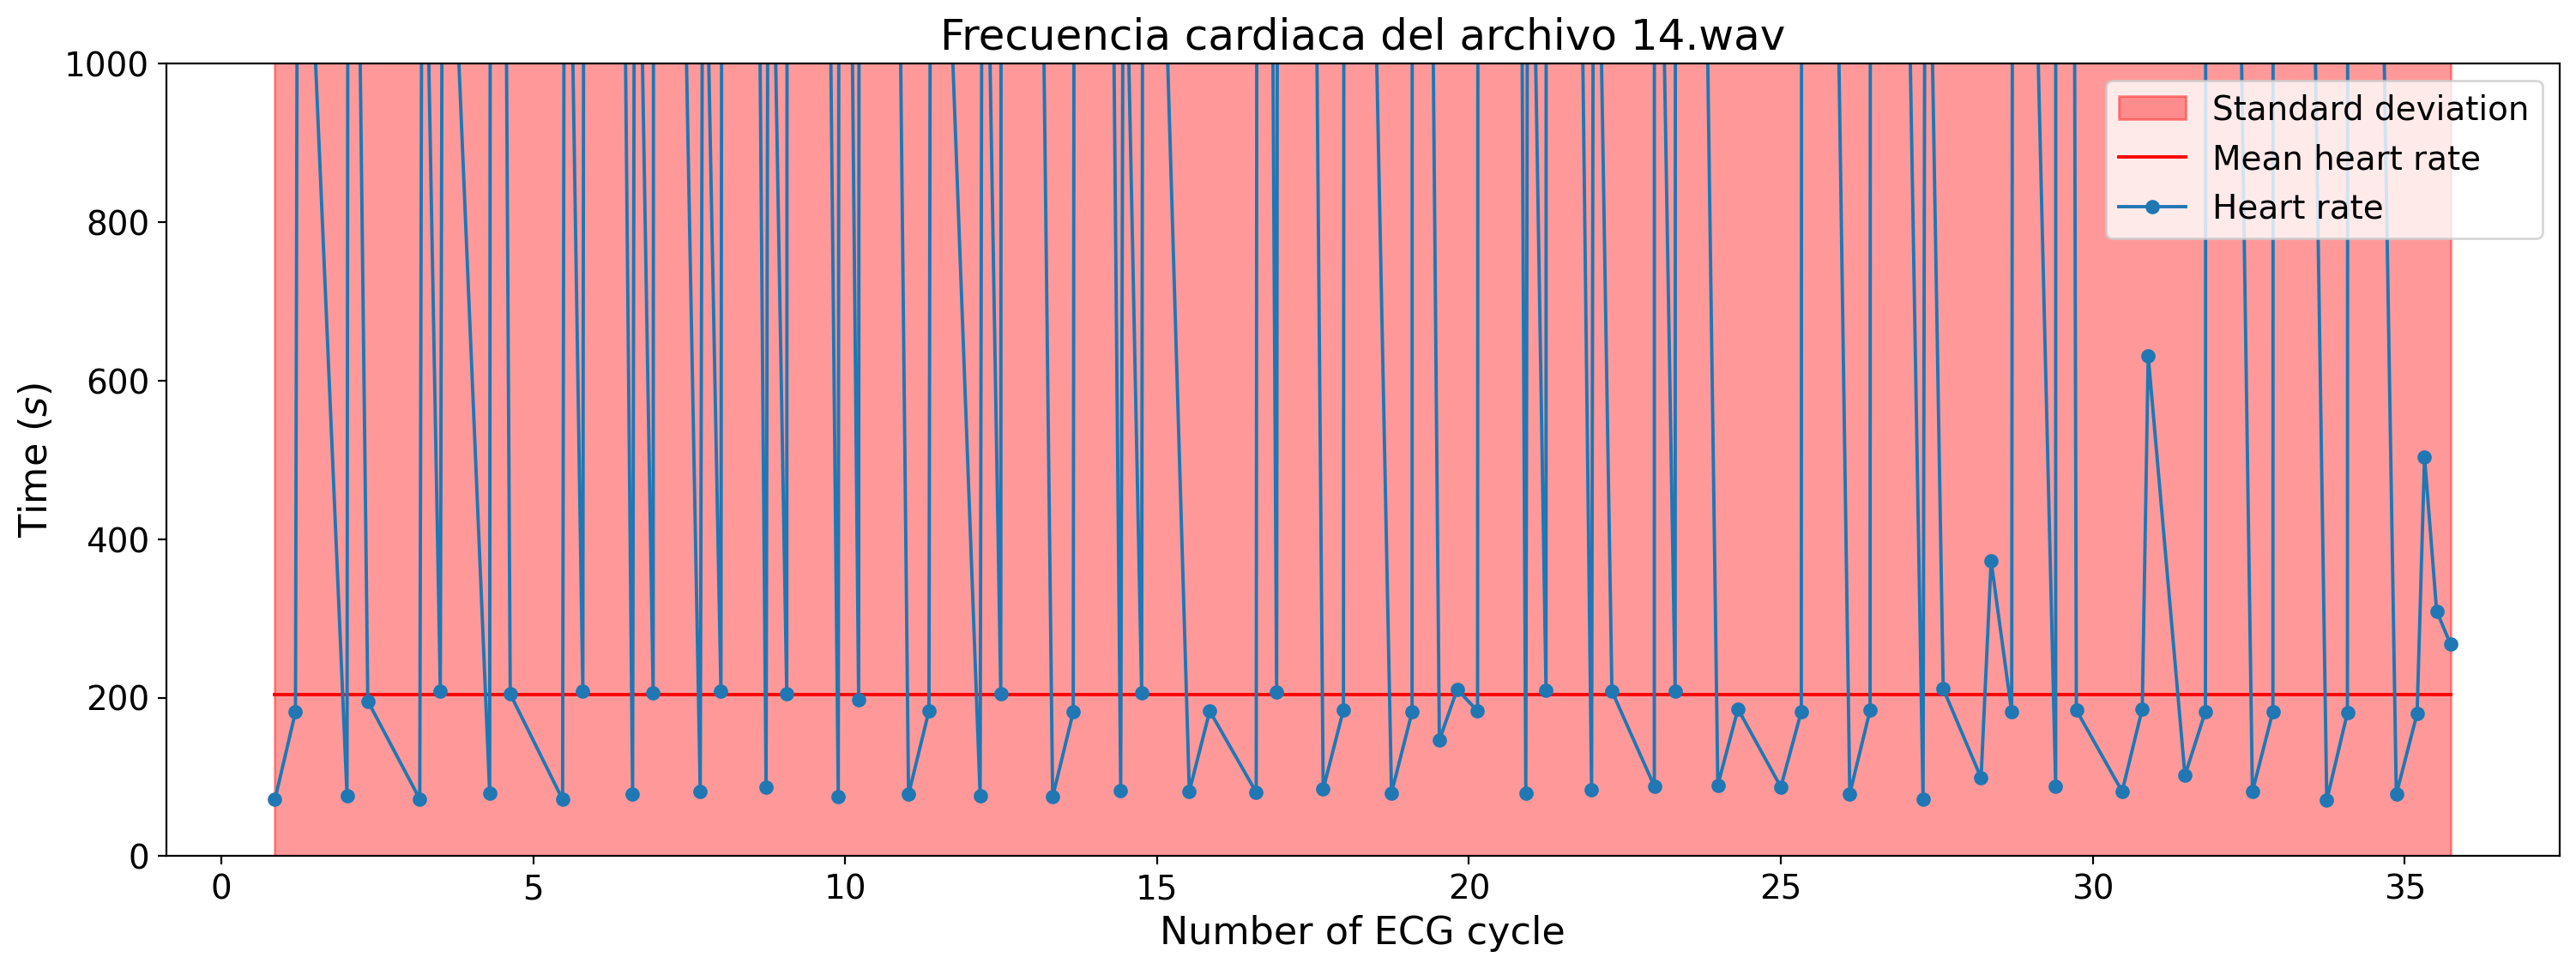

Beats per minute: 364.08771203971867


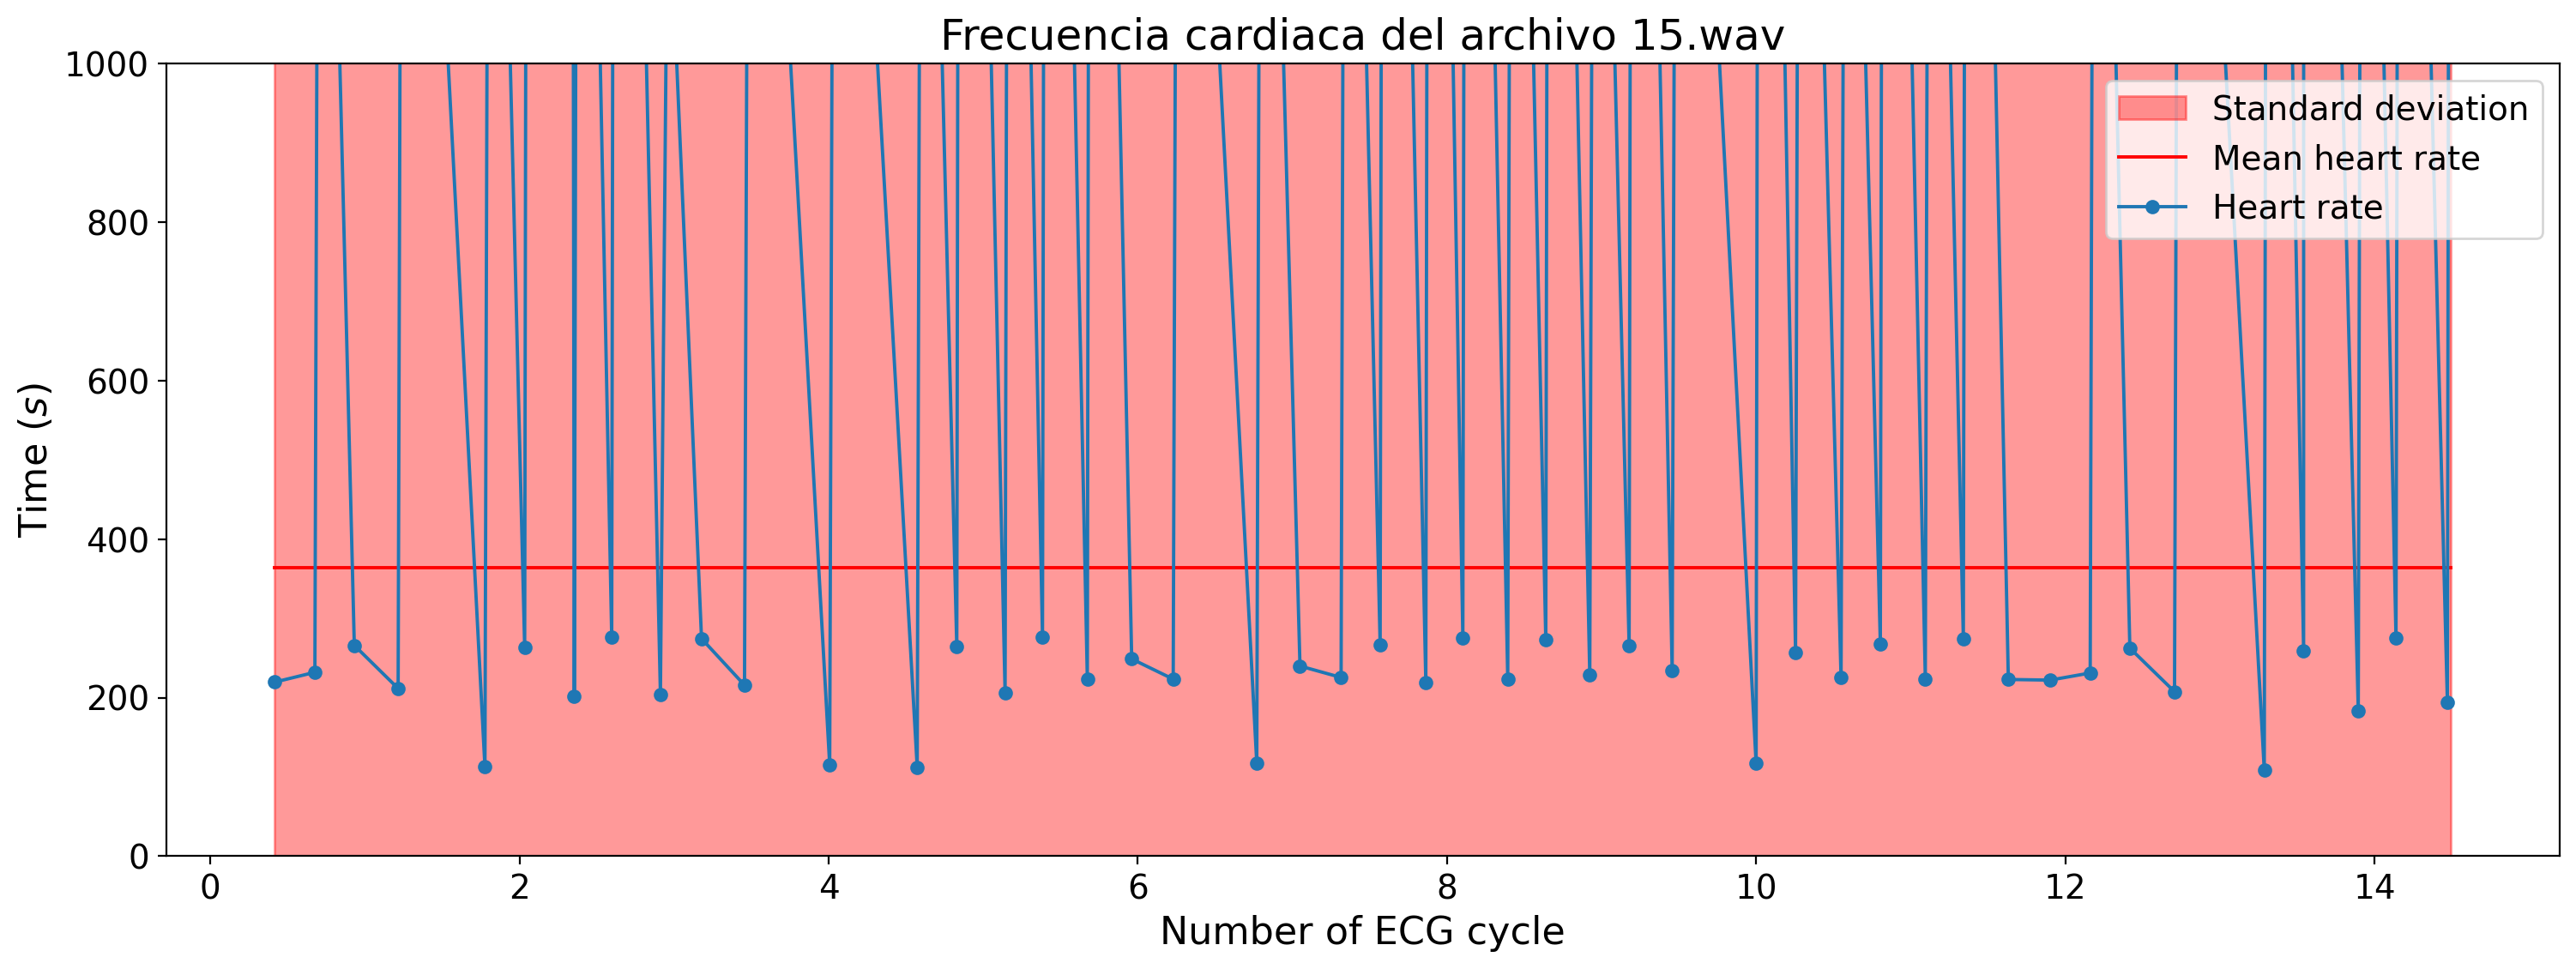

In [19]:
for i in range(0, len(archivos)):
    timeECG, waveData = ecg(ruta + archivos[i])
    mxs_indices = detecta_maximos_locales(timeECG, waveData)
    mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
    print("Beats per minute:", mean_bpm)

    heart_rate = [(60/(timeECG[mxs_indices[j+1]]-timeECG[mxs_indices[j]])) \
    for j in range(0, len(mxs_indices)-1)]
    time = timeECG[mxs_indices]
    mean_vec = [mean_bpm for j in range(0, len(time)-1)]
    std_vec_plus = [mean_bpm+stdev(heart_rate) for j in range(0, len(time)-1)]
    std_vec_minus = [mean_bpm-stdev(heart_rate) for j in range(0, len(time)-1)]
    plt.figure(figsize=(18,6))
    plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
    label = "Standard deviation", color='red', alpha=0.4)
    plt.plot(time[1:], mean_vec, c="r", label = "Mean heart rate")
    plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Heart rate")
    plt.ylim((0, 1000))
    plt.title("Frecuencia cardiaca del archivo " + str(archivos[i]))
    plt.xlabel(r'Number of ECG cycle')
    plt.ylabel(r'Time ($s$)')
    plt.legend()
    plt.show()

En cuanto al análisis de los resultados anteriores, podemos observar resultados sumamente variados y bastante aceptables exceptuando los archivos 3.wav, 4.wav y 15.wav los cuales dan como resultado frecuencias cardíacas sumamente altas. Y caso contrario tenemos la frecuencia registrada en el archivo 11.wav que muestra una frecuencia sumamente baja.